## Lab 11: A Markov chain

A **Markov chain** or **Markov process** is a mathematical model used to describe a system that transitions between a set of states over time. It is called a "chain" because it moves from one state to the other, according to certain transition probabilities, and forms a sequence of states.

A stationary distribution is a probability distribution that remains unchanged after multiple iterations of the Markov chain. In other words, if the chain starts from this distribution, it will remain in this distribution over time. With the help of stationary distribution we could answer multiple question, including:

* What are the most visited states in long (potentially infinite) run?
* What is the proportion of time spent in each state?

One of the most valuable applications of the stationary distributions is [PageRank](https://en.wikipedia.org/wiki/PageRank) algorithm by Google that was used to rank pages in a search output.

The convergence of a Markov chain to a stationary distribution is an important property. It means that as the chain is run for a long time, the distribution of states visited by the chain approaches the stationary distribution.

Formally, a Markov chain is said to converge to a stationary distribution if for any initial probability distribution over the states, the distribution of the chain after a sufficiently large number of steps is arbitrarily close to the stationary distribution.

The convergence of a Markov chain to a stationary distribution depends on the properties of the transition matrix, which specifies the probabilities of transitioning between states. Specifically, for a Markov chain to converge to a stationary distribution, it must satisfy certain conditions, such as **irreducibility** and **aperiodicity**.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB4MAAAMNCAYAAACS9NLQAAAACXBIWXMAAAsTAAALEwEAmpwYAAAg
AElEQVR4nOzdv29cV5sn+OcO3nAB+Y0WYCKq9w+QGhMycL1ANxZwYk3Qk6qcvJNZfJ20IrrMyJ34
pZzNJC6l00FTiTCLaeAtBQwHLWWbTJtMCGwybQIbLlAb3FNWiaake27dW3Xr3M8HIGTZp6qOaZnn
nud7flTL5TIAAAAAAAAAKMu/23UHAAAAAAAAAOieMBgAAAAAAACgQMJgAAAAAAAAgAIJgwEAAAAA
AAAKJAwGAAAAAAAAKJAwGAAAAAAAAKBAwmAAAAAAAACAAgmDAQAAAAAAAAokDAYAAAAAAAAokDAY
AAAAAAAAoEDCYAAAAAAAAIACCYMBAAAAAAAACiQMBgAAAAAAACiQMBgAAAAAAACgQMJgAAAAAAAA
gAIJgwEAAAAAAAAKJAwGAAAAAAAAKJAwGAAAAAAAAKBAwmAAAAAAAACAAgmDAQAAAAAAAAokDAYA
AAAAAAAokDAYAAAAAAAAoEDCYAAAAAAAAIACCYMBAAAAAAAACiQMBgAAAAAAACiQMBgAAAAAAACg
QMJgAAAAAAAAgAIJgwEAAAAAAAAKJAwGAAAAAAAAKJAwGAAAAAAAAKBAwmAAAAAAAACAAgmDAQAA
AAAAAAokDAYAAAAAAAAokDAYAAAAAAAAoEDCYAAAAAAAAIACCYMBAAAAAAAACiQMBgAAAAAAACiQ
MBgAAAAAAACgQMJgAAAAAAAAgAIJgwEAAAAAAAAKJAwGAAAAAAAAKJAwGAAAAAAAAKBAwmAAAAAA
AACAAgmDAQAAAAAAAAokDAYAAAAAAAAokDAYAAAAAAAAoEDCYAAAAAAAAIACCYMBAAAAAAAACiQM
BgAAAAAAACiQMBgAAAAAAACgQMJgAAAAAAAAgAIJgwEAAAAAAAAKJAwGAAAAAAAAKJAwGAAAAAAA
AKBAwmAAAAAAAACAAgmDAQAAAAAAAAokDAYAAAAAAAAokDAYAAAAAAAAoEDCYAAAAAAAAIACCYMB
AAAAAAAACiQMBgAAAAAAACiQMBgAAAAAAACgQMJgAAAAAAAAgAIJgwEAAAAAAAAKJAwGAAAAAAAA
KJAwGAAAAAAAAKBAwmAAAAAAAACAAgmDAQAAAAAAAAokDAYAAAAAAAAokDAYAAAAAAAAoEDCYAAA
AAAAAIACCYMBAAAAAAAACiQMBgAAAAAAACiQMBgAAAAAAACgQMJgAAAAAAAAgAIJgwEAAAAAAAAK
JAwGAAAAAAAAKJAwGAAAgFGoqmpRVdWyqqrJrvsCAAAA2yAMBgAAAAAAACiQMBgAAAAAAACgQMJg
AAAAAAAAgAIJgwEAAAAAAAAKJAwGAAAAAAAAKJAwGAAAAAAAAKBAwmAAAAAAAACAAgmDAQAAAAAA
AAokDAYAAAAAAAAokDAYAAAAAAAAoEDCYAAAAAAAAIACCYMBAAAAAAAACiQMBgAAAAAAACiQMBgA
AAAAAACgQMJgAAAAAAAAgAIJgwEAAAAAAAAKJAwGAAAAAAAAKJAwGAAAAAAAAKBAwmAAAAAAAACA
AgmDAQAAAAAAAAokDAYAAAAAAAAokDAYAAAAAAAAoEDCYAAAAAAAAIACCYMBAAAAAAAACiQMBgAA
AAAAACiQMBgAAAAAAACgQMJgAAAAAAAAgAIJgwEAAAAAAAAKJAwGAAAAAAAAKJAwGAAAAAAAAKBA
wmAAAAAAAACAAv1u1x0A2JXrk6PJrb91+/crbyLil/XfH5xe/PKBtgDsseuTo8OIOFz7W59FxKMP
NF+s/+bg9GJxdzMAINf1ydGjqMfhldu/X7lMX7/+/uD04vKOdgAUQD0PIF+1XC533QeAXqTiwWHU
RYPDta/7HX3ETbx7sHyTvi4PTi/edPT+APQgFQ8O490YsQp873X0EVfxrjB9GXVorDANA1BV1SIi
Po+IPyyXy8VuewPjdn1ytBp/J/FuLP4sIh52+DGv06+LSOOyxVsAw6aeB9A9YTBQhFRImKSvR1EX
+Xbpdbx7oFwIAAB2I+30ncS78aHLAnOuVdFhEe/GByvTYYuEwbA7aTHW6qvLRVhtvI3352sCAIAd
UM8D2A5hMLC3rk+OHse7B8ZdFvebuIq6+H8eiv8AvUnFhPXxoavV4315G2l8sFMJ+icMhu1JO7tW
Y/Kui/ufchPvz9cud9obgIKp5wFsnzAY2BtrBf7HEfHljruzqZdRP0iee5AE2Eza/fs4IqYx/GLC
x9zEu7HhfNedgRIJg6FfqcC/+trlzt9NvY2IedRj8uVuuwKw39TzAHZPGAwMXiooTGP/Hxg/xIMk
QKa1gsJx7HcA/CGCYeiBMBi6l3YAH8f+B8AfIhgGaEE9D2A4hMHAIKVdXsdRPzSWWFC4y6rwf+bO
KoC7pfsGpxHxZLc92aqrqIvQc0Vo2IwwGLqRFmVNo56zDf1Khi69jHo8tlAL4A7qeep5wDAJg4FB
SUX+4yh31WBTr6N+iFRkAIiI65OjaZS7CzjHi1BkgNaEwbCZVOSfRbm7gJu6ivr7YDcYQKjnrVHP
AwZJGAwMQiryT6MuzvHOVUTMDk4v5jvuB8DWjXjXUROvox4fFrvuCOwTYTC0s3YU9JhO5mjiJiLO
oi78C4WB0VHP+yD1PGBQhMHATqX7Q85Ckf9TPEQCo3J9cjSLuug85l1HTQiFIYMwGPKkncDzUOT/
FKEwMCrqeY2p5wGDIAwGdiIdHzOL3RYVbiJi/ZjNy/S17jB9rf9+lw+6VxFx7LgZoFRpZfksdv+z
9nLt928i4nZh91FEfHbr97sMrl9HPT44Pho+QhgMzawdB73rncCv1/76l3h//hZRj8WPbv1+l1dK
3EQdCM922AeA3qjntaaeB+yUMBjYqlRUOIvt3SGyekBcxLuHwzebrtZOR5c+incPl4/S17YeLBX9
gaKkosJZbK+A+zbSmJC+fulid20a5w7jXVg8ie0GxS+iHh/sSoI7CIPh49I85zgivt3ix76Oeiy+
XP16cHpxuembpmeL9Xnbo9jec4aiP1AU9bzOqOcBOyEMBrZmS0d+vo36QXER9UPiZY+f9RvpoXIS
9YPkJPpfKfk86uNmFP2BvZR+bp5F/zuPXsf748NWf26m4skk3o0PfRajb6IeG856/AzYS8Jg+LAt
Hfl5Fe+Px1svhqeQeDUeT6Lf+enriJhue14K0KUR1fPWxwb1PKAowmCgd2myPY9+igo3EXEe9cPi
+dAeotbC4cfp1z6+B1adA3vp+uToOOojxvooKlxFGh+G+PNxLRxejQ99fA+sOodbhMHwW1vY7fUy
3s3XLnv6jNbSfHU1HvexWMvR0cBe6vn0JvU89Txgi4TBQG/Sg9MsIp52/NarB8bzfXtguj45ehQR
0/TVdeH/ZdSrzgf1AA1wWyo6z6P71darAHi+bwFo2o31OPrZIf2dAjTUhMHwvuuTo2nUhf4+5iar
OdvezE/SM8rjqHfAdV34fxv1fG2vnlGA8VHP+y31PGDfCYOBXqSHpHl0u3rwddQF/nmH77kzqfA/
jW5X4F9F/QC56PA9ATqTfvbNo9sJ9Iuox4dFh++5E6nwsipCdz2GOqaS0RMGQy2NN/Pofi5yFvWY
vPcF7TSnPY56XO7yueVPrnIAhko979N6qufdRMTjEua0wDAJg4HOpWM//9zR261WDc5KLWCn1efT
6Pb+FbvAgEHp4W7gq6iLFGclFJzvslaE7up7dhN1ILxXq/ChS8Jg+PXYz/Pobu7xMurxeNHR+w3K
2kKtWXS3W/h11EX/Ip9hgP2knpdHPQ/YJ8JgoDMdry6/iTo0KLbIf1v6/k2juyPJFBiAQeh4dflV
1AWFeQfvtRdSkWEW3e1Men5wenHcwfvA3hEGM3bXJ0eziPi2o7d7EQUX+e+SjtWeRjdXXdxExMSx
0cCuqedtpod63tuox4dRfP+A7RAGA53osNA/uofGu3R4d5cCA7BTHR4LPboQ+LaO7+5SYGCUhMGM
VceF/tGFwLel3dVn0c1Ct6/G/HwD7JZ6XrfU84ChEgYDG+vwmLHnURcVRvvQuC4VbI6jm+NmFBiA
revomLGbqMcGd+slazuFNz0+WoGB0REGM0Zp3DiPzQv97p+/JRX9Z7H5TrAXB6cX0037A5BDPa8f
6nnAEAmDgY2kye9PG76NosJHdFj0d+8IsDXXJ0fz2PznlqLCR6TizSw2O6rSPcKMijCYsUk7vhax
WTH6KuqxYtFFn0rTYdHfNT/A1qjn9a/Dep5rfoCNCYOB1q5Pjs5is6MqFaAzpKL/PDZbdW7FOdCr
VBA9j80CyrdRjw92rDaQdmDPYrMCtBXnjIIwmDHp6KoGC0obSkX/eWz+DOQaB6BXHdwfr56XQT0P
GAJhMNBKBzu+7PZqYW3V+SYP7S8i4tj3Huha+hm1iPbHUDoSuqVUgD6Lze6C/JPvPaUTBjMWHez4
sjCrpQ5CeN97oDcd1PNeRv0zSk0pUwchvO890JowGMi24YOj1YMd6GBVoRXnQKc6CIIVPjvQwS5h
K84pmjCYMeggCLYbeEMdnJRyE/V8zXMR0Bn1vN1L1zech3oesGXCYCDLhg+O7kDqUCownEX7/x4e
IIFOdBAEuwOpQ2mX8Hm0/+8hEKZYwmBKt2EQfBX1fE0A2ZG0SOvPLV8uEAY6o543HOp5wC4Ig4HG
NnxwtLq8JxsWfDxAAhvZMAi2urxHG47bAmGKJAymZBvOCxw92ZO0C2wR7U7tEAgDG1PPGyb1PGCb
/t2uOwDshw0eHG8i4j94cOzPwenFPCL+Ourvda6HUa9GBMi2YRC8mrwKgnuSwtyvWr78SSpOALAH
Niwof3dwemHHV09SkHsY9bNPrnsRcZ6euQCyqecNVwf1vHmH3QEKJwwGPun65Kjt0SVXodC/FRsW
GJ6kyQFArkW0C4Jfhl0uW7FhgeEngTDA8F2fHE2iXRB8ExFfKfT37+D04peD04tHEfGixcvvR8RC
IAzkuj45moV63qBtWM/7Uj0PaEoYDHxUKgI/bfHStxHxSKF/e9JK/knUIUuuJyn0B2gkTTrbBMEv
7D7arjQWT6JdgeGn65Ojx932CICupCOI2xTrV8cPzzvtEB+VTu34U4uXPox6ER5AI6me922Ll6rn
bdlaPa/NgiH1PKARdwYDH5RWmP+lxUvdN7VjGxwD9JWCEPApaYV5m8KC+6Z2aINjvd1XSDHcGUxJ
0s/1y8i/i/YqIh77ub47Gxzr/SIFygAftEE973XU44N63o6o5wF9EQYDd0orzBeRX1gwOR2IDR4g
/1phCPiQDYqXJqcDsEEgfBX1DgGFIfaaMJhSbPDz/G3UC3z8PN+xDZ6p/nRwemEXGHAn9bz9p54H
9MEx0cBvpMLCPDw47rX036LNETPuowLulAoLbYqPguCBWDuCLPfI6PvR7hhSAPpxFoLgvZaejb5q
8dI/u8IBuIt6XhnU84A+CIOBu8wjv7DgwXGAWj5A3gv3UQG3pEnleeQXFgTBA7NBIPy5+6gAdi/t
KM3dMSQIHqANAuH59cnRYaedAUrQZqGQet4AqecBXRMGA++5Pjk6jogvM1/22oPjcLV8gHyo4A/c
Mo96d2iOPwmCh2mDQPip3UgAu5NO6cg9Wnh197sgeIBaBsL3wokdwJpUz8tdKKSeN2DqeUCXhMHA
r1Jh4c+ZL3sbEYrCA9fyAfLp9cnRpPveAPum5UKhF+6zG7a1QPgq86Vzx48BbN/a8Z85BMF7oGUg
rOAPRMSv9bxZ5svU8/aAeh7QFWEwsG6e2f4qFBb2yXHk7wA7V/CHcUtHEM4yX/bSCvP9kMbwx1GH
BU3ZjQSwG7PIP/5zcnB68aaHvtCxFAgr+ANtzCPvOh/1vP2ingdsTBgMREREWlGcU1i4iYjHHhz3
x9oOsNyC/7yP/gB7I/ee4LcRMe2nK/QhhQS5uwI+TzvGAdiCFPg9zXzZV4Lg/ZIW073MfJkTO2DE
rk+OZqGeV7SWJzqp5wHvEQYDq+NkcgsLU4WF/dMyEP7S/ZAwTgoL43FwerGI/OMpZ2nnOAA9ank8
9PO005T9M428HWD3I/8UF6AAqZ73bebL1PP2UMsTndTzgF8Jg4GI/MLCdwenF46H3FPpoT93N5fV
5jAyKeTL/Vnx+OD04rL73rANLY6ntNocYDtmUQd+Tb0+OL1wesOeSgX/aeQV/B0XDeM0z2yvnrfH
1POATQiDYeRa7Pp6fXB6MeunN2xLy4L/rI++AIM1j7zjob9Lu0vZb7n3UX1utTlAf1ocD30T+Uf/
MzBtC/49dAUYKPW8cVLPA9oSBsOItdj1pbBQluPIu2/EanMYiRTufZ7xEoWFQqztRspxZrU5QG/O
Mtu7rqEQLQr+91M4BBROPW/0chfwqucB8btddwDYqVnk7fqaKiyU4+D04pcU+PxLxstmUd85zJ74
+uk3/ysifp9++7c/Pv/hnzt+/7+JiL+LiD/e+kfPIuIff3z+w792+XlsTU7h+Sbyw0MG7OD04s31
ydGfIuLPDV9yP+qCxKy3TgGM0PXJ0TTydn09d0pHcY6jnn81PSb8+Prk6My8fb/0OWczXyvWLNTz
RivV86ahngdksDMYRiqtCHuS8ZKX7hUpTzp+7LuMl3yeHjjZA18//eaP8a6o0Mf7fx8R/z1+W1iI
iPg+Iv7n10+/+bu+Pp9+pB0lOfcSztwTXJ6D04uziHid8ZJv0w4FADqQTlzIWZx1FRblFKfFiR33
In83OTvU55zNfK1M6nlEqOcB+YTBMF6zjLZ2fRUsHe2ac7zMrJ+e0KW0Avw/9/j+fx8Rf9+g6X9V
YNgfqfCcc9zY6xQaUqZp1M8ATc366QbAKB2HXV9ERNrt/TzjJU8s0NoPfc7ZzNeKNstoq55XMPU8
IIcwGEYorSLMuQtSYaF8OeHPfasJh+vrp9/8/ddPv/mvUa8A7+sz/n3UK8lX/jXq48yqH5//UEV9
5Ni6//z1029626FMp3IKzwoLhUs7vnPCfsVngA60WJz1wvHQxZuFBVrF6HvOZr5Wrhb1vGP1vOKp
5wGNCINhnGYZbV87TqZ8qXj0IuMls356QhtfP/3mj18//Wb59dNvllFP+vte2X17hfl/XL/X6sfn
P/xDvF9g+H3cfTQZA9Ki8HzmeOjypdXmVxkvmfXTE4BRyV2clTN+s4dSmJPz3/lJCo0YiC3P2czX
yjXLaPv64PRi3k83GAr1PKApYTCMTJtdwf30hAE6juarza0mHKm0Yny9cPGPPz7/4X/cbpcKDP+2
9rcUF4Yvp/B8lUJCxmGa0dbuYIANtFicNbPraxxSqPM64yXTXjrCoJmvlavNruCeusLwqOcBnyQM
hvGZZbR9YdfXeKQiUs5xoLOeusKw/c2t3//jR9r+l7W//qt0XBkD1Kbw3FNXGKC02jyn+DzrpycA
o5C7OCvn+Z39N8toa4HWOJmvlWuW0fbFwenFm746wrCo5wFN/G7XHQC2J3MVoePGRujg9GKWVgje
b9D8/vXJ0dSxQ7v34/Mf/ku8P5GPiIivn37zPyPirzr+uNsFgn++s1XtX2/9/q8i4jer0hmEnMKz
48bGaRoRPzds++T65GhmQRlAnhaLs6Y9dYWBOji9WFyfHL2IiCcNXzILf04GYYtzNvO1Aqnn8Snq
ecCn2BkM4zLNaHvmuLHRmmW0NcEYn/VCxb/9+PyHf/tgy7uLCwzTNKPtrKc+MGAp2M25i8r4AJDv
ceQtzlr02BeGa5bR9klaZMB4mK+VaZrRVj1vvGYZbc3XYGSEwTAS6XiopquHbyLveBEKklYGXjVs
/jCtUGU8fr/21x8rLET8trjw+ztbsVMZq4cjFJ7HbpbRdqr4DJBt1lNbCmKBFp9gvlYY9TyaUs8D
PkYYDOMxzWhrFSGzjLbTnvrAML230jzztYoLwzTNaDvrqQ/sgczi872od7gB0EAqyFqcRVOzjLbT
nvrAMJmvlWea0VY9j1lG22lPfQAGSBgM4zHNaGsV4cil1YQ3DZs7emy8cosLDExaZd707qm3Cs9E
3jOCnUgAzU0z2s576gN7InOB1v3rkyMLtMbJfK0M04y28576wJ7I3B2sngcjIgyGEUgTv6arzF9Y
RUiSU/BXXBgnK8f3X05YZ6EQcXB68SYiXjds/jAtOADgI1IhtukRoFep0AvzjLbTnvrAsJmv7bkW
9bzLHrvD/phntFXPg5EQBsM45Azsiv2s2P3FXdbvlcotLliZPjxNx4cbhWfWGB8AumW+RrZ0Ysvb
hs2/tPtrNMzXymJ8oA3zNeA3hMFQuDTha/rw+Dbt+IFIO8SbHj1m99d4rBcIPlVc+Ktbv1dcGJDM
VeYKC/zq4PTiPJofPWalOcCn5fysnPfVCfaS05y4zXytLOp5ZFPPA+4iDIbyPY6Iew3bjq7YX1XV
Z1VVPa6qalZV1byqqsWtr3n6Z5Oqqsa4knqe0VZxYRzeW2n+9dNvPlZguF1c+Nc7W7ErCs8NpbFi
csfX4a77tkPzhu3uX58cPeqzIwD7LC3e/bJh81Fe6ZPG3FlVVWd3zNfO0z97PNJx+Twibhq2NV8b
B/O1QqTFu+p5DX1gvjbmecg8o63xAUbgd7vuANC7ScN2N1FPJEehqqpp1A87nyq8fJ5+/Ta97mVE
nC+Xy3lvnRuQg9OLxfXJ0VU02z04DROQMfgft37/NxHxjx9oq7gwbJOG7V6P7e6pVEx+nL4exUeK
MFVVRdR36C6iHh/GsiJ/HmlsbGAajh8D+JCcAuyY5muTqMePJmHIr3O6qqreRj1GzZfLZfHB+cHp
xS/XJ0fn0ezO6S+vT44+G+OCgpExXyuH8eED0maNx1HPaSfxkZpVmq+9jXq+tlgul6P4XqnnAbfZ
GQzla/rweD6GSWFaMX4ZET9F8xX4676MiJ+qqvqlqqqxFLabPig7WmYc/vnW7//mI23/uPbX//rj
8x9uFybYkbRTs+kR0fMeuzIoVVU9qqpqHhE/R8Sfo14Q1GQ1/udRB6P/knYpTXvr5ECkBQJN7ym0
0hzgw5r+jLxKx/QXraqqw6qqFhHxl6gDzqa74lYeRj2G/1s65WkMpzvl/LkwJpfPfK0cTf9/Hc2p
EenEpllEXEZd13sSzea1DyPiaUT8U1VVl+lECePDO+p5MALCYCjY9cnRJJpPnosuLKQHxnlE/FM0
D0A+5l5E/LmqqjcjOHZmntF20lMfGIgfn//wb/H+yvI/fv30m39/u93XT7/5+3j/jqr/0nffyGKV
+Zo0RpxFxL9Es501H/N51IuGFsaHX91XXAD4oKYLVMcwHh9HvSDr80+1behJRFxWVVV0AJoWCTQ9
KnrSY1cYAPO1Mqjn/VYaIy6jXoSbu1Bo3f30Hm9KHx9CPQ9YIwyGsjV9qLkpeZV5Wu23iM0L/Hd5
GBFF7wI7OL14ExFXDZuX/iBdvK+ffvPfv376zXLt6z/f0ewfbv3+v3799JtfV5ynwsL3a//830Jx
YWia/r/6svRV5imwXUS9UrxLn0fh40PYiQSwkXQfZFPzvvoxBGnh7p97eOt7Ue8EK/34y6ZjsvF4
z5mvjYZ6XpIW7p5HPUZsEgLfdj/q8WHe4XsOinoesE4YDGWbNGy36LEPO7UWBD/s8WPuRb0LbNrj
Z+xa08nFpM9OMAzp+LBna3/rryLi16JEvF9YiIj4T2mFOgNwfXL0WTT/mbjosSs7txYE9zVGFD0+
ZB4VPemvJwB7a9Kw3U0q6BYpFeL7WLi77mnJBf9oPl+7l64LoWDma0WYNGy36LEPO7dW02tzzVtT
T4wPEWG+BsX73a47APQjs9hf8irCefQbBK87q6rqzXK5LLFQcx7Nds3duz45ejSEYtWDZ68mLV/6
y8/ff7Hz/g/dj89/+Ievn37z+4j4+080/Y8/Pv/hHz/Rhu2aZLQtdnxYKyx0ubr8Q36qqiqWy+V8
C5+1befRbJyd9NwPgH00adiu5PH4OPoPgleeVFW1KHE8Pji9OL8+OWrafBIRO5/vPHj26lFEtLqz
8+fvv1h025vymK/tL/W898xjOzW9J2m+Nt3CZ23b3tXzgH7YGQzlmmS0XfTUh51KO7H6XD14270o
9Pi2g9OLRezRPVQPnr2aR8RfWn5ZKd/Qj89/eBYRfxt3Hyn2LCL+D4WFQZo0bHeVdn6W6jy2EwSv
/FToHcJ2IgG0N+qTOqqqOox+job+mJ/S55boZcN2kz470cSDZ6+mEfEv0W6+Nt16h/eU+dreynlm
XvTViV2rqmoW263pPUkLlIqyb/U8oD92BkO5mj48vi2x2J92fLW5F+oqIi7TXx9GfYdIjodVVc2W
y+WsxWcP3SKaPYjvtNifguC2uwu++vn7L+bd9Wa3fnz+w//R4jV/m9n+nyPinyPiP+V+FjvT9P/R
YleZp0n+5zv46HkUtuDk4PTizfXJ0U00C9YfxQB2IgEMwfXJ0SSj+aKnbuzavMVrbuLdWJKze+72
505avG7oFtFsvjbptxsfl4Lgn1q+/MXP338x7a43u5c7ZzNfG4VJw3ZF1vMifl0s9O0OPnpWVdX5
crm83MFn92kRe1DPA/plZzCUa9Kw3aLHPuzSceTt+PouIh4sl8vD5XI5SV+HEfEgIl5kfvY0s/2+
WDRsN+mxDx8lCIZGmoagiz47sStpsdCsxUvfRsTzqMeLl1EvHsr1sND7g5sGvJM+OwGwZyYN2xV5
Ukc6LSNnYdbLiPjr5XL52dp87VFE/D7qsbnprqeIiM8L3R28aNju3vXJ0WGP/fggQTA0MmnYruRF
lvMWr7mKun73Xfr1bYv3uBft5opDt2jYbtJjH4AdEwZDuZqu5ir14XHasN1N1EWF2V0r/5bL5WW6
M+Svo3mB4X5VVZOGbfdJ0z8rubupOyEIhk/LPKa31PEhd7HQy6gXCz1aLpfHabx4nBYM/SHyiwzT
zPb7YNGw3WGPfQDYN03H5EWfndihnKM4v0pj72+eTZbL5S/pVKbDyBuTpxlt92x2o7AAACAASURB
VELmPY9b3/0lCIbGRj0+tFgs9DYi/pA2d0zTfG2aFgw9iOZH6K88SQuIS9K4npfurAYKJAyGAqVV
vk0L3Yv+erIb6cGxaSB5Z1HhttRmktGNnLZ7Id0z0kjmsXcbEwRDY00LC0XuQkqmGW1fpOLz5V3/
cLlcLlKRIecEiRJ3Iy0attvF0dwAQ3XYsF2pi7MeN2z33XK5nH+q0XK5/CXqOVjTkzsmDdvtm9cN
2201DBYEQzNjr+clOYuF3kbEZLlcLu76h2mDx+OI+CqzD03HqL2QU88LR0VDsYTBUKbDhu1uCi32
N31oe/GhB8a7pEC4acH/sOn77pmmq+239vAoCIYshw3bFVl4zlws9DKdDPFJqV3T4mtEeQXoxn9e
MnenA5Ss6V23xY3J6RSlJmHHVdr120gKhJu2L3U8WjRst8352jQEwdDUYcN2pdbzIprX9K6iDoJ/
+VTDtKjoux76sE8GV88DtksYDGWaNGxXXGEhmTRsd9bivc8btjts8d77oOmfmcM+O7EiCIZsk4bt
Sh0fphltc1akR+TdLVXUBPvg9OKXaL4Ty7FjwOjlLIzJ3M2zLyYN22XP15rsIk5yrozYJ5cN2x32
2IdfCYIh26RhuyLna1VVPY7mP59nTYLgNWfR/Pq3w4z33ReDqucB2ycMhjI1LbQW+fAYzY6hvGpy
PPQdFi1eU5LLhu16DzoEwdDK2MeHpj+bXnzoaOgPSSdNjHm19WXDdpMe+wCwLw4btsu9l35fNB0H
my7Eva3U71sTlw3bNd2Z3pogGFoxX2vmKmPxT0T8enpE09f0/jNyBy4btitxrgqEMBhK1XTgvuyz
EwN32eZFGasOc1Yn7pNFw3a97vwSBENrTSe1l312Yoea3lnbtvhcalGmiUXDdnYGAzSfr5U6p2g0
FuQuzFrT5PvWdHfYXsnZSZ7uJu2FIBhaG3s9b9KwXdv52qLl60qwaNjOfA0KJQyGMo12JWG6f6qJ
Rc/vX9z3NmlakOptFaUgGNq5PjlqPKk7OL0o7mdYVVWHTdsul8u2xYXLlq8rQdPxwUpzgObztUWf
ndihJouzNtnd2+T9i3vWWdP06obDPj5cEAwbGW09Lzls2K7tfK3URVZN7LyeB+zW73bdAaAXTQfu
Eh+CLiPiuwbtFi3f/3HDdkU+mB+cXry5Pjna2ecLgmEjTUO4InfKhCM5+1bkuAfQk7HvDG4yX7ts
88YW70ZE/b2736Bd57u/BMGwsTHX8yKa/eyKKPtneC92Xc8Ddk8YDCNW4s6vdJTYrI/3rqrqUURM
GzS92WBX2T64iYh7n2p0fXI0yTmm7FM2DIL/ISIuHzx7NemqP7ADv/z8/Rfb+Lld3NiQaZPCymFX
ndhDTb9vTY/qBqDQMXm5XM76eN+qqj6LiLOGzed99GEgck7r6GzeumEQ/H9FxNx8jX338/dfLLbx
OSXW83JkXOF222GX/dhDO6nnAcMgDIbC9Hnvz5ilFebn0eChKZoXIPbVm9hyMX/DIDgi4u/TF+yz
19H8DqW7OJ63mcUGr51s4TMGyUpzgCyHu+5AadJ1EOfRbFfd6+VyWXKQ8iYivtzmB24YBEdE/J/p
C/Zd1faF6nmNvd7gtZMtfMaQbb2eBwyHO4OhPIcN2zkG8xOqqvqsqqrHVVUtIuIv0SwIvonyw+Ct
6iAIBmpjv5+wV2nRUNNjzS776wkAe8AxmB2pqmpSVdU8In6O5serznrr0Ah1EAQDtcOG7dTzWkin
RzS9+u2yx64A7ISdwTBepd4v0kpVVdN4/wjow2hepFn3eIPjavZFzrFji00+SBAMdGW5XC5ig5X6
DeQsBFr01Yl9cH1y9GjsR9sBNHFwelH6vKKxdGXP+lj7WTQPf9c9T88EJWv652ay6QcJgmEnih0b
lstln/O1WTTb5BFR7nwtZ3xY9NcNYBeEwQC1w9jsqJSbiJiOoLAQ0fzYsaa7EO8kCAb2RVVVZ9G8
IP0y3W9fotfRbCzdaHwAYJQ+i82Ptvyur/uKB2YrC64EwcC+qKrqcUQ8bdj8Jjq8T31gtn6NADAc
jokG2NyLiHi0XC5LfVjcugfPXp2FIBjYA+lkiaaFhQhXCQDAtr2OiD+MJAjeigfPXj0OQTCwB9LJ
EvOMl5yN4MQ/YISEwVAeu22262VELAre5bUr86hXYwLdOdx1B0pTVdVx5BVCX4/kBAkAGIq3Ue/w
cj1Btxbh3lJg4KqqmkT986rp8dA3YfEuUChhMJTnUcN2JsPd+DIifqqq6jIdO0MHfv7+izdR31Ei
EIbuHDZst+ixD0WoquqzqqrmEfHnjJfdxPt30wMA/XsY9Xh9WVXVbMd9KcbP33/xS9TzNYEwMEhp
4e5fonkQHFFf/2ZXMFAkYTBAN+5HxD+lcIAOCISBIUqry99E/lH2x06RAICduRcR31ZV9aaqKqdp
dUAgDAxRVVWHVVUtIm/hbkTEC9e/ASUTBkN5Fg3bNd1BTJ4nAuHuCIShU5cN20167MPeSruBz6Je
XX4/8+XfLZfLefe9AgAyPYyIhUC4GwJhYEjSbuA3EfF55kvfLpfLafc9AhiO3+26AwADsbj1+8P0
9SjyjpSJqAPhy+VyOdu4V8TP33/x5sGzV5PIu+dl3f8TEf93l32CHdn0eP/LLjoxRmk38DzyQ+CI
OgieddkfABihy4j4bu33n0U9VzuM/PH5YdT3CE866Nfo/fz9F7+szdcetniL/zfqMPn/67BbwIhU
VXUY9XwtNwSOiHgdEa59A4onDAaIiOVyuYgP7KququpRRBxH3pGg31ZVNXckaDc2DIT/94j4bz9/
/8W0424BI5B2Az9t+fKv7AgGgM2ledXsrn+WQoBp1HO2pnOFz6uqmhqnu7FhIPy/pa9J2mkM0FhV
VdOIOIt2mwde2BEMjIVjogE+YblcvkkPh3+IvOOKZ710aPeaHjHe6UR+wyOjnzx49mreZX+AslVV
9aiqqjfRLgi+iYg/jLDA3HQlvkIvAJ1ZLperU5keRd5xxbNeOrR7O7kSasMjox9GxOLBs1eO7wYa
Sdf4nEfET9EuCP7TCINgVwbCiAmDYbxMsjKl3cPTjJeUesxM0z87mx5p+xsCYWAb0l1T/xLtjjp8
GRGHaczgDgenF52PDwAluj45MmfLkHYPT6L5XOF+OgWqNE3/3Cy6/mCBMGzF6P8fSdf4XEbEly1e
/jYi/nq5XJ512ac9sbPxAdg9YTCUp+lumzYF7tFbLpfnUd8n0sS99IBKhwTC0FrT8WHSZyeGLK0u
X0TEn1u8/CYi/sNyuXy8XC7tfAXgY64atisxqOxVGoNnGS8pdQHvzgiEobXLhu1GXc+rqmoWEX+J
druBv1sul4+Wy6XFqcDouDMYCnNwevHm+uRo193YiRS8Tho0Pd/wwW8ezY/CfBTlrajbeVFqwzuE
nzx49ircIcwImfB+RBpDzqNdUeFlREzHHAJfnxztfGwA2COXEXF/153YtrW7fT/lcsOrFs6j+cKu
Esevnf87bXiH8CoQdocwo3JwenE51npeE2kMOY92YfjbqOdrY58T73x8AHZHGAwjdn1y9Kiwoxon
EfFtw7ab/HtfZrQtcUVzo6Dk4PRi0WcnBMLQm8Ndd2DbqqqaRn3XVK6bqIsK5932aC81He+anq4B
QHkLSw+j2XztddQLcFtZLpeXVVU1bV7ifG1n1/qsEwhDfwqs531UOtJ/Ee13A8867dD+avr9G82f
LRgTx0RDmZoex1TaxNcksWdD2/nlyGjI0nRCN6qdSlVVzaNdELy6G1gQXBvU+AAwcE3H5NLma5cN
25X2771thw3b9T5/dmQ0ZBtrPe+D0sLdReQHwau7gWcdd2kvXZ8cHTZte3B6ob4KBRIGQ5maDtql
FW6bFlUmfXaicE0nHG0m+60IhKGZnAnd0BZ+9CUFwU8yX+Zu4LsNYhcSwJ4Y5XxtuVxeNmw66vsw
O9B0Yd9ln51YEQhDllGODx+ydoJTbhD83N3Av3HYsN1Vn50AdkcYDGVq+rBz2GcnBuzzqqo2mUyO
eSI6adhuqwGJQBgaa1qEO+yzE0NQVdUs8oPgtxHxyG7gO00athOgA5ivfVJVVY83eO1o52s5C/oO
Ti8ue+zKewTC0JjxIamqahL5JzitFu4ed9+jvTdp2O6yxz4AOyQMhjKNciXhcrlcZDRvXVzIfO1i
g88ZosOG7ba++lIgDI2Mcny4LRWYm94xv/IiIiYZu5rG5rBhO6vzAZqPxyXukG16d/x0g8/Ima+V
Ni41fYbb2klOKwJhaMR8LSKqqjqMiNwFuBbuftxhw3aljYtAIgyGMi0ativx4bHpxHLWZsV4eiDN
2Ul2mfsZA9f0z8xln534EIEwfNKiYbsSx4eI+PXn+DzzZS+Wy+XUsdB3uz45+iwGdiQlwJAdnF4s
mrYt8OqGpkXmL6uqavvvPs1oW1rR+7Bhu8se+/BBAmH4pEXDdqWNDbedR97R0G/Dwt1POWzY7rLH
PgA7JAyGMl02bHfv+uTosMd+7MKiYbv7EXHW4v3nGW2vCnwQbbo7YWdFlbVA+HWLr8MHz15Nt95p
2J7Lhu1KLi7MI6+w8GK5XE776Uoxco6kLK3oDtBW0zv5ShuTFxlt57kLeNM1EJ/31J99MGnYbpfz
tVUg/DLy52u/RMRs232GLbps2K7Eel5ERFRVdRx5J2OsgmALdz+u6dhovgaF+t2uOwB07+D04vL6
5OgmmhW7J5G/Q2rIziLiacO2T6qqiiZF/lSEmEdeYWGe0Xbwrk+OJhnNd/rwuBYIA+9r+v/m/euT
o88OTi+KmlCne6dyfo4LgpuZNGy39SMpAQbsTTQ7VWESBc0rlsvleVVVV9Hs3/1hRCyqqmpU5E9B
cM41EK8LXLy7F8X+FAhvcnUTFGnk9bxV7W2W8RJBcAP7VM8D+iMMhnK9iWYTwaJWmi+Xy8uqql5H
80nwkxQOHN91r0h6EH0c9cNo0yMwI+pjitvsPB6ypn9WrkoLkKAUB6cXb65Pjpo2n0T+PU1DN8ts
/0sqLHduuVz28r470nR8UFgAeOdNRHzZoF1R87VkHs1D24cRcVlV1VlEnN1V8K+q6nFEHEfegq+I
wnaYZh4pbkyG4RplPS85jrxTnC4j4riqqj76Mi9owZB6HiAMhoItotnD46TfbuzELCL+ktH+fkT8
U1VVN/HbSXFuQWHlzkLFnps0bLfosQ/A5poumJlEQWFwuncw92d605Mm2pj1+N7bNmnYbtFjHwD2
zSKaBaIPCzyt4yzyCv73ov5efZsW/q57lPE+614vl8tFi9cN2aRhu5uD04vLHvsBbGYR463nTTPb
fxnNFla1sYhy7s+dNGxnoRAUzJ3BUK6mA/jD65OjrHuYhi5N6l+0eOm9qB+417/aeFvYjq+VScN2
Hh5h2Jr+PzrpsxM7MN11B0qUdiE1LcIbHwCSg9OLRUbzoo7TTYtmpy1ffnu+1iYIvok6jC7NpGG7
RY99ADaXU8877LMj25ROecg5kY/mJg3bLXrsA7BjwmAo1yKjbVHFheQ4dnM34U0UGDik+0WaFloW
/fUE6MCiYbuiigtRXrg9FE2fIW4OTi+EwQDvazpfmfTZiV1IV/S0WcDbhePlclnimDRp2G7RYx+A
zS0y2k566sMuTHbdgRKp5wErwmAoVDpGbMzFhdVq85stfuxNREwKLSwo9kM5FhltJz31YRce7roD
hWo6Piz67ATAnlo0bFfi4t2I3Szg/Wq5XM63/Jm9uz45ehyK/VCEzHpeSeNDiXcgD4F6HhARwmAo
3aJhu5IeHn+VQtlJRFxt4eNKDoIjFPuhGGMsLlRVNdl1H0qUdo43DdkX/fUEYG8tGra7l47lL0pa
wDuJiNv3APelyCA4mTRsp9gP+2HRsN2kxz5sW9ur2vi4ScN2ix77AAyAMBjKdt6w3b20krg4KZx9
FBEve/yYlxFxWGoQnIr9Te9tafpnDtitRcN2X5Z2rzydynl2MD4A3HJwepHzs3HaVz92ablc/rJc
LicR8V2PH/M2Iv664CA4ovmYbDyG/TD6eh6by1y8a3yAwgmDoWAHpxeLaH5McrEPj6nA8Dgi/hDd
7hJ+HRF/WC6Xj9Oq9lIdZ7Rd9NUJoFPzjLYljA+TXXegUNOG7a4OTi8ue+wHwD5rumi1hPH4g5bL
5SwiHkS3u4Svot4N/KjUhbsRv94H2XTx7qK/ngBdGVs9r6qq4k6/GIhpRttFT30ABkIYDOVbNGz3
uPTdX8vlcrFcLg+jDoVfRLv7hG/Sa/+wXC4ny+Vy0V0PB6vpxOKtYj/sh3Q8YNOfgdMeu8Kessoc
oDNNf0beT6FfsZbL5WXaJfwgIp5H+4W8L6MOgQ8L3w28Ms1oa0yG/dH0/9cS6nn73v+hmjZsp54H
I/C7XXcA6N15RHzZoN29qEO/ea+9GYAU4C4ifl19OIn6wXPygZcsIuIyIt6UvKL8LpmrzOf99QTo
wXlEPGnQ7vPrk6PDPZ8czsNK565NM9rOe+oDQAkWGW2nme330nK5vIz6dKLjqqoOo56nHUZ9/c9d
gcGbeDdfW/Tfw+FIAVDTxbsvD04vSj7RCkqziGbztRLqeW+i3rgxJHtd/1PPA24TBkP5ziPip4Zt
pzGyB4AU7u71A17PphltrTKH/dI0DI6ofxbMeutJz1JR+XLH3SjNtGG7q7QTHYA7HJxeXF6fHL2O
iM8bNH98fXL02ZgCvTSGz3fcjSF7HHUQ1IT5GuyX0dTz0tVri133ozDTjLbGBxgBx0RD4VKh4EXD
5p+nYx9htcq8aVDkSBnYMwenF+fR/PjFaY9dYc9cnxw9juarzBUWAD5t3rDdvTAm877jjLbGZNgj
Lep57t0lItTzgLsJg2EcciZ9s746wd7JKSzM++oE0KucewqnfXaEvWJ8AOhWznwt52cwBUtHgD5s
2NwR0bCfjA+0Yb4G/IYwGEYgc/fXk7SCDKYZbec99QHo1zyj7bSnPrBH0gkiTY4yjahXmTsiGuAT
Mnd/3U8nNMA0o+28pz4APVLPo6VpRtt5T30ABkYYDOMxz2hrNeHIpR2ATY8AfWGVOeynFNS9bdj8
87QDhXGbZbQ966sTAAWaZ7Q1Xxu5tDir6RGgVylQAvbTPKOt8WHk1POADxEGw3jMM9oeW004erOM
tvOe+gBsR05gN+urEwxfZuH5JtxNCNDYwenFIprv/rJAi1lG23lPfQC2Y57RVj2PWUbbeU99AAZI
GAwjcXB6cRkRLxs2vxdWE45W5irCt6lwBeypg9OLedTBXROKz+M2y2g7t8ocINusp7YUJHNxVoRi
P+w19TyayqznXannwbgIg2FccnZ/WU04XrOMto4AhTLYHcxHtSg8Gx8A8p2HBVp82iyj7YsUJAH7
TT2PJmY9tQUKIAyGEUkrvl43bH4vPBiMzvXJ0XHkrSKc99cbYIvOIq/4/LjPzjBI84y2Cs8ALaQT
FXIK/hbejMz1ydGjyFucNeupK8AWqefxKep5wKcIg2F8cgoGT9NOIEYgrRydZbxE8QkKkYrPOfe7
+v9/RNLOs88zXjLrpycAo5CzQOthOhKS8ch5BnttcRYUZZbRVj1vRFrU8+b99AQYMmEwjMzB6cV5
RFxlvGTeU1cYnlnUK0ibuAl/NqA0s4y2969PjnLas98UngG2pM3uYMeBjkM6mcXiLBipzN3BEWo2
YzKLvHqexd0wQsJgGKfjjLaOAx2BdNzY04yXzFKhCihECvCeZ7zk2Grz8qXQ/2HGS3KeMQC4W87u
YMeBjkAK/HMXZy166g6wO7OMtup5I9CinnemngfjJAyGEUq7g7NWE1ptXrx5Rturg9MLqwihTLPI
Kz77WVCwFPbnhLsvDk4v3vTUHYDRaLE7+Gk60p9yzaL5XZAREdN+ugHsUpvdwep5xZtntL06OL2Y
9dQPYOCEwTBes4y2VpsXrMWur1k/PQF2rUXx+UurzYs2j+bHjUUYHwC6lLM7OELBv1gp6M/Z9fXC
lQ1QtFlGW/W8gqnnATmEwTBSaTXhy4yXPFXwL086TubbjJe8Pji9mPfTG2AgziLzbnnF5/Jcnxwd
R969hN8pPAN0Jy3QmmW85H5me/ZAesaaZ7zkJvw5gKKp5xHRqp73Vj0Pxk0YDON2HFabj1aLwkKE
wgIULxWfc44GvhcR5z11hx1IhYVZxktuwpHhAJ1LV7O8zXiJ46LLcxZ5x0OfWZwFo6CeN2It63k5
c3ygQMJgGLE0Scwp3ir4l+Us8o6TeZFWoAKFa3G3/OfpiCr23FphIed46OO0iACA7uUWb88V/MuQ
dvI9yXiJuyBhJNTzRm8W6nlAJmEwjFyaLOYcB6rgX4Drk6Np5BUWbsIqQhibaWb7b+1GKkLuQiHX
BwD0KBVvn2e8RMG/AOmUjnnmy6bd9wQYqlTPyzk9Qj2vAKmel3OPvHoeEBHCYKA2zWyv4L/HUmEh
9zjPqV1fMC5ptfl3mS+zG2mPtVwoNO2lMwCsm0XecaCfX58cOb5/T7U8peO5XV8wSrkhn3reHlPP
AzYhDAbarDaPqAv+j3roDj1KhYXzyCssvExHxgIj02K1+b2IWAiE908a03/KfNnMvYQA/UtF3Gnm
y56mRT7sn3nkndJxFfWCAWBk1PPGQz0P2JQwGFiZRX7Bf67gv3cWEXE/o71dX8A08nYjPYz81crs
UCoGLTJf9vrg9MJ/Z4AtScXcF5kvO1Pw3y9pR/eXmS+z6wvGbRbqeWOwCPU8YAPCYCAiWq82fxh2
gO2N65OjeeStMI9QWIDROzi9eBP5u02epJ85DFzLoygVFgB24zjqXaBNrU7sEAjvgRb3QEY4HhpG
Tz2vfOp5QBeEwcCvUsH/T5kvswNsD6QHx5x7ICPqwoLjZIBIO0BfZr7sieMphy0VfxbRrrBw2XmH
APioVNR9nPmye1EfCargP2DpmSn3uoa3B6cXufeFAgVSzyuXeh7QFWEw8J4NCv7zHrpDB1o+OCos
ALdNI283UkTETwLhYdogCFZYANihlgX/+2EH2GC1DIJvIn9hAFAw9bzyqOcBXRIGA3eZRt59IxEe
IAep5YOjwgLwG2u7kXLuD44QCA/OBkGwwgLAAKSCf+79wY4EHaDrk6NJtNuZ55QO4C7TUM8rgnoe
0DVhMPAba/eN5Bb8PUAOSMsHx4iIxwoLwF3SbqQ2YaBAeCA2CIJvImLSdX8AaO048gv+AuEBSc9G
f4n6KO8c3zmlA7iLel4Z1POAPgiDgTulgv+0xUufXJ8czRUYdmuDB8evDk4vFt32BijJwenFPCKe
t3jpT9cnR3aV7tCmQXAqLgEwABuc2LEKhA877xSNtTwaOiLixcHpxazb3gAlUc/bb+p5QF+EwcAH
pdXGX7V46ZOw4nwnrk+OPtvgwfFFCnkAPiodFZx7PGVExJ+tON+NVPRfRH4QHFEfRfmm0w4BsLG0
+2cS7QLhN9cnR4+67hOftkEQ/DbandACjIx63n5SzwP6JAwGPio9TLQp+K9WnCswbMnajq+2D47T
TjsElK7N8ZQR9YrzcwWG7Ulj8ZtoFwR/5ShKgOHaYAfYvajna+4W3KJU6G8bBDulA2hsgxOd1PO2
LG3seBPqeUCPhMHAJ6WHik0C4UmnHeI3Niz0v/bgCORKxchJtAuEvwxHVG5F2n20iPz7CCPqOwnn
HXYHgB5ssAPsXkT8k2sc+pcK/YtoV+i/ifoeSEEwkGWDE53U87Zkw3reW/U8oClhMNDIBoHwvYj4
iwJDf9YK/fdbvPxt1HeNAWTbMBBeHVE56bJPvHN9cnQW9e6jNkGwOwkB9khavNMmEI6or3FwakdP
1gr9n7d4+U3UO4IvO+0UMBrqecPVQT1v0mF3gMJVy+Vy130A9sgG91dERLyM+t5BK5o7kIo1Z9H+
v4ejxoBOrB1T32Y1c0S9A3XWWYdGLu24Po/2/z0cNUaxqqpaRB3I/GG5XC522xvo3gb30UbU8wP3
xHcohSh/bvnyVRDsvwewMfW84VDPA3ZBGAxk2/ABcnXE1aKzDo1QWl0+j/aFfg+OQKc6CITfRj0+
XHbVpzFKdz/Oo91u4AhBMIUTBjMGGwbCERF/Oji9OOuoO6OUnovmUV+N0YYgGOicet7uqecBuyIM
BlrZ8AEyIuJ5RMw8vOS7PjmaRcS3G7zF63DnFNCDDgLhm6jHBgXoTB0UnSMinqd7xaBYwmDGooNA
+HXUu8AuO+nQiHSwMEsQDPRGPW93OqjnCYKB1oTBQGsdPEBeRV1gWHTSocKlezXPon3IEmHHF9Cz
DgLhCAXoLKngfxbti84REV+l+yahaMJgxqSDQPgmIs5c5dBMuqbhLDZbmKXQD/Suo3re8cHpxXk3
PSqbeh4wBMJgYCMdFBgi6rtHjhX979bBXSIrdnwBW9NBgSEi4ruoi9AKondIR4ydRR1stXUT9Rg8
76JPMHTCYMYmjRWL2GzB0Nuox4pFF30qUdrtdRybf58FwcBWqOf1r8N6niAY2JgwGNhYB8dgrSj6
39JRUSHCji9gBzo4BitCWPkbHRYVHEPJ6AiDGaMO7idcUfS/Jc2FzyLi/oZvpdAPbJ16Xn/U84Ch
EQYDnUgFhvPYfBJ8E/VketQPkWmF5iy6+X4+toof2JWOjjCOqI8im415IpxC4OPopqjwNurx4XLT
fsE+EQYzVmkMOY/NTpNYeRH1mHzZwXvtpXTk5yy6+X7+6eD04qyD9wHIpp7XLfU8YKiEwUBnUoFh
HpvdkbQyyofIDh8aIzos9D949upRRDz6+fsv5pu+FzA+He5IihhhKNxxCBxRF/GPxzS+woowmLHr
6NSOldGFwh2HwJ0V+h88e/VZRBz//P0Xs03fCxgf9bzNDbWeB7AiDAY6d31ydBwRf+7o7W6ifiA9
K/UhqIcif0SH9wOnIHgRdd++EggDbXRcYIioQ+GziJiXWmRIIfpxbH4cLOuwjgAAIABJREFU9Ioj
txk9YTD8GmieR3dzjxdRj8eLjt5vcDou8kdEvI660L/xM0wKghdRL7p78fP3X0w3fU9gnNTz8gy9
ngewThgM9KLDY2bWvYy6yHDe4XvuTLqb5XF0V+SPqB+2p119j24FwSsCYaC1Do+NXrmJerw5K+Hu
21RQeBwR0+hm19HK26jHh73/HsEmhMFQ6/jY6JW3UY/x5yUs1Lo+OTqMusA/je6eWyIivjs4vZh1
8Ua3guAVgTDQmnrep+1DPQ/gNmEw0JtUYJhFxNOO33pvC//poXoa9UNjlw/WEfXD9bSrwssHguAV
gTAMRCoCPvrAP34UEZ9t+hldHzmYiqvz6LYAHfFut/D5vq0+XysoPI5uC84RHRadYd8Jg+F9aRfY
LLofe/ay8J+eUVaLsrq43mJdpwuzPhAErwiEYUAePHs1+cA/Okxfm1r8/P0Xiw7eJyLU8+6yT/U8
gLsIg4HepWPI5tH9w1JEXfhfRP0wuRjig1Mq8E+inwfGiB5WD34iCF4RCMOOfaII2KU/dFlcWOmx
AB1RF1wXUQfDix7efyNrO4An0U8AHGE3MPyGMBh+q8dFWisv49187bKnz2gtFfgn0U8AvNLpwqyG
z4ACYRiAB89ezaPbHaR3+a6PO8PV8/avngfwIcJgYCvW7tH4tuePeh31w+QiIt7s4mEyPSyvvvoq
qKw8j4hZl/+eDYPgFYEw7MgWg+CInsLgiF8L0GfR3V3Cd7mJ98eGRY+fdac0Dk7Wvvr873YT9dhw
1uNnwF4SBsOH9XCVw11Wi7UWUY/Jlz1+1p3Wwt/VV5//vq8j4rjLhVmZz4ACYdihLQXBET2FwRHq
eT3qvJ4H8DHCYGCrtrDq/LariHiz9vVLVyFAekhcHc/6KOqjfbYRykTUD8mzrgONzCB4RSAMW7bl
IDiixzB4pedV53d5G/W4cBn19/KXLgq1qViyGhMOoy4kHMb2/r1eRF10VlSAOwiD4eN6PBr0Q26i
Ho8XUY/Jl9FRCJBC39VirMP0tc156Ozg9GLe5Zu2fAYUCMMObDEIjugxDF5Rz+tML/U8gE8RBgM7
kR68zmJ7D1t3eRsRqyLDL1E/XN7lMN7d4fJZ7LbPvRQVVh48e7WIdg/2AmHYkh0EwRFbCINXtrQr
6VNer/31Zfq6y/qdzIexvcD3LooK0IAwGJrZ0skdn3IV74/Biw+0WxX0V7YVVNzlJurv21kfC7Me
PHs1i3a78wTCsEVbDoIjthAGr6jntdZrPQ/gU4TBwE6lov8sdltA3wdbeWjcMGQSCEPPdhQER2wx
DI547yiy49htKLwPhMCQQRgMeVLRfxa7DVj3Qa8h8LoNQiaBMGzBDoLgiC2GwSvqeY0JgYFBEAYD
g+Ah8oO2/tAoEIZh2mEQHLHlMHhFKPxRQmBoQRgM7QiFP2hrIfA6gTAM046C4IgdhMEr6nkfJAQG
BkUYDAyKIsOv3kZdUJjv4sMFwjAsOw6CI3YUBq9TZPjVi4iYC4GhHWEwbCYdHz2L3YQdQ3IV9d2Z
Ww2B1wmEYVh2GARH7DAMXlHP+9VO63kAHyIMBgYpFRmOI2Ia49kNdhMR51E/NH7ovpOtEQjDMAwg
CI4YQBi8kooMx7HbOwy3bVVwnh+cXlzutiuw34TB0I10esc06jF5TAu1Xkc9XzvfdUciBMIwFDsO
giMGEAavjLSeF1Ev2h1EPQ/gLsJgYPDSbrDHUW7h/23UR4ud72pV+YcIhGG3BhIERwwoDF5ZK0JP
Y/ffn768iHpsGETBGUogDIbupYVa06jnbCUW/ge9KEsgDLs1gCA4YkBh8Dr1PIDhEAYDeyMV/h9H
GQ+Sb6MuKJwPsaCwTiAMuzGgIDhigGHwurT6/HGUEQy/jPqUCAUF6IEwGPp1fXK0mq/tezB8FfV4
PN+HXV4CYdiNgQTBEQMNg1fU8wB2TxgM7KX0IDmJ+kFyEsM/muwq6lBnEXtY4BcIw/al/+8eRcSb
n7//IvtnRsdh8qDD4HUpGJ7Eu/Fh6IXot5HGBzuAoX/CYNietGN4NR7vw2Ktl/Fuvna5267kEwjD
9j149moSEZc/f//FZcvXz6ObMHnQYfA69TyA3RAGA0VYK/4/imEUG95GxJt4V+C/3GlvOiAQhv3R
w67ivQmDb7s+OVqNC6tfd11seB3vjw+KCbBFwmDYjbXi//q4vMsFW1fxbjx+c3B6sdhhXzojEIb9
0fGu4r0Jg2+7Vc97FPVz2i6t1/Pe7MPpEABNCIOBYqUA4FFEHKZfP4vuHypfp18XEXEZEZelFBLu
IhCG4evpeOm9DYPvknYqrcaFSfq1y+/XTdQFhF/Sr2+iHh8UEmDHhMEwHCkAWJ+zrb66XLj1Nt6N
x5fp1zclL8YSCMPw9XC89N6GwXdRzwPonjAYGKVUeDhc+1urh8sPWaz99S9jLugLhGG4erxnuKgw
+GNS4WF9PJh8pPmquLxyWcJJEFAyYTDsh7ST+NHa3zqM9+dvt60WYUVExNgL+gJhGK6e7hkuKgz+
GPU8gHaEwQBkEwjD8PQYBEeMKAwGyiYMBsZCIAzD01MQHDGiMBiAdv7drjsAwP75+fsvfol6t9zb
Fi//6cGzV9NOOwQj13MQDADAnkmB7osWL33y4NmrN+n5EuhIj0EwAHySMBiAVjoIhM+67RGMkyAY
AIC7bBAIP4yIhUAYuiEIBmDXhMEAtLZhIPw0TYiAljYMgv+h294AADA0AmHYrU2ObO+4KwCMmDAY
gI1sGAg/EQhDO5ve3R0R/63TDgEAMEgCYdgNd3cDMBTCYAA2JhCG7do0CP75+y/mnXYIAIBBEwjD
dj149moWgmAABkIYDEAnBMKwVYsQBAMAkEEgDNvx4NmraUR82+KlgmAAeiEMBqAzAmHoX/r/RBAM
AEA2gTD0KwXBP7V4qSAYgN78btcdAKCZr59+878i4vfpt3/74/Mf/rnj9/+biPi7iPjjrX/0LCL+
8cfnP/xrk/f5+fsvfnnw7NUk2u1cfPLg2aswAYK7bXDnlCAYAKBnfc7ZupqvRdSB8INnryLynytX
gfAkLQQG1mwQBL9WBwGgT3YGA+yBr59+88d4V1To4/2/j4j/Hr8tLEREfB8R//Prp9/8XdP3s0MY
urdBEPwnQTAAQL/6nLN1PV+LsEMYurZBEPw2Ih532xsAeJ8wGGDg0grw/5+9u/dt49rbfn/xRoDT
HMD23ZwHbCw7f4D1wHc3hRnAu1Fj7SJuzTRORypsrGrMsJIbRVQXN6Zau9hy4yYGNlWw28GWgFOc
JpbUDHCabQs4vU4xi9aIpqRZM7Pm9fsBBOtlzcyK4oRcv2u9/O7w/i8kvYjR9C2BMFCMFEHw3vHW
2k7Kx+8db61NU94DAACgtlyO2VyN1yQCYSArKYPgtCvtjySlHfMBAGqOMBgASqrXH7zo9QdvFc4A
d/WMhwpnks99UridWWt3vN1SuOVY1O+9/iD2bHcCYSC9lEFwN+XjObcKAADgCq7HbK7HaxKBMJBW
CYJgtm0HANyIMBgASqTXHzzv9Qfnvf7gXOGg32pmdwKLM8yfRs+12h1vv9LlAsMdLd+a7EoEwkBy
BMEAAADlkvOYzfl4TfoaCP+SoH8Ewmg0gmAAQFUQBgNAQ5kZ49HCxbvd8fafi+1MgeFz5FtJigvz
QPi97bXKKBC+t/nhkCIFqoQgGAAAoLnyHK9Jkjla5KcEl2YSCN/b/LB/b/PDapp7AHkiCAYAVAlh
MAA01+OFr99d0/Z15PP7ZrsyK8dba1+Ot9bWlWwLsiwCYWatozIIggEAABov1/GaJB1vrU1UXCB8
29yDQBilRxAMAKia74ruAADgwu54+7UuD+QlSb3+4C9J9zN+3GKB4OPSVqFPC1/fl/TNrPQ4jrfW
uvc2P0j2Qdeze5sflDKkmhcpGDihtAiCAQAAyivHMVtR47WJGa/ZBl1ZjLVuRe5xmPAegFMEwQCA
KmJlMAA0V7RQ8Xl3vP35ypbLiwuJmbCJFcLAAoJgAAAAGEWO1yYqboXwPBBmhTBKhyAYAFBVhMEA
0Fx3Ip9fV1iQvi0u3FnaygKBMHAZQTAAAAAiih6vTUQgDHxFEAwAqDLCYABorkszzS2vTV1ckAiE
gTmCYAAAgHhez552X8+eHr6ePa37+/gyjNcmIhAGCIIBAJVHGAwAkOyLC5khEEbTEQQDAADE83r2
tKswkHkgadqAQHiuyPHaRATCaDCCYABAHRAGAwCkjGaOJ0UgjKYqMgg+3lqbEgQDAICqiATBc00K
hIser01EIIwGKjgI1vHW2ipBMAAgC4TBANBc0XOlbIsLmc9MJxBG0xS8IhgAAKAylgTBc3UOhMs2
XpuIQBgNUnQQDABAlgiDAaC5ogWCm4oL9xe+drJNGYEwmoIgGAAAIJ5rguC5ugbCZRyvTUQgjAYg
CAYA1A1hMAA016WZ5r3+4LoCw2Jx4dPSVhkoQSC8kfIewLUIggEAAOKJEQTP1TEQLut4baJiA+Gd
FNcDNyIIBgDUEWEwADTXnwtfP76mbW7FBanwQBhwhiAYAAAgHosgeK5ugXCZx2sTFRcIA84QBAMA
6oowGACa6+PC19cVF55HPv+0O95eLExkjkAYdUMQDAAAEE+CIHiuToFw2cdrE2UbCJ+k7ROQBkEw
AKDOCIMBoKF2x9ufJb2LfOt5rz94uNiu1x+80OUzql677tscgTDqgiAYAAAgnhRB8FwtAuGKjNcm
yi4QPsmiT0ASBMEAgLojDAaAmur1B3/0+oPzyMfvS5q9Wvj6ba8/+Drj3BQWtiI//6wciwsSgTCq
jyAYAAAgngyC4LnSB8I1Gq9NlC4QXs22R4AdgmAAQBMQBgNAg5ntwzYj37ov6WtRQpcLC5L0s5mh
nqu0gbCZcX6Qba+AmxEEAwAAxJNhEDxX+kD4JhUar01EIIwKIggGADQFYTAANNzuePuVvp1xvszT
3fH2u5ubuZEmEJY0lfRdlv0BbkIQDAAAEI+DIHiuDoFwVcZrEyULhG8pHK/9ryz7A9yEIBgA0CSE
wQAA7Y63NyX9Tcu3FNuU9H2RhYW5FIHwA/MB5IIgGAAAIB6HQfBcHQLhqozXJkoeCHcz7QxwDYJg
AEDTtM7Pz4vuAwAAVlIEbXH8ery1NnR0bzQAQTAAlFer1ZpKeiTph/Pz82mxvQGQQxAcdSSp89x7
S4jjWIqgLY6D4621jqN7owEIggEATcSWmQCAyjneWuve2/wguQuEay3wvY75dP7nbUmL53Td1uXV
1MvOXJ6aP79IOpT0pT2aHWbSyYoiCAYAAIgn5yBYulghTCDs2PHW2sSM1/L891sbge+t6mKMNl/R
3lnS9FHk8yOF47Kow8j3ppLUHs2mGXWzku5tfuiIIBgA0ECsDAYAVJajFcK1WRlsigiLH7dyePSR
pBOFxYdDSYft0ewkh+cW6t7mhx1J/QSXEgQDQE5YGQyUQwFBcBQrhHPiaIVwbVYGB763om/Ha3dz
ePSpwvHa1Px52IRJvfc2P6wq/Ge2HRMTBAMAKo8wGABQaQ4C4cqGwSb8XVc4azyv4DeuU4UD76mk
ad3C4RSFLoJgAMgRYTBQvIKD4DkC4Zw4CIQrGwab8Dc6Xssj+I3rTJfHa7UKhwmCAQBNxzbRAIBK
a/KW0YHv3VZYTJgXFMoU/i66q/Df0TNJCnzvVNK+wkLDfpEdS4sgGAAAwEq36A4o3DJ6Q9Kw4H7U
XtO3jA58LzpeK1P4u+iWpCfmQ4HvncmM1yTtt0ezyoahKYLgMxEEAwBqgjAYAFB5TQqEFwLgJwV3
J427CrdU7kcKDftVC4ZTBMHvCYIBAADQBE0LhCMB8LrKPWH3Ord0MZn3TeB773UxZqtMOEoQDABA
iDAYAFAK9zY/bEj6reh+lFWkoFDHwPtrocEEwxNJO2XfSjpFEHykcqyIAQAAqIL/V9L/FaPdX5K+
d9yXxjKh2r+L7kdZmSN7uuajqgHwdearht8EvrcnadIezabFdul6GQTBtdoqGwDQbP9VdAcAAJCk
4621HUl7RfejTALfux343jDwvRNJ/1A9g+BFtxSuGD4OfG8a+F634P4slTIIZoY5AABAPHuS/p+Y
bTcUvteCAyYY+6nofpRN4HvdwPemCoPyvuoZBC96Jumfge+dBL63YXavKhWCYAAALiMMBgCUhtk2
t/GBcOB7K4HvTSSdSHqpcp8t5dIjhTPPS1VkIAgGAADIxd5z723Xov3/p/BcVgJhR4631iYiEF6c
tPtG4bilie4q3N3rJPC9ncD3VgrujySCYAAAliEMBgCUSpMD4UgIfKxwtnUTZpXHES0yDIsMhQmC
AQAAcmEbBEuSnntvv4hA2KkmB8LzEFhM2l0U3d1pUmQoTBAMAMByhMEAgNJpWiC8JATGcrcUFl0K
CYUJggEAAHKRKAieIxB2r+BAeDXvBy4JgZm0e7VnKigUJggGAOBq3xXdAQAAljneWuve2/wg1Tgc
NWHmhsKCQt4OzJ9T8+eJ+Yg6bI9mX8wgfmXhZ6uSbpuPVfPzvGbGz0PhbuB7w/ZoNnH9wKKD4F5/
8FjSj5KeL/xoU9K73fH2pzT3N894KOlfFpe83h1v/5z2uQAAABGpguC5597bL69nTzsK3+s+SHs/
fOt4a21ixmtJ3iOnkWsQG/heV9JO3s9VOI74IunQ/Dn/POqkPZqdmHHlYki+oosxXEfhuC3P/xae
SVoPfG9H0k57NHM6MbYMQbDrMRvjNQBAGoTBAIDSKigQzmW1aY5FhTOFg+JD8+dJezQ7sbmBab94
zXRZ28D3VhUWIuYfLs/PuqvwTOGupI32aOZkJncJguAtSS+u+PGWpK1ef/B0d7z9Ls1zJN1PeT0A
AEAamQTBcwTC7hUYCDsX+F5H4Xgtj787BwrHa4cKJ+RajWtM0DqN09ZM9J2P1TrmT1dj0lwm8ZYk
CM5jzMZ4DQCQGGEwAKDUCgiEnW47ZsLSHbkLSefh71TS1FVAehXzvEvPNIWU+YeLf+5Hkv4d+N5Y
0tDBrPNOgmuyCoJf6OqiQtTbDIoLD1NcCwAAkEamQfAcgbB7dQuEzSrbHbkdfx7oYrw2dficb0Qm
+u7Pv2fGqJ3IR9bhcHQSb9d2cnIMSQLtLIPgvMZsjNcAAIm1zs/Pi+4DAAA3urf5YaJ8AuGD4621
josbm3OmXGwJfapwMD9tj2b7NzUukimurJuPJw4ecaqwwDDN8qaWf/+yCoIXtwH7JOnn3fH2R/Pz
Fwpnmc99lvT97nj7c8LnvVW4rZkkvdodb28muQ8AlFmr1ZoqnET0w/n5+bTY3gDN9Hr2dKrLEwSv
DYKXtL/KD8+9t9Mr7nFb3wbCvz733g5j3BcxpNhNx9rx1lrLxX0D31uXNFH2YeiZzHhN0r7rLZPT
Mr+H+YeL38VOezQbZnlTy79/WQbBuY3ZGK8BANL4r6I7AABAHMdba11Je0X3I4nA91YD3ztUtkHw
mcLfxw/t0WylPZptlD0IlsItzNqj2aQ9mq1LuiPpJ12cX5yFu5L+GfjejgmeM2Hx9y+TINhYnF3+
dF5UkKTd8fYrhedPzd3Rt+dT2Xgc+TxRoAwAAGDJyYrgRc+9t18Urng8cv2spjreWpsofG9fOYHv
3Q58b1/SP5Rt+Ple4e9kpT2adc04qNRBsCS1R7N909/bkv6ubMfhtyS9DHzv0GxZnQmLv3+ZBcFG
nmM2xmsAgMRYGQwAqJR7mx825PZc3xMzkMxE4HsbkobKrqhwpHDbstLPKLdhCgEbkrrK7nd1Kmk9
y62yb1ghnFkQ3OsP7kj6T+Rb73bH20+vaPsfhUUFSfq0O97+PoPn/S1axACAumBlMFC8yErfWEFw
FiuDI/eKrhBmZbAD9zY/rMvx0TvHW2vDrO5ljrSZKJxUmoUzheO1iYPtkAsT2eFpqGx/VxtZniV8
wwrhTIPgPMdsjNcAAGlxZjAAoFKOt9Z2iu5DHGawPFF2WyEfKDwPd5rR/UrFFEo2JG2Ys6SGSl9k
uKvwLOFf2qNZJn9vrjnDOssVwdLlWd+SdN25Uq91MSP9fq8/eLg73v4z5fNsrwcAALCRy4rgRQtn
CMOB4621fUXOoy2zjI/xOVU4XptkdL9SMRORJ5ImJkAfKt4kjevcUniWcEdhKJx6LHXNGdZZrwiW
8h2zMV4DAKTCNtEAAGQs8L1VSYfKJgjek3SvPZp16hoELzLbp60o3ObrNINb/hb43n5W20Yv2TI6
6yBYkh4ufH3drO9PC1/fT/C86DWfk547DAAAEMNOEUHwXGTL6GlRfUCxIttCZxEEH+ji6J5JBvcr
vfZoNm2PZh1JPyibI3+eSZqacXRqS7aMdhEES/mO2RivAQBSYWUwAAAZMqtad5R+q+MDhbOjsx6w
VoYppkwyWin8RGGBYT2L7doiK4RXlX0QLNkN9rMIg6OFjD/NNmTPJW0tPOe1pNcUHwAAQFLPvbeF
rxo1gfC06H4gfyZwnCjcKjyNU4XjtcL/PhfFTFbuZLRS+IHC8Vo3i99pZIXwjtwEwVK+YzbGawCA
VFgZDABARsw2Y2+ULgg+UjizvNPkIDgqslL4F4WzupN6IOkwwxnn3eOttVUHQbB0cZ6UJN00kF8s
LNxZ2up60WLEHUl/6XJhYd5mS9J/ev3BjwmeAQAAABTGhJZTpQuCzyT9YlYCNzYIjlpYKZxmZ6db
kv5hJgOndry1NjneWrvtKAiW8h2zMV4DAKRCGAwAQAYC35so3TZj86LCalO2g7Zlzv1d0eUtmm3d
UniOcDeLPjl0aZa55bVWhQUzqzw60/xhjHu87fUHi9uiAQAAAKVk3v//U+km7o4lrZhxCRaYUHhF
0q9KN4n3jRlfl10uYzbGawCALBAGAwCQQuS8qWcpbvNe0ipFhZu1R7Mv7dGsq/Szzt9UIBCec73F
17Ityl5J+u/d8XZrd7zdkvRU0p8Lbd467hcAAACQWuB7Gwp3cEpqvnvTRns0c7ErUK20R7OhwuN0
0pwn/KwigfCcyzEb4zUAQGqEwQAAJBT43m2F24w9SXiLM0l/b49mmZxj2yRm9fSqwtn5Sb0xW3uX
XZJtn208Xvh6c3e8vRk9Z2p3vP1ud7z9P7pcYLjf6w8WrwUAAABKwwSKv6W4xa/s3mSvPZqdmK2j
0xz18yzwvakZd5edyzEb4zUAQGrfFd0BAACqKBIEJz1v6kDSOjPLkzO/uw2zMntfybZ8exn43opZ
bVwmn3QxA9y2sGA1K313vP1K4czyOF7p8gzzh5I+2jwPAAAAyIMJgpPu4HQqqUsInE57NNuJjNeS
jJ0fSZoGvtcp4dg5lzEb4zUAQBZYGQwAgKUMguBf26NZGQezlWQKNCtKvg1ZGbcgixYHbiosLG4b
5nKLssVCwrItywAAAIBCpQyC58f4TDPrUIOZVcKrCs8STuKBwkC4bCuEyzhmY7wGAFiKMBgAAAsp
g+AzhWdNDbPsE76eJdxR8gLDs5JtGf0p8vmdXn9wXXFhcYD/aWmrDES3IgMAAADKKGUQ/Is5xoeJ
uxkz4+C/K9m20Q8Uri4uk9KN2RivAQCuQhgMAICdpNtbHYnZ5c6lLDC8DHyvm2mHkvtz4evrznrK
LQxeUuCg2AAAAIDSCHxvQ8mC4PnE3Z2Mu4SI9mi2L6mjcHxs61HJdnQq3ZiN8RoA4CqcGQwAQExm
4PkowaXvFZ43xezyHLRHs/3A9zoKV3DbniP8JvA9tUezScbdsrW4vddjSe+uaPs88vmn3fH2YlHi
Wr3+4C9dFCf+3B1v/881zRcLHFbPAgAAAFwxEzt/S3DpqaT19mh2mG2PsEx7NDuMjNdsJ1o/M+O1
btb9SiCXMRvjNQBAFlgZDABADGYL4SQzzPfYZix/ppCzomQzzt8EvreabY/smO29ooWE573+4OFi
u15/8EKXz6d6neBx0QLBw15/8OM1bV9EPv+sbwsgAAAAQO5MuPgmwaXzHZwIgnNkjvlZlbSX4PJn
ZgV4oXIcszFeAwCkRhgMAMANzAzzlwku3SvJjOVGMgF8R8kC4WngeyuZdsjeq4Wv3/b6g68zvU1R
YSvy889aUljo9Qd/9PqD88jH7wtNFq95a+4dvcfjXn/wh6RoceMVZ1IBAACgaGYiZ5LzZI8kdZi4
WxwzXk4SCP8W+N56xt1JIo8xG+M1AEBqrfPz86L7AABAaZnCwlT22w3/as6vRcEC37utZFuQFV4c
WlI8uM7T3fH2N9uSmaJAdLuw17vj7Z8X2mzp8izym9y0PRkAlFKr1ZoqPPLhh/Pz82mxvQEQx+vZ
06niHdXyw3Pv7dRtb1A2VX6vjwvmSCbbnbjOFP47LHRVdx5jNsZrAIC0WBkMAMAVTGFhX/ZB8C8E
weWRYoXwA0k7mXfIwu54+5W+nW2+zNKigsVzNiVtxmz+jsICAAAASmIiguDKS7hC+JakiRm3FyaP
MRvjNQBAWoTBAABcbV/SXctr9tqjWaEBIr6VIhAu/DwqM/D/m5afLbUp6fs0QXDkOa8k/be557Kz
pV5J+tvuePtp2mcBAAAAaQW+N5T0xPIyguCSShgIP1A4IaBQeYzZGK8BANJgm2gAAJYwhQXbc4I5
I7jkUmwj97+L3n4MAJAe20QD1cM20Vgm8L2OpH9aXkYQXAEJt4z+hUnZAABcjZXBAAAsMOcE2wbB
7wmCy88UftYVni9lo/DtxwAAAAB8neA5sbzsVATBlWDG1QeWl/1mxvEAAGAJwmAAACIi5wTbOJLU
zb43cKE9mp0o3DLaJhB+IGnooDsAAAAA7OzI7jifM0nrBMGVsi77I34mDvoBAEAtEAYDAHDZUPaF
BWaYV4zZ8tn2LOC+2Y4OAAAAQAEC31uX/RbC6xz5Ui0Jd3R6YI57AgAACwiDAQAwTNDXt7yMILii
2qPZRNKvlpexXTQAAABQgITbQ//SHs2m2fcGrpkdndYtL3vJdtHI04r0AAAgAElEQVQAAHyLMBgA
gAs7lu1/YYZ5tbVHs6HszqO6K/sVxQAAAADSG0q6ZdH+fXs0sx3joURMkG89gTf7ngAAUG2EwQAA
SDLbST2wuITCQn3Ybj/GbHMAAAAgRwl2cTqV1HXSGeQqwQTeB4HvMYEXAIAIwmAAQOMFvrciu9We
Z6KwUBuR86hsMBEAAAAAyM/Qsn2X43xqxXYC75DjfQAAuEAYDACA/XZj6xQW6sVsPza2uORR4Hu2
ATIAAAAAS4HvdSU9srhkzDnB9WLG312LS27JfgIBAAC1RRgMAGg0s93vM4tLKCzU11DhdnJxsToY
AAAAcMis7hxaXHLaHs3YIriG2qPZvqT3Fpf0zS5gAAA0HmEwAKDpbAK9MzG7uLYSzDa/a1YpAAAA
AHBjQ9Jdi/ZdR/1AOXRluV20m24AAFAthMEAgMYKfK8ju+3GOHeq5syqb5vZ5pxFBQAAADhg3mfb
rPLdYxenejPj8aHFJc/MuB8AgEYjDAYANNnQou2B2ZYK9beh+LPN74rVBwAAAIALGwrPfo3jTHbB
MSqqPZrtSDqwuGToqCsAAFQGYTAAoJESrAqmsNAQ7dHsRHbbh/N3AwAAAMhQglXBQ3ZxapShRdtH
nB0MAGg6wmAAQFMNLdrutUezQ1cdQSntSDqN2ZazgwEAAIBsdRV/VfCpWS2KhjDbge9ZXDJ00xMA
AKqBMBgA0DhmVrDNquChm56grBKcRWXTFgAAAMD1rFYFu+oESm1o0fYZq4MBAE1GGAwAaKKhRds9
s20wGqY9mk1ktzq446wzAAAAQEOYXXfuxmx+at63o2HMON1mdTDH+wAAGoswGADQKObsqXWLS4aO
uoJqGFq0pbgAAAAApNe1aDt01AdUw9CibddRHwAAKD3CYABA06wr/tlTrApuOMvVwU/YegwAAABI
zvJIH1YFN5zl6uBbZtU5AACNQxgMAGgazp6CrR2Ltl1XnQAAAAAagPEabDFeAwDgBoTBAIDGCHxv
VdKDmM3fsyoYxkTSWcy2XXfdAAAAAGov7pE+Z6wKhiS1R7NDSQcxmz9iNycAQBMRBgMAmqRr0dZm
djFqrD2afZG0H7P5XTPpAAAAAICFwPfWJd2N2XzisCuonolF27gTDgAAqA3CYABAk8Qd9J22R7Op
y46gcth6DAAAAHDLJqRj8i6+MqvE2c0JAIArEAYDABrBrNZkljkSMVuPHcVszkxzAAAAwF7c99EH
HOmDJSYx2z1gq2gAQNMQBgMAmqJr0XbiqA+otknMdmwVDQAAAFgIfK8j6VbM5hN3PUGFTSzaMoEX
ANAohMEAgKboxGx3xCxzXGFi0ZbiAgAAABCfzfvnfWe9QGVZ7ubUddgVAABKhzAYAFB7ZguoBzGb
T9z1pPxarVa31WqdX/dRdB+L0h7Nvkh6H7M5YTAAAAAQX9z3z+/N+/JGarVaKzeN11qtVqfofhZo
ErPdg8D3brvsCAAAZUIYDABogo5F26bPMu8U3YGSm8ZsR3EBAAAAiMFM3r0bs3nTx2scR3O9qUXb
jqM+AABQOoTBAIAm6MRsxxbRDIhvYlN86rjqBAAAAFAjHYu2TQ+D2YHoGmar6NOYzTsOuwIAQKkQ
BgMAmqATs93UYR9Kr9VqdRV/Rn4jmckCcc+h6rjrCQAAAFAbnZjtjhq+RfRtSc+K7kcFxJ0w0HHZ
CQAAyoQwGABQa2w5Fo8pLAyL7kdFTGO26zjsAwAAAFAXnZjtGjteM3aK7kBFTGO242gfAEBjEAYD
AOou9plK7dFs6rAfZbcjVgXHNY3Z7oHLTgAAAABVZ8K4uOOQqcOulJrZxYlVwfFMLdpyBjMAoBEI
gwEAdRd3cHfgtBcl1mq1JqKwYGMat2Hgex133QAAAAAqj8m7NzBB8Jui+1EVZitxjvYBACCCMBgA
UHedmO2mDvtQSq1W63ar1doXQbAVU1w4jdmcmeYAAADA1Tox28UN92ql1WoNRRCcxDRmO8ZrAIBG
IAwGANRd3MHdodNelEir1VoxRYUTSU+K7U1lTWO2W3HYBwAAAKDq4o7Xpi47USZm0m631WqdSHpZ
dH8qKu74njAYANAI3xXdAQAAXDHnT92K2byWYXCr1VqVdFthKLkiaV2cZZuFQ8VbUU1xAQAAALja
Ssx2dR2vrSj8HdxWOHZYFRN2sxD370vc86oBAKg0wmAAQJ3ZnD914rAfuWu1WlNJj4ruR40x0xwA
AABIL+5E1ROXncib2amJVb+OtEezw8D3YrUNfG+1PZrVcrIBAABzbBMNAKizlZjtDlx2ArUUt1gQ
d2U6AAAA0CiB763EbdsezabueoKainvO9G2nvQAAoAQIgwEAdbYSs92Jwz6ghtqj2Ze4bQPf6zjs
CgAAAFBVKzHbnbnsBGor7pit47ITAACUAWEwAKDOVmK2O3HYB9QXK8oBAACA5OKuyGQLXyQxLboD
AACUBWEwAKDOVmK2O3HYB4BzgwEAAIBvxX2ffOKyE2i8TtEdAADAte+K7gAAACVwUnQHUElTSY9i
tOMMKgAAkLtef/BY0o+Sni/8aFPSu93x9idHz70j6V+S7ptvfdodb3/v4llojJOiO4BKmkp6WXQn
AAAoA1YGAwDqjBWZAAAAaJxef7Al6Q99GwRL0pakv3r9wY+OHr+liyAYuM5K0R0AAABoAlYGAwDq
7FacRu3RbOq4H0WwPVfrtqQHLjoCJiUAAID89PqDF5JexGj6ttcfPN0db7/L8NnLViIDV1mJ2a6O
ZwafSDqwvCbOrkS48CVmO36vAIDaIwwGAKCGzs/PN2zat1qtjqR/uulNbU0Vb9sxtokGAAC56PUH
DxWuzJ37JOnn3fH2R/PzFws//73XH3zcHW9/zuDZdyT9nvY+wBJxQ73KOD8/n0ia2FzTarXOnXSm
ptqj2WHge0V3AwCAUmCbaAAAAAAAgHpYXBH8dB4ES9LuePuVwjOD5+4ou5W8v5v7AQAAACgRwmAA
AAAAAICKMytzo+cAv9sdb/+52M4EwtGVwKnDYLM99PzZnyV9vKY5AAAAgBwRBgMAAAAAAFTf44Wv
rzsL+HXk8/tme+lEev3BfV3eHnpT4fbUAAAAAEqAMBgAAAAAAKD6FgPd61bnLoa191M8d0sX20O/
2x1vv76uMQAAAIB8EQYDAAAAAABUXzTQ/bw73v58ZcuMwuBef/Bcl7eH/jnJfQAAAAC4QxgMAAAA
AABQfXcin18XBEvfhsF3lra6htkeeivyrZ9vCKABAAAAFIAwGAAAAAAAoPourQy2vNY6DFZ4TvD8
ute74+3rzigGAAAAUBDCYAAAAAAAgHpxukK31x+8kPTYfPlJ0qbL5wEAAABIjjAYAAAgmdWY7b44
7QUAAMC3kqz0jcVsD/0i8q1NtocGUDaB78UdrwEAUHuEwQCAOjuL0yjwvY7jfqCebsdsd+i0FwAA
AKHoOcC2YbBNmPs2cv9XbA+NFOJOmuy47ARqK+547cBpLwAAKAHCYABAnRHCAQAAoCmige5NYfD9
ha9jhcG9/uCxpIfmy0+SXsXrGrAU4zUAAIAcfFd0BwAAKIG4M4aBqE7RHQAAAIi4tDK41x/cuWb7
5sUw+NPSVte7L+k/vf7gxna9/uDcfP5xd7z9twTPQrOtFN0BVBLbRAMAYLAyGABQZycx2zFIhEvT
ojsAAAAa4c+Frx9f0zaLMBhI6yRmuxWHfUB9xZ30PXXZCQAAyoAwGABQZycx26047APq61HRHQAA
AIj4uPD1dWHw88jnn3bH24tBMpCHk5jtVhz2AfXFpG8AAAy2iQYA1NlJzHYrDvuAGgp8L/bW4u3R
bOqwKwAAAJKk3fH2515/8E7Sj+Zbz3v9wevFoLfXH7zQ5TOFX1s846Ok1k3tev3B77oInD/tjre/
j/sMNMpJzHZ3XXYCtbUSsx1nVwMAao+VwQCAOjuJ2Y4Zw7DF3xkAAFBGrxa+ftvrD76uEDZB8Fbk
55+1EAb3+oM/ev3BeeTjd3fdRZO1R7OTuG0D3+u46wlq6kHMdl+c9gIAgBIgDAYA1FncGb63At9b
cdkR1E7cMPjAaS8AAAAizCrgzci37kv6Gu7qchAsST/vjrc/59ZB4FtHMdutuOwE6iXwvdiTd9nJ
CQDQBITBAIDaao9mXySdxWzOSk/YiPv35cRlJwAAABbtjrdf6dsVwss83R1vv3PdH+AGJzHbMV6D
jbh/X06d9gIAgJIgDAYA1F3c1cEUF2Aj7t8Xzp8CAAC52x1vb0r6m5afB7wp6XuCYJQE4zW4wORd
AAAiviu6AwAAOHYo6VGMdh3H/UBNBL53W/HPnyIMBgAAhdgdb3+U9FHSz5bX/S2DZ/9s+1w01lTS
yxjt4ozpgLm4YfDUZScAACgLVgYDAOoubhhHcQFxdeI25PwpAAAA4FqxJ08Gvtdx2A/US9zxPZN3
AQCNQBgMAKi7adyGFBcQUydmuyOXnQAAAACqrj2afVH8c1s7DruCmgh8b92i+dRVPwAAKBPCYABA
rbVHsxNJZzGbd9z1BDXSidmOWeYAAADAzaYx23Uc9gH10YnZ7tRMRgAAoPYIgwEATTCN2c5mBjEa
KPC9FcU/L3jqricAAABAbcQ+2ifwvdtOe4I66MRsN3XYBwAASoUwGADQBNOY7R5QXMANOhZtp476
AAAAANTJvkVbJvDiSkzeBQBgOcJgAEATUFxAVuL+/TgyW5QDAAAAuIZ538y5wciCzXjepk4AAECl
EQYDAGrPsrhAGIylzKrxJzGbTx12BQAAAKibacx2jNdwnW7MdkecFwwAaBLCYABAU8Sd9fuEraJx
BWaZAwAAAG7Eff98K/C9rsuOoJost4hmvAYAaBTCYABAU0ws2nYd9QHV1o3Z7qw9mk0d9gMAAACo
lfZoti/pLGZzVgdjma5FW8JgAECjEAYDABqhPZodKn5xYcNlX1A9Zpb5o5jNKSwAAAAA9mx2c1px
2RFUUjdmu1NTHwAAoDG+K7oDAADkaCKpH6Pd3cD3Og1b3flF0kHRnSgxmwkChMEAAACAvX1Jz2K2
7UoaOutJOcUdrzXuLNzA99Yl3Y3ZnPEaAKBxCIMBAE0yUbwwWAqLC1NXHSmb8/PzQ0mdovtRYt2Y
7U7NFncAAAAALLRHs/3A984k3YrRvKuGhcHn5+edovtQYl2LtjuuOgEAQFmxTTQAoDHMVlCnMZs/
Y+sxSFLge13FK0hJzDIHAAAA0oj7fvqueZ+OhjPj9icxmx+1R7MTd70BAKCcCIMBAE1jMwu466oT
qJShRVtmmQMAAADJ2byftjnKBfU1tGjLeA0A0EiEwQCApplYtN0IfO+2q46g/Mxqg7hnTx0wyxwA
AABIzuzmdBSz+YPA9zoOu4OSM6uC454zfSZ2cgIANBRhMACgUdqj2RdJezGb3xKzzZtuaNF24qgP
AAAAQJPYrN4cuuoEKqFr0Xbf1AMAAGgcwmAAQBNZbT3G6uBmslwVfNoezSbOOgMAAAA0hHlffRaz
+SNWBzeTWRX80uKSoZueAABQfoTBAIDGMVuPHcRszurg5hpatOXsKQAAACA7Nu+veS/eTEOLthzp
AwBoNMJgAEBTDS3avjSzjtEQge9tKP6q4DOxRTQAAACQpR3FXx38wOzqg4awPCtYYlUwAKDhCIMB
AI3UHs2mir86WGK2eWOYbcGHFpfscPYUAAAAkB3z/trq7GCO92mUiUXbAzP+BwCgsQiDAQBNNrRo
+4SzqBpjqHB78DjOxEQBAAAAwAWb1cF3xfE+jRD43rqkRxaXDB11BQCAyiAMBgA0VoLVwRNmm9eb
Cfz7FpewKhgAAABwIMHq4JeB76266g+KZ8bjNn8nWBUMAIAIgwEAGFq0ZbZ5/dkUFk4t2wMAAACw
Y7M6WLLbPhjVM1Q4LrdpDwBA4xEGAwAaLcHqYGab11Tge0NJDywuGbIqGAAAAHDHvN8eWlzywLyv
R80k2MVpj1XBAACECIMBAJC6lu332S66XkzA/9LikqP2aDZx0xsAAAAAc+3RbEfhrjxxMYG3Zsz4
e2JxyZlYFQwAwFeEwQCAxmuPZieSfrW45K7YHrg2TGFh3/IytgsHAAAA8tO1bD9hAm+tTGS3PfSO
GecDAAARBgMAMGc72/xZ4HtdR31BviayKyyw3RgAAACQI/P++73FJQ/EBN5aMOPuJxaXnLZHs6Gb
3gAAUE2EwQAA6OtZVLarPXfYfqzaAt/bkF1h4UysCgYAAACK0FX4fjwuJvBWnBlvv7G8rOugKwAA
VBphMAAARns025fdbPNbYvuxygp8ryPpN8vLumbiAAAAAIAcmffhQ8vLmMBbUQmP8xmzixMAAN8i
DAYA4LKu7GabP5D9ABUFMwUh239v782EAQAAAAAFaI9mO5IOLC65JWnKBN5KmsruOJ9T2U8WAACg
EQiDAQCIMLPN1y0vexT43sRBd+CAKQRNFBaG4joT240BAAAAZbAuuwm8BMIVY8bXDywvYxcnAACu
QBgMAMACs63U2PKyZ4HvDbPvDbJkCkBT2RcW1iksAAAAAMUz78u7lpexo1NFmCD4meVlv7I9NAAA
VyMMBgBgifZotiHpyPKyl4HvdR10B9mZyD4IprAAAAAAlIg5vsV2Ai87OpWcGU/bBsEH7dFsmH1v
AACoj++K7gAAACW2LulQdtsJvwl8T+3RbOKkR0jMFH6eWF5WisJCrz94LOlHSc8XfrQp6d3uePtT
Bs94KOlfFpe83h1v/5z2uQAAAEAS7dFsI/C9juwmez4z47Wum14hKRMEv7G87Ez2xzw54XrMxngN
AJAGK4MBALhCezQ7UbKB5RtWCJdLwq3GTlWCwkKvP9iS9Ie+LSpI0pakv3r9wY8ZPOp+BvcAAAAA
8tSR3fnBUhgIT7LvCpJKGARLUqcMx/nkNGZjvAYASIwwGACAa5jtgX9JcCmBcAkEvnc7YRB8phKc
E9zrD15IehGj6dsMigsPU14PAAAA5Mq8X+8kuJRAuCRSBME/tUezw4y7Yy3HMRvjNQBAYq3z8/Oi
+wAAQOklDBSl8LzZYba9QRyB792WNJX9GcGS9HdzDllhlmwD9knSz7vj7Y/m5y8UzjKf+yzp+93x
9ueEz3urcFszSXq1O97eTHIfACizVqs1lfRI0g/n5+fTYnsDII7Xs6dThf/d3uSH597bqdveoKxS
BIoHKsEk0KZKMc7eK8NW33mO2RivAQDSYGUwAAAxmIHmQYJLXzLjPH+B760oeRD8U9FBsLE4u/zp
vKggSbvj7VcKz5+au6Pl25LF9TjyeaJAGQAAAChCezSbKNmOTo8kTc1EUuSo6kGwkeeYjfEaACAx
wmAAAOJbl3SU4Lpnge9RYMhJ4Hurkg6VLAgem0JSoXr9wR1dzPqWpHe74+0/F9uZ4kK0EJCosGCe
dyfyrW+eBQAAAJRZezTbkbSX4NIHkg7NOAKOmaN8DpUsCD6StJFxlxLJc8zGeA0AkBZhMAAAMUXO
o0oSCD8SBQbnzPZw/5Z0K8Hle+3RrBSFBV2e9S1J765p+zry+X2zVVna51FcAAAAQOWYFaNJAuG7
ClcIdzPtEC4x4+ETJZu4eySpU6ItvfMcszFeAwCkQhgMAICFlIEwBQZHzOzyiZKdEyaVa6sxSVos
Dnxc2ir0aeHr+wmeF73mc9JzhwEAAICipQiEb0l6E/jeTrY9giQFvreh5BN3yxYES/mO2RivAQBS
+a7oDgAAUDXt0exL4HsdJTuTdl5g6EjaKNlgtpLM7PKJks0ul8oXBEt2g/0swuBoIeNPsw3Zc0lb
C895Lek1xQcAAACUWXs06wa+JyXbirhvxmvr7dHsJMt+NZE5Lmki6UnCW5QxCJbyHbMxXgMApMLK
YAAAEki5QlgKixKHpsiAhCKzy+sUBEuXz4O6aSC/WFi4s7TV9aLFiDuS/tLlwsK8zZak//T6gx8F
AAAAlFiKFcLSxTnCZTlGppLMePdQ9QuCpXzHbIzXAACpEAYDAJBQBoHwXUn/DHxvx8yWRkyB760E
vjeV9FuK25Q1CJYWZplbXmtVWDCzyqMzzR/GuMfbhGcTAwAAALlJGQjfkvRb4HvTwPdWMutUA5hj
fHYk/VPhuDeJMgfBUk5jNsZrAIAsEAYDAJBCJBB+n+I2fYWzztcz6VSNmaLCUNKxpEcpbvVTiYPg
Ra63+Fq2RdkrSf+9O95u7Y63W5KeSvpzoc1bx/0CAAAAUjPv+39NcYtHCsdrw0w6VHNmXHuicJyb
1J7KHQQvcjlmY7wGAEiNMBgAgJTao9mX9mi2ruQzzqVwtvQ/mHV+NVNUOJT0MsVtzhQGwZMs+pST
JNs+23i88PXm7nh7M3rO1O54+93uePt/dLnAcL/XHyxeCwAAAJROezQbSvopxS1uSXoZ+N4JR/0s
F/jeqtm96R8Kf19JjdujWbdCQbDkdszGeA0AkNp3RXcAAIC6aI9m3cD3DpVu6+JHko4D39uTNGyP
ZieZdK7CTLFlqHQrgaUwCO60R7PDtH3KwSddzAC3LSxYzUrfHW+/UjizPI5XujzD/KGkjzbPAwAA
AIrQHs0mZrw2VfKwcn7Uz4HC8do0o+5VlpnMPJT0LIPbVWnibi5jNsZrAIAssDIYAIAMtUezHUk/
KAwe03gmsxVZU88TDnyvY2aW/1Ppg+AjSSsVCYKly8WBmwoLi9uGudyibLGQsGzLMgAAAKCUzHhg
VeH4II1HCkPh/cD3VtP3rHoC31sJfG+i8AiftEHwmaT/XaEgWCrnmI3xGgBgKcJgAAAyZmaHZ1Fg
uKVwS+TPge9NmrJ9dMYhsBRuM7ZasW3GPkU+v9PrD64rLiwO8D8tbZWB6FZkAAAAQBWZ3Zc6SnfM
z9wTSf82x/10Mrhf6WUcAkvSgao1cXeudGM2xmsAgKuwTTQAAA6YAsNq4Hs7kvoZ3PKZpGeB772X
NGmPZvsZ3LM0zOrndYXbi93N6LZnkroV/V39ufD1Y0nvrmibWxi8pMBBsQEAAACVYyaKdgPf25c0
UbozbqWLlcJHknYk7VdsMuqNAt9bl7ShbCbszv1qznOuotKN2RivAQCuQhgMAIBD7dFsI1JgyCLk
fCLpSeB7p+aekyqfK2xmz3cVBsFpCzBRB5LWXRZg7m1+WJW0ery1NnFw+8Xtva4rLDyPfP5pd7y9
WJS4Vq8/+EsXxYk/d8fb/3NN88cLX1s9CwAAACiT9mg23+Z5omxCzgeS3kjaMePAnQqueP3K7E61
oXC8ltWkXUk6VThxd5rhPS+5t/nhtqSN4621oaNH5DJmY7wGAMgC20QDAOBYZNvocYa3vatwC+nj
wPcOA9/bqMo20mYb6J3A904UbgX9TNkFwWeSfmmPZp0cguCppDf3Nj90s76/2d4rWkh43usPHi62
6/UHL3T5fKrXCR4XLRA87PUHP17T9kXk88/6tgACAAAAVEp7NDtpj2YdSb8oHE9k4ZbCcc6/A987
MeOfSpwtbLaB3gh871DhVtB9ZRsEjyWt5hAETyW9vLf5YeLiGTmO2RivAQBSa52fnxfdBwAAGsOs
hJ0o28F01KmkfYUD32kZtiYzIXXHfGS9AjjqvaQN1yulI0Fw9J/jp6xXCJtCwr8i3/ok6efd8fZH
8/MXkrYiP/8s6fvFc6J6/cEfujxD/PXuePvnyM8fS/pj4fGbu+PtVwttXizc51IbAKiCVqs1Vbjy
64fz8/Npsb0BEMfr2dOp4q3Y/OG593bqtjeoOzN2mSjbrZCjznR5vHbi6DmxmSN7OroYr7kcqzpd
DSxdCoIfRL69d7y11s36WXmM2RivAQCyQBgMAEABAt8bKtxuy1UwOnekcCB8KOnQ9RZlppCwaj46
5k9XxYS5U4UhsPOzga8IgudcBMKLxYPrPN0db3+zLdlNYbBps6XLs8hvctP2ZABQSoTBQPUQBqMI
5nzcHeUzlpnqYrw2dfy8+QTlFV2M2R5c0zwLZwq3yx46fs5VQfCcq0DY+ZiN8RoAIC3CYAAACmJm
nQ8Vbh+WpyNJXxQOkqWw8DBfQXx43Wpi0+cV8+X882gA7DrcjsqtqCDdGATPuQiE4wz8lxYVzPU3
hsGmXdwixrvd8fbTGO0AoHQIg4HqIQxGUcxE1w3lM4k36lTSiS7GaSfmQ5JOrltNHJmcK12M06Qw
9F2R+3B70Z6kYR4roG8Igr/2x1Eg7HzMxngNAJAGYTAAAAUzM7OHcrcVWR3tKVwNnMs22DGD4DkX
gfBjST9Ker7wo02Fg/1P11wbKww2be+YZzxeuEaSXkn6ON/yDACqiDAYqB7CYBStwEm8VXagcLzm
dGequZhB8JyrQNj5mI3xGgAgKcJgAABKglA4ltxmls9ZBsFzmQfCAID0CIOB6iEMRlkQCsdyoHC8
Ns3rgZZB8JyTQBgAgLL6r6I7AAAAQu3RbNoezTqSfpD0vuDulMmZpLGke+3RrJtnEGzsyH5buDf3
Nj90HfQFAAAAQAHao9lJezTrSrqncJLqWbE9KpU9ST+0R7NOnkGwsSH7c4+f3dv8MHHQFwAASokw
GACAkjGh8LooMpxK+kXSSns02yggBJ5bV3jOsi0CYQAAAKBmIqHwiqRfFY5bmmhx0u60iE4cb60N
FY6bbREIAwAag22iAQAoucD3bisMJJPMeK6iPUn77dFsv+iOzCXcemyOLaMBoCTYJhqoHraJRhUE
vrcuqSvpScFdycOBpInCMduXgvvylQl2k2zhzZbRAIDaIwwGAKBCzDlVGwrD4bvF9iZT7yXtq2QF
hSgCYQCoPsJgoHoIg1ElZiJv13zUaSLvqcLjc/YL3LHpRgTCAAAsRxgMAEBFBb63Kqmj6hYaSh8A
LyIQBoBqIwwGqocwGFVlJvJ2FE7kreKK4SNdrAA+KbYr8REIAwDwLcJgAABqwMxA7ygsNKyqnOHw
gcIgdVrUeVJZIBAGgOoiDAaqhzAYdRH4XkfhmK2jeH+n85nC2FwAACAASURBVHYkM15TOGarxITd
ZQiEAQC4jDAYAIAaMuHwfOXwqqQV5RsQH0g6kXQo6bDK4e8yBMIAUE2EwUD1EAajrkw4vKqL8Vqe
AfGRLsZrU4VjtsqGv8sQCAMAcIEwGACABjFbS89XEUth4eG2+XxF8c4hPoh8fijpi8JCwomkkypt
IZYGgTAAVA9hMFA9hMFoErO19Iouxmnzr2W+jjP2OFI4RpMuxmlSOHb50h7NDtP3tBoIhAEACBEG
AwAAJEQgDADVQhgMVA9hMIA0CIQBAJD+q+gOAAAAVNXx1toXhausjxJc/ube5oduph0CAAAAAHxl
At29BJc+M0EyAACVRxgMAACQAoEwAAAAAJQXgTAAoOkIgwEAAFIiEAYAAACA8kobCJsjggAAqCTC
YAAAgAwQCAMAAABAeaUJhCVNCYQBAFVFGAwAAJCRDALhSaYdAgAAAAB8lSIQfiACYQBARREGAwAA
ZChlIMyZVAAAAADgEIEwAKBpCIMBAAAyRiAMAAAAAOVFIAwAaBLCYAAAAAcIhAEAAACgvAiEAQBN
QRgMAADgCIEwAAAAAJQXgTAAoAkIgwEAABwiEAYAAACA8iIQBgDUHWEwAACAYwTCAAAAAFBeBMIA
gDojDAYAAMgBgTAAAAAAlBeBMACgrgiDAQAAckIgDAAAAADlRSAMAKgjwmAAAIAcEQgDAAAAQHkR
CAMA6oYwGAAAIGcEwgAAAABQXiYQ/inBpQTCAIDSIQwGAAAoQCQQTjLjPJNA+N7mh0OKFAAAAADw
reOttYkKDITvbX7Yv7f5YTXNPQAAkAiDAQAACnO8tfYlxRZkWQTCzFoHAAAAgCsUHAjfNvcgEAYA
pEIYDAAAUDACYQAAAAAop4ID4VsiEAYApEQYDAAAUAIEwgAAAABQTgTCAIAqIwwGAAAoCQJhAAAA
ACgnAmEAQFURBgMAAJQIgTAAAMAlE0m/xvg4KaZ7AJqEQBgAUEWt8/PzovsAAACABSbYfZbg0j0T
KMd5xlVvBI8kdY631r4keD4AlFar1ZpKeiTph/Pz82mxvQEAAFV1b/NDV9KbBJfGHmvd2/wwVfi+
ZdGZucdhgucDABqIlcEAAAAlxAphAAAAACgnVggDAKqEMBgAAKCkCIQBAAAAoJwIhAEAVUEYDAAA
UGIEwgAAAABQTgTCAIAqIAwGAAAouRIEwhsp7wEAAAAAtVSCQHgnxfUAgAYgDAYAAKiAggNhAAAA
AMAVCg6EAQC4FmEwAABARRAIAwAAAEA5EQgDAMqKMBgAAKBCCIQBAAAAoJwyDoS/ZNIpAEDjEQYD
AABUDIEwAAAAAJRTBoHwqvn6MLNOAQAajTAYAACgggiEAQAAAKCcMgyEAQBIjTAYAACgolIGwoeS
/u9sewQAAAAAkFIFwrckTSX9ryz7AwBoLsJgAACACksRCD+QtJJpZwAAAAAAX6UMhLuZdgYA0FiE
wQAAABWXIhD+PzPuCgAAAAAgIkUg/H9k3BUAQEN9V3QHACAvge91zKfzP29Lsj2D5VDSF/P5VJLa
o9k0Xc8AIL3jrbXuvc0PkvSs6L5USeB789eC6GvCiuxXTU/Nn19kXivao9lh+h4CANAMge9FX49v
m293LG9zYj6ki7HbSXs0O7miPQDk4nhrbWLGa2+K7kvVuKrnSTpsj2ZfljcHgHppnZ+fF90HAMiU
KSIsftxy/NgzhW8sDxUWHw4JiQEU4d7mh4myD4R/Pd5aG2Z8z9yZIsL8dWFF0qMcHnuq8HVhqovX
B0JioCCtVmuq8L/9H87Pz6fF9gZopsD3VnTxetxR+Jp8N4dHH+giLJ6KEABAAe5tfugq+0D44Hhr
rZPxPXNHPQ8A3CEMBlB5prg//8ijsG/jQOEbyqmkKcUGAHlwEAhXLgw2K347kY8HBXZn0bzgMFX4
2jAttDdAgxAGA/kzxf1O5MN1Yd/GkS6/Jp8U2hsAjeAgEK5kGEw9DwDyQxgMoHLMTPJ1hW8WnxTa
GXsHkvYl7VNoAOBSxoFwJcJgU2xeNx9lCn9vcqawyDB/faDQADhCGAy4ZyZkzcdr6ypX+HuTI4Wv
yRN28gDgUsaBcCXCYOp5AFAcwmAAlRB5w9hVtQr81zmVNFFYaDgptisA6ijDQLi0YbAJgLsKXyPy
2GIyD0eSdkQwDGSOMBhwIxIAr6t6Bf6rnCks/E/YxQOACxkGwqUNg6nnAUA5EAYDKLXA97oK3zCW
bbuYrFH4B/CNe5sfdiT1i+6HShYGm4JzV9KG6hMAX+W9wiLDftEdAeqAMBjIltnis6tsj6coIwr/
AL5xb/PDuqR/FN0PlTAMpp4HAOVCGAygdMyswQ2FbxqrtKVYFuazz3fYlgyA5OT83yRKEQY3qOC8
zLwIvUORAUiOMBhIr2GTspZhohaArxyc/5tEKcJg6nnU8wCUF2EwgNJoeJF/mQNJQ7YkA1CCQLjQ
MNjMKt9QfbYVS2tP4evDSdEdAaqGMBhIruFF/mVOFb4eTwruB4CClSAQLjQMpp73Dep5AEqHMBhA
4cybxqHqv3VMUgcKZ55PCu4HgAIVHAgXEgabEHioZq46imNPzDwHrBAGA/ZMCDwURf6rsHsHgKID
4ULCYOp5NzpS+NowKbgfAEAYDKA4vGm0xsxCoOEKDIRzDYMJga2xUhiIiTAYiI8Q2NqZpA2K/kBz
FRgI5xoGU8+zRj0PQOEIgwHkruCiwoH5c2r+PDEfcayYD0lalXRbxbzxPVBYZGAlGNBABQXCuYTB
pqiwo/y3gz6TdCjpi/lTka/jmL8mSFLHfF7EltZ7Cl8fWJUEXIEwGLiZORN4w3zkvR30kS5ej7/o
8mvzTW4rfE2WLsZuq8r/n+FU4esxZwoDDVRQIHx6vLW24voh1PNSo54HoDCEwQByEykqvMzhcacK
iwaHCt8onrhaMWX+uVYVBgAr5s88VrONFc4spOgPNEwBgbDTMNgUFXYkPXH1jIgjXbw+HEo6dPX/
UfPPtaqL14g8CtJnCl8bdhw/B6gkwmDgemZ3jh3l83o1H6sdKhyvOSuOmwlnq7oYr+UxaYuiP9BQ
RQTCx1trLVf3pp6XOep5AHJHGAwgF2bwPZG7N1VnkvYVvlGcFr1VZiQAWJfbN5NsRQY0VM6BsLMw
OPC9DYWzy10VnU91+fWh0AF34HvzcHj++uDqn/tI4evD1NH9gUoiDAaWM+OXidyulHqvi9fjwgNS
M0advx67DId/FecJA42TdyDsKgxuYD3vtsLXBep5AGqFMBiAU+ZN1ERuVnvNC/yTMhQTrmOK/x1J
XbkpNBxI6hb9phlAvnIMhN8fb62tZ3lD8//Fidz8P/HI3Hu/7P9fjBSi1+Wm0MCscyCCMBj4VuB7
Q7lZ7TUv8O+XfctkE4Z3FL4euxq7dpmkBTRLnoFw1mEw9bwQ9TwAdUEYDMCZwPfWFb5xzHLV05m5
Z+nfMF7FFBq65iPLwj+zCoEGyikQPjjeWutkdTNHRedThdtalj4AvoopNGwoLERn+dp5Kmm9qq+b
QJYIg4ELDidm7akCAfBVTACyrvA1OevfDZO0gIbJKxDOMgymnrec43oeR/0AcIowGEDmzOB5KKmf
4W0PFG6tVcmCwlXMirANZTvT8r3CWYUUGICGuLf5YUPSbYePODneWpukvYmjLSj3FL4+VLKgcBVz
ZmPWRehf26PZMMP7AZVDGAyEHBzTMJ+UNanTOMS8d9lQWPjP6nd1pHC8Vqv3LgCudm/zw7rCo2Kc
yeJYH4f1vEndFi5QzwNQNYTBADLlYHb5nsLZcScZ3a+UHBQZWAUGoFQynl1+prDgXPvz90yRoavs
Vn8fKHx9qPXvDbgKYTCazsG2nwcKx2vTjO5XSub31lU4ZstiNRi7OgEoFep5yVDPA1AVhMEAMpNx
ob8RbxoXmSLDhvnI4vf4C9vMAChahttCnymcqV6rVUdxmCLDUNmEwmeSOhQY0ESEwWiyjAv9jQiB
lzG7dwyVTSi8pzAUbtT7GgDlQj0vPep5AMqOMBhAJjIs9DfyTeOijN9E7rVHs27qTgGAJfP/sn2l
3xa6MSuBb5JxKPwTK5LQNITBaKoMC/2NDYEXZRgKHymcpNXo9zgAikE9L1vU8wCUFWEwgFTMm5wd
pS9KHyg8F+MkdadqJMOiPwUGALky///aV/rVR2OFRQX+/xVhto8eKn3QToEBjUIYjCYy5wP/lvI2
pwrHa9P0PaqPDIv+7NoBIFfU89yingegbAiDASRm3jhOla7QT1EhBlP031G63/WRwt81BQYATplt
KKdKVxSlqBCDWZW0o3S/6/cKf9cUGFB7hMFomsD3JkpXiD5TuDPHMJMO1ZQp+u8o3VnMZwpfj/cz
6RQAXCHDet4G/8+6HvU8AGVBGAwgkYxWfP0qtvy0YrbvSTPrnBnnAJzKYBvKM4VFhUlGXaq9jGb1
M+McjUAYjKbI6LWBiVmWTNF/onRbR3OMAwBnqOcVw+zSMRT1PAAFIQwGYC2DFV/MaEvBvHGfKPnW
oLyBBOCEWaX6JsUtWKGagilA7yvd6zOBMGqNMBhNkMGKL1aopmB+/0NJ/RS3IRAGkDnqecWingeg
SITBAKxk8MaRsx8zYlYJv0x4OW8gAWQqZRB8pvC1YSe7HjWTKUBPlHybSgJh1BphMOougyCY1cAZ
yWC3FAJhAJmhnlce1PMAFIEwGEBsKd84MrvcgZSrwHgDCSATKYNgZpc7YLYh+y3h5QTCqC3CYNRZ
BkHwr5wNnC3z72RfyVeBEQgDSI16XvmYfyf7SnasAPU8ANYIgwHEkvKN45GkdWaXu5GywMAbSACp
pAyC9xSeD0zo6EDKAgOBMGqJMBh1lTIIPlM4Xptm2SdcCHxvR8m3jSYQBpAY9bzyop4HIE+EwQBu
ZN6cnCjZG0cK/TkJfG8i6VmCS3kDCSARszvBPxNe/gvbQruXMhwgEEbtEAajrgLf21eyIwLYoSMn
ZgLdjpKNqwmEAVgzY4FDJZscSj0vJ9TzAOSBMBjAtVIWkcft0Wwj2x7hOilW6J1JWmW2Z/30+oP/
SLpjvvzb7nj7Y8b3fyzpR0nPF360Kend7nj7U5bPQ3mkmGF+prCoMMm4S7hGigLDUXs0W824O0Bh
CINRRyn+H3+gcMUXhf6cpFyh93e2aa2PPMdRvf7ghXnWw8i3P5rnvM7qOSgX6nnVQj0PgGv/VXQH
AJTevpK9cfyJN475M+HK3xW+GbRxS9K+GSygJnr9wXNdBMEu7r8l6Q99W8CQpC1Jf/X6gx9dPR/F
CXxvRcmD4A5BcP7ao1lX0jjBpQ9MyAAAKKHA94ZKFgTvtUczdn/ImVm91VG4ItvWxITJqLi8xlG9
/uBhrz/4y9zz4cKPH0v6vdcf/KvXH9xP+yyUEvW8CqGeB8A1wmAAVzLF3yTnVrCFVYHMbPGO7N9A
PlA4WEANmJnmvzu8/wtJL2I0fUsgXC+Rc42SBsFsYVUQU9T5KcGlz0zYAAAoEbOK6GWCS/fMJCEU
IEUgfEvSlIJ/teU1jur1Bw8l/UvSTUHvQ0l/9PoDZ5OIkT/qedVEPQ+AS4TBAJYKfG9D9jPMz8Qb
x1KIFBhs30A+CnyPMzwrrNcfvOj1B28VzjR39YyHCmeXz31SuAV1a3e83VK4tVnU7xQXamUi+xnm
87NnCYILZl6jkwTCLwPfW8+2NwCApMwK0STv2wmCS8CsyO4oYSCcdX+Qj7zGUeaatwvf3ow853tJ
7yI/u7/QL1SYmSiUZMcI6nklQD0PgCuEwQC+EfheR9JvCS5l688SSfEGsm8GD6iIXn/wvNcfnPf6
g3OFg3jXK3EXZ7I/jZ5FvDvefqXLhYw7Wr4FGirGrA59YnkZQXDJpAiE2Z4SAEogxS4dBMElkiIQ
/v/bu3/fuLKzT/BPDZxtIHc0ALGAqJ4FNpRevJMx6DJgAwslrQlep6pOPJkoK7EidjUjGVjIojI7
6VLqDkZKOrEBl4BhNsYrhRu8LSohsMl26y+oDeqwVaIo8pyqe6vqnvv5AESL0rlVR2yK957ne344
wqG71jWO+l18uCL4t+m1z97nh6dHj38b8zD6zL+ZwNt96Vl9mXNnBcFbRD0PaIMwGPjAQmGh1FcK
/dtnhQfIJwr+XCQVCBbD5u+eHj3+5/l2qdjw48JvCYM7Lk0UKt2K8l1EjJxHuH2WDISvxTwQtj0l
wGY9j4jrhdcIgrfQCoHwXQX/blnzOGoxdP7706PH332i3V8Wfv1ZfHyuMB2SntGnS1wqCN5C6nlA
04TBwHnLzDD34LjFFh4gSyj48ym/Pvf5pwoLER8WFz5P26LRQUtOFHJG8JZL9+7fF152M5bblhSA
BqRdOkrPgRQEb7EVAmEF/25Zyzjq3v6DX8c82L3yfZ4ePf7j2dbR6ePvn2pLJ6jnVUY9D2iSMBj4
WTonuLSw8HsPjtsvPUCWrgC7GRHj5ntD054ePf7LuUH82VlQP1x5cbnzhYjLCgbn3//zC1vRBZMo
KywIgjti5/D4SUQ8K7zsrvODAdYvBX+lu3S8EARvvxQIj6JsBdi1mD+j0Q3rGkedf5/LQmcqoZ5X
L/U8oCnCYCAifi4slJ4T/CwVkemAJVeA7aetYeHMYiHix6dHj3/8ZEthcBVSYaH0nOD7guDuSCHB
i8LLzDYHWKMld+l4HfOAkQ5YcgXYzdODPWPybljXOGoxDP7x6dHjH+/tP/j83v6DR/f2H8wWPv7X
vf0H588wpoPU8+qnngc0QRgMnJkUtn9phnn3LLkCTMGfRYtbjl1WwIj4uIjx2YWt2FqnB3u7UT6j
+BszzDtpFGXbU1qNBLBe4yg7J/hsl46f2ukObVhyBZiCfzesaxy1GBz/kLaN/o/48BzhiHlo/Oje
/oP/cJxP500K26vnddCS9bzn6nnAGWEwcHbu1M2CS95GhO0hu+t+lBX8r4ftZXjvgxnthdcKg7tn
EmXbQ7/YOTwet9MV2rTk9pRf2i4aoH0p6NsvvEwQ3FFpUt1R4WWTxjtC09Y1jvrs3K//ekX7zyPi
bwLhblLP65cU4pdO4B230hmgc4TB0HNp1VfpuVN3FBa6K/2/uxNlBX+zzblIaRGDDjk92BtF2blT
b8NWlJ2WViONCi+zewRA+0q38vy94xq6befwuHgCbwqF6IZ1jaM+j3kg/ENE/Pbp0ePB06PHg4j4
r/HhmcWfRcSjNfWJhqR63v3Cy9Tzuk89D1iKMBiYFLZXWKjAzuHxSSxR8G+8I3Sdlb6VSuFeaeFZ
YaECO4fHz6NsNZLZ5gAtWmLV1wvnQFajtOD/dQqH2H7rHEf9EBH/9enR4+/OfuPp0eN/Pj16/JuI
+OdCu19bHdw5kyjbxUk9rwLqecCyhMHQY2lrx5JVXy8VFuqxRMHfbHMiPjy/qrSIYSVxd4yjrLDw
jcJCPZZYjbR/erB3q63+APTVEqu+3oVdOqqh4F+dTY2j/vL06PGnrn947vNfr/A+rJF6Xr+p5wHL
EAZDv5U8CL4L54rUaBzzrV1z3bcdaO8tFhKuKmJ8fu5zYXAHpMJzybmEL50TXKVRYXvFJYDmjaNs
cpZdOiqTCv4vCi75wnagW2td46gfzn3+9wtbRcTTo8fn/+z8+7K91PMYh3oeUEAYDD2VZoRdL7hk
pLBQn/T/dFRwie1A+WBG+739B5cVMs4XE84XJthOk4K2ViBVKq30/qbgki/SCgUAGpB2XLhbcMnR
zuHxtKXusFmjKNsuetJON1jRusZR59uWBMnC4A5QzyNi6XqeCbzQY8Jg6KE0E6xku7GXaUYyFUpF
o5LtZfadRdVr/zz3+WVbiQmDOyatJCnZbuxJ2sKQCqUV3yXbRSsuADSndNXXuKV+sGFLFPyvnx7s
lbRnPdY1jjrf9pOh8wWBtPHallPPY9ES9by76nnQX8Jg6Kf7kb/dmFVf/TCOstnm43a6QQec30rs
siLG7xZ+/cPTo8fnCyBsn3FB29e2h+6FkmKT4jNAA5aYnGXVV+WW2C563FJXWN66xlEl73P+z4TB
2089j/PGoZ4HZBAGQ88sMYvQqq8eSMWjku8Lswl76unR4x8j4ruF3/rdvf0H/3q+3b39B3+ID2eh
/6XtvrGaJQrPJT8z6Kg02/xZwSXjdnoC0CvjgrZWffWHCVodtq5xVAqOF0PdP9zbf/Cp7Z//cO7z
7y5sxVZQz+Mi6nlALmEw9E/JLMK3Vn31x87h8SQiXhZcMm6lI2zUvf0Hf7u3/2C28PHnC5r98dzn
f723/+DnWeWpgPFo4c9/DGFwF4wL2j5zLmGv3I/82eaKzwArMDmLT0mhzjcFl4zb6QkrWHkctcR4
7bOI+Nu9/Qf/tvAav763/+B/RcRiGP2Xp0ePrQzebkX1vHCES2+o5wE5hMHQI0vMIhy31BW217ig
rdmEPZVmmz9c+K3PY15gmN3bfzCLDwsYERH/Pc2EZ0stUXget9MTtlGabV5STBq31BWAPhgXtH22
c3j8qq2OsJWehAlanbWucdTTo8d/iQ9X+X4e8+D57H3+Fh8GwT+c6xdbZpl6nuMDemdc0FY9D3pI
GAz9cifyZxG+TjPL6JG00q/kLCorEXrq6dHjP8bHM9sv8tunR49tN7b9RgVtj2w31kulxec7bXYG
oEapMGtyFp+Uwp1xwSXGa1tmXeOop0ePfxt52z7/PSJ+Y/Lu1iup571Vz+sf9TzgKsJg6JdxQVsP
Bf1V8v9+lGao0kNPjx4/jIjfxMVbQD+MiP8iCN5+qfB8N7P5u1B47qUlzqLyHAFQblzQ1uSsnto5
PH4S8y1gc9xMO8CwRdY1jkqB8G/i4vD5u5gHzr+xPXQnjAvajlrqA9tPPQ/4pMFsNtt0H4A1SAPA
f2Q2f7lzeDxsrzdsu9ODvUnkh0NfmXVKX9x4+P0k8v9tLHoXEcM3j25v3VaOpwd7TyJiP7P5N86S
77fTg72TiLie2fyGoIJtMxgMpjFfefmr2Ww23Wxv4L1UkD2J/JVffsb2WNr++dvM5s92Do9H7fUG
tseNh9+PIv/fxnlfvXl0e9Jcb5pRWM97vXN4fKvF7rDl1POAT7EyGPqjZHbYpK1O0BmTgrZWf9Eb
bx7dHkXEsyUuvRYR0xsPv9/GgfmooO2kpT7QHZOCtu4PAPlKtgB9Jgjut1S8zz2+4a7VX/RFCnO/
WvLyb1OYvG1GBW2ftNUJOqPke8B4DXpEGAw9kAZ+X2Y2d7YIZ2eNvMxsfvP0YG8bAy5oRU2BcDrX
VeGZEiVnB49a7AdAbUoKsuO2OkGnlBT8R211ArZNTYFwquflrvJUzyN2Do9fhXoecAFhMPTDqKCt
WYScUVyAT6goEB4VtB231Ac6JJ0dPMlsfi1NOADgEqkQezOz+QuTs0is/oJPqCgQHhW0Vc/jjHoe
8BFhMPTDKLPdu7AFKMnO4fHziHib2XzUYldgK3U9EC7cNeKlwjMLFBcAmjUqaKvYT0T8PEEr91n0
utVf9E0lgfAos516Hj9TzwMuIgyGyp0e7O1G/izz52lACWcmme2s/qKXOh4Il/ybnbTVCbonTQzI
3XrsS+cUAlwp9578Nh3nAmdM0IJLdDkQVs9jRbn3B/U86IlfbLoDQOtKbujVzjIfDAbjNb7dyWw2
m6zx/do0iYivM9veiYjn7XUFttObR7dHNx5+H5F/ltOZs0B4+ObR7VfN9+xKufeHd86e4gKTiPgi
s+2dMKEA4EJpteb1zOY1j9dGEbG7rvebzWbjdb1Xm3YOj1+dHuy9jbzvoTthu2h66M2j25M0Xvt2
icu/vfHw+7NQed3U81jF84j4U2Zb9TzogcFsNtt0H4AWnR7svYq8mYRvdw6Pd1vuzkYMBoNfRsSP
a3zLl7PZbLjG92vV6cHe88jbSvbdzuGx1V/01o2H30+iPBCOmG/ptdZAOK3UzP25+Gzn8HjUYnc6
aTAYTOPqMLSq+8F5pwd7P8V8UsNVfA+xNRb+7f5qNptNN9sbiDg92HsSEfuZzW/UemxD5n21MbPZ
bLCu92rb6cHe/cgv+P/LzuHxJiYhwsalVb7LBMIREV+tOxBWz1tNWhRy5eKGmu4H56nnAYtsEw0V
K9xSZtJeTzbO2UiryZ0deM05VPRZx7aMNst8BamwsLaC9RbLvT/Ydgzg04aZ7V7XGgQn7qvLK1nN
NWyrE7DturRldJq8m71FdJt96aLBYDCM/F3uaqaeB/xMGAx1Gxa0nbTUh23ggWY1JQMLBX96rUOB
8DCz3VurRz6ksPCBkuLCsM2OAHSRybtzg8HAeG0FaZLA68zmxmv0WocC4ZJ/q5O2OtFFaXdAAfmc
eh7wM2Ew1G2Y2e5t5bPMdzfdgS7bOTz+KSJeZDb38EjvdSQQHma2m7bYh85RWPjQzuHx85hvc55j
2GJXALpqWNC25vvP7qY7UIFJZrsv0opD6K2OBMLDzHYm737seeQdZVM99TxgkTAY6pZ7I6+5sBBh
ZXATppntbiouwHYHwmn7p+uZzWu/P5RSWPjYNLOd4gLAx4aZ7WrfItp4bXW2ioYCHQiEh5ntjNcW
OM7nQrnfI+p5ULlfbLoDQDtSsT+3YF37w6MHwdU9j4g/Zba9FSuuJrzx8PsnoShEHf7fiPjPhdec
BcLDN49utzHLe5jbMK38JBQWLvE8Ir7MaJe7DSpAnwwz29V+Px5uugNdt3N4fHJ6sPc28ib8DWPF
76kUhI1WeQ3YEv9PRPyfS1z37Y2H35+Fyo1KRwiYvFvIcT6fNC1oOwzfU1AtYTDUKztI2zk8nrbY
j40aDAa7m+5DDZYoLkxXfMtbIXSh39oMhHPvDy8bft/OUli41DS34enB3rDmZw6AEoXF/ml7PdkK
u5vuQCWmEXE3o10Tk253w3gN2gqEh7kNPVvPOc7n0wrrebfC1xGqZZtoqNcws13txX6rS5szzWw3
bLEP0CdtbRk9zGw3bfh9O0lh4XJp29K3mc2H7fUELKLJdgAAIABJREFUoHNM3n0vNxTncrnPK0Jc
aE4bW0YPM9vVXs8r4Tify+XeH4ZtdgLYLGEw1Cu3uDBtsxNbIOfr8PvZbDZo8GPY9l9qQ6aZ7QTw
0JxGA+F0BpBVSGUUFq42zWzn/gDw3jCzXdXF/rT7xlVeNDxeG7T999qQ7N1kTg/2hi32A/qm6UBY
Pa+A43yy5N4fjNegYsJgqFfu2XzTNjuxBXIeZNo4k7NG08x219K2d0AzmgyErUIqoLCQbZrZTnEB
4D3F/jnjtYYU7tax215PoJeaDITV8zINBoNb4TifHNPMdup5UDFhMFTo9GCvpNha+8B696oGs9ls
2n43ui8VF95lNlfwh2Zdi2b+XTkvOJNzgovkPkvYBhTgvdx7cu/Ha1H/16BJVn/B5gxXfQH1vHyO
88mnngdECIOhVruZ7d7uHB7/1GZHtsBVMypzZ04zp7gAm/HVm0e3Jw28Tu6/zZMG3quzFBbK7Bwe
25YSoEA6tiH3CILai/1WBjfLeA0249mbR7dHDbzObma7PtTzrjIJk01LuD9AzwmDoU5mmUf2+VMn
LXejNtPMdrst9gH6pqkgOCL/32bV94cMk3BOcKnc1eS7bXYCoCNyx2vv0mqeml15HMNsNjtZQz9q
Mc1st9tiH6BvmgqCI9TzsgwGg/sR8eWm+9Ex08x2uy32AdggYTDUycPj3G5Gm2nLfajNSWa73Rb7
AH3SZBAc4f5wpczCwjfr6EvHnGS2222xDwBdsZvZrur78WAw2M1o1vujKwqdZLazmg6a0WQQHOH+
cKV0TvCfrmj2Mtw/zjvJbLfbYh+ADRIGQ51+mdnupM1ObAFbjjXvJLOdbWVgdU0HwRG2pLxUbmFh
NpuN19CdrjnJbOf+AJBfaD1psQ/bYDejzUnLfahKyUrywrNJgY81HQRHuD9cKvM4n3cRcWcN3ema
k8x27g1QqV9sugNAK5wJOZfzdThZ/CQFAcN07e65tj/FPCB5NZvN+nqWZG5AtOr2qvcjf1IDbKv/
KyL+sOS1jQfBJQW/Pp4/pbCwstz7g5/tAIr9Z4YZbT64v6TVxMOYj9cuerZ5lT6ez2az3j3PJK8j
4mZGu1XuyZOwyxbd939ExJOI+N+WuLaNIDjC/eEqk7h6Z4M7s9nsp8FgsIbudMq66nnAlhIGQ52s
/Jq7MviYzWavIiIGg8EoIsZx9UPll6n9u5iHBuM+nWG1c3j80+nBXlbb04O93WXPOHvz6Hbt35tU
7sbD70exRUFwklvwe93Ce3fBJDILC2voSxflfl122+wEQEfsZrY7abEP2yB7J6fBYDCM+XjtqjOG
z/7828Fg8CIinsxms+mS/euq1u/Jbx7dPon6vz+p2I2H39+KiP87tisIjsjfwr13NZPc43x6+DM/
y7rqecD2sk009FjNK7/SCq+rQvHXg8Hgl4PBYBoR30bZuUnXIuJuRLwaDAbjpTrZXW8z2+222QnY
VikI/nbJy9sKgktUe2/4FIWFRpxktnNGIUC+k013oGW7GW1eDQaDJxHxj7g6CD7vy4j4x2AwmKTx
YV/khkS7bXYCtlUKgqex3ArINoPgbDXX8y7iOJ/G5E783m2zE8BmCIOhMqcHe8PMpu/a7McWKNkq
u7SosOhaRHw9GAymPSownGy6A7CttjwIHma2U1j4mMLCFcwcByiyyvijJjlbGU8jYn/F9zmbxNuX
cxB79SwHJbY5CFbPu5jjfBrl/gA9JgyG/qp9S5lhRpub0dxZGF9ERJ8C4Ry+FvTKlgfBJWq/P/xM
YWEzTg/23B8AMuwcHk833Ye2pG2fc+QExjmux3y81pdAOMfupjsA67TNQXCh3ozXkklcvbvQyHE+
jTJegwoJg4Fa7W7gPW/G1aFCDU4y2ym00BsVBcF9MwnnBDcp9xgB9wcAdjfwntdiHghv4r3XyTbR
cE5FQXCvZB7nczSbzfpQi2tC7v3BeA0qJAwGarWpB5cvenCG8MmmOwDbRBDcTQWFhekaulOLk013
AIDO2N3Q+16L+WSwmpnEBgsEwd2UeZzP69lsdn8d/amE+wP0mDAYqFVT24kt4+sezDYHQhDcVQoL
ALBxww2+9xeDwWC0wfcH1kQQ3E3pOJ/JFc0c5wNQQBgM9dnddAc2bYlzoN5FxO8j4l9ms9ng7CMi
PouI/xYRL5foxniJa4AO6WAQPMxsd9JiHzbOOcEAsBVKx2zPIuJXi+O1NGb7VfqzUuMlrgE6RBDc
aU/i6kUeo9lsdrKGvgBUQRgM9dnNbDdtsQ+btlvQ9llE7M5msyez2eyDszNms9lPs9ns+Ww2G8Y8
FH5X8Lp3U+AAVKiDQXCJk013oGWTuPqcYIUFAGhJGiflhjOvYz5pd3TR0Q2z2Ww6m81GEfEvqW2u
64PBwMQvqJQguLvSzg13r2jmnGCAQsJgqE/u+Q+bOlN3HXL/bs9SUeHKr1l6yBxGWSCsuAAVqjwI
joiodiJLKizknBOssAAA7ckdr72OiOH5SbsXSW2GURYIjwraAh0hCO6utNPfkyuaOc4HYAm/2HQH
gMZdOVBOqi32x/zvdtXWzidpBnm22Wz2KgUJ/yPzkjtx9RknQId0PAieRsQXGe1uxdXbKHeOwgIA
bI2c8VpExJ2cibtnZrPZT2m176vIC4GGua8NdIMguLsWzgm+7P+d43wAliQMBqrTZiF/Nps9HwwG
LyMvUBm21Q8u1/HAju12EvOz6Ur99ObR7dzJOjRMYQEAtkfagaOViWez2exkMBg8iYivM5pfGwwG
w4u2n6ZdKwZ2r988ul3zTmesbqln+jePbk8b7gdlnBMM0CJhMEC5SeSFwdcGg8FuhQ+qW72qXBBM
mxQIOmscCgvrsNX3BwB6YxJ5YXBExG573eAiqwbBYdI1lzABt5vSrg7OCW6f8Rr0mDAYoNzzyA8b
d2O+krAmubOwT9rsxEUEwcAnXPVz621E3EpbSTdpdzAYjD/xZ5MKw+erAvczinQAtCatDn4defel
3Za7swnDzHYnLfbhQk0EwW8e3c7eOhzojJxx2E+XjK0uspvT6JLXnFa4c8TW1vOA9gmDob92N92B
rkpnUb2L5QawfXKyzjcTBENjdjfdgQ24HvkriJp63Wn0dJC9c3isiAuQ4fRg79bO4bEJNMs5ibww
uM+rpE7W+WaCYGhMX7dJb2O8dtXrTlt6z213sukOAM37T5vuANC43GLB9VZ7Ub/cr/OwzU5syNYV
TATBkCX359Zum52gTqcHe1t3bwDYYi8z2/nZurzc556+hiprJQiGq+0cHk8zm1qYwLI8V0CPCYOh
MlbbbJ0a/3/kbgO6lr+7IBiy1fjziO2RW0x/22ovAOqiaMsyhpnt1jVeWyUIfhmCYPiIiZgsaavq
ecB6CYOhTu9yGp0e7A1b7kfNvshs19tt3daxpZ0gGFqR+/MNlnGy6Q4AbIHcIqtVq8vL/dpN2+zE
llvHeG2VIPjZm0e3BcH0TVY9L9wfaJEjKqBOwmCoU+5Nu6qZhIPBYDgYDGY5Hyu+z24zPe6ebZpA
IAiGMgXbjplpzjKGme0UdAF6Ol6LiMgdrw0Gg+GKb9XnoGQrJvY1EASPGu0QdENv7w+0a5vqecBm
CIOhTmaaX2EwGKzyd79T0La22XS5A47cc9CWIgiG1vX2/sDSdjPb1XZfBFiG8drVhstemMZ61zOb
V3VfKpnQVzJRsJQgGJbm/kBbtqKeB2yOMBjqlDug3W2zExtQMpAfrfA+9zPbvZ3NZrWtgModcLT2
9xYEw0pyB3a7bXaCKu1mtqvtvgiwjNxxS43F/txnkZIJuOfljtciKguDI/97Jncr2mKCYFhJn+8P
tGvj9Txgs4TBUKeTzHZVPTym4DV3UDsaDAbF2+oMBoP7kT/L/Hnp63fAMLNdK0UVQTCs7CSzXVX3
B9Yid0vK2oruAMs4yWx3rcKjG04y291cZqvotCr4bmbz17PZLLc/XZH7DNfWeE0QDKs5yWy322If
qNNG7w/A5gmDoU4nme1uttmJDckNYK9FxKTkhVNhYVxwSdHrd8RuZrvGHx4FwdCIk8x2VYXBs9ls
OJvNBk1+ZL71y0teY9rm33mdTg/2dguaKy4AvbdzeHxS0Lyqe3LMg8Jck5IJvKntpOT1C9p2Re73
y0nTbywIhkacZLarqp43m83GLYzXsnaiuOQ1xu3+rddOGAw994tNdwBo3s7h8fT0YC+r7enB3rDN
s4I24HnkzwT/cjAYTCLi/lXbOadZ6c8jf2D7cjabVfUAlVYl5K6KPmnyvVcMgiMivr3x8PtVrodt
8PLNo9vDFV9jGhFfZ7TLXeUJEfm7RrzbOTy27RjA3MvIu98OoyxA3XbPI/+5/npETAeDwZ2rVvAO
BoPd9Nq5Acm76HcY3OhYdcUgOCLi7o2H3+eO42FrvXl0O3fS6IV6Xs+jJZus5wHbw8pgqNfrzHZV
zTSfzWbPI+JtwSV3I+LVYDC4cNvowWBwKwXG/4iyge24oG1XDHMb7hweN1ZcaCAIBt47yW14erBX
1f2BVpllDlCul+dCpkm4zwouuRnz8do4Bb4fGAwGvxwMBuOYfz1LVso9uWpCcNekYn/u16DJ8dqq
QTDwoV7W82jVMLdhk/U8YLsIg6FeuTfvYZud2JBxYfvrMQ8bfxwMBtOFj5OI+PfIX2l85llN238u
GGa2y9qKJ4cgGJqVtqXMnTAzbK8nVGaY2W7aYh8AusZ4Ld+1mO9s8mYwGLxaGK+9iogf05+VBJFv
I+JJYR+6YJjbsKnVhIJgaEWf7w+0Y5jZrrF6HrB9hMFQr94+PM5ms0ks/wDzxcJH7hYqi95GxP0l
33vbDTPbNTKLUBAMrent/YHmbWoVEkAFcn8mXqttt4605fM3S15+M96P15Y9M3NU26rgZJjZLnfV
4aUEwdAa4zWaNsxsZ7wGFRMGQ72mme2qKy4ko5ifA7VO7yLiTo2FhcJi/3TV9xMEQ6umme2GLfaB
egwL2k5b6gNA56RtGHPHK8MWu7IRs9lsHJtZgfRVpbs4Raxxpw5BMLRqmtmu1noeDVp3PQ/YXsJg
qFRhceFOm33ZhDTbfBjrC4TfRcRwNpvVOouu5Htk2lYngEZMM9spLpAj9/7weufwuLrJUgArmma2
q268ltyJhlapZvoq7SJVndODvd2wUwdUoe/1PBqnngdEhDAYajfNbFflw2MKZoeRfz7msmoPgiMK
thxrotj/5tHtSUR8terrAB8rLC6MWuwKdch9hpi22QmAjppmtvsireypStpRaRjrWSFcbRCcDAva
Pl/1zd48un021l73blzQF9PMdlXW82jUMLOdybtQOWEw1G2a2e5mmklcnRTQ3oqIFy29xcuI2K08
CI7YQLFfIAytmma2U1zgk9LK8dztIactdgWgq6YFbau8J89ms59ms9kw5mcItxEsvo2IX1UeBEds
YKcOgTC0aprZrtp6Ho0xeReICGEw1K5kxm+VxYWInwsMdyLiV9HcrPO3MZ9dPqzxjOBFpwd7d2JD
xX6BMLQm9/5w3VbRXGJU0HbaUh8AOivt1pG7i1G147WIn88QvhURzxp6yXcxD5hvVXxGcET8fB7k
l5nNp02+t0AYWqOex8o2Wc8Dto8wGCq2c3h8EvnFhVF7PdkOs9lsmmad/0tEHMVy51O9iIj/NpvN
dnswu/xM7sDi3c7h8cpbjp0nEIZWTAvajlrqA92Xe394YcsxgE/KfX7+ssatohfNZrOT2Ww2iojP
IuL3sdxE3tcxHzvszmazce0Td5OSIGjS9JsLhKF56nk0ZKP1PGC7/GLTHQBa9zwi9jPa3Tw92NtN
D5xVS1s634+IGAwGv4z5DPRh+uPd9HFmevbf2meUXyQVnO5mNm/twfHNo9uTGw+/j4j4dsmX+CqF
ykDMiwunB3uvI+JmRvM7kX5m8oFfZbSptgCdZplfz2yusADwadPIG69FzO/Jk9Z6siVSgPskfcRg
MBjGfMz2y/SxuGvJq5jfb1/FfMxW7b33EqPMdu/SavTGvXl0+9WNh98PY/79nLsKbdGzN49uj5rs
E1RAPW8192N+z+ilwnretMWuAFtCGAz1m0R+ceF+9Kzgn4oF0/Dg8ykls8ynbXUiYuVA+NsbD78P
gTB8YBIRf8pod/30YO+OmcIf6uMEoXNK7g++dwA+Yefw+Pnpwd67yAvQ7kcPwuDz0j13uuFubKV0
VugXmc1bvR+vGAjfTeO1UdP9gg6bhHre0tJCkD4zXgM+YJtoqFzhOVSjFrtCN+UOJt7tHB5PWuxH
RKy8ZfS3Nx5+P2quN9B5JQO+UVudoHsKZ5nbIhrgarn35JunB3u3rm5Gj5SEP5O2OnFmxS2j7954
+P2k0Q5Bh6nnsaLsel4Ig6EXhMHQD5PMdtdOD/ZGLfaDDjk92BtG3hayEWt8cBQIQzPSNmK5Z6d/
mVaeQERZ4VlhAeBqk4K2Vn4RET9PzhplNn+7c3g8ba837wmEoVGTzHbqefystJ5n8i70gzAY+mFS
0HbUUh/onlFB20lLfbiQQBga86Sg7aitTtA5o8x2ZpkDZEghXe7qr7spBIQ7kb8d81rvxwJhaMyk
oK3JQpwZFbQ1XoOeEAZDD6TVXy8zm3+RZpDRY2kFYO4WoGubZb5IIAyNeB75Rbr7is+kFQfXM5ub
ZQ6Qb1LQVsGfiIhxQduSCYCNEAjD6grreTfV81iinicMhp4QBkN/TArajlvqA90xLmg7aakPVxII
w2pSUJc7+LsWis905P4A0EGTgrYmaPVc4eSslylQWrsGAuHpjYff+16n7yYFbcct9YHuGBe0nbTU
B2ALCYOhJ3YOjyeRPwCzOrjHCmcRRmxglvkigTCsrOTfsOJzjxUWnl9vYtcIgK5KYd2zzOYmaDEu
aLvp8doqgfAXESEQptdSPS/3KAH1vB7rWj0PWC9hMPRLyU1+3FYn2HrjgrbPtmELUIEwLG/n8PhV
5G89pvjcb+OCtgoLAOUmBW1N0OqpwslZW7EF6IqB8M0QCMOkoO24pT6w/cYFbbeingesjzAY+qWk
MGs2YQ8tMYtw3E5PygmEYSVWB3OpJQrPk9Y6A1CptKOCCVpcZVzQdmsmZwmEYSVPwm5/XMKqYOAq
wmDokTTjK3frsQgPBn1U8v98Y2dPfYpAGJaTVozkbj2m+NwzKfwfF1wyaacnAL0wKWh7PxV/6YnT
g737kT85611s2T1ZIAzLSfW8klX+6nn9U1rPe9VaT4CtNJjNZpvuA7BGqVjwpuCSr6zu6Yc0c/Qf
BZf8alvPg0yh7rdLXv5VCpWrcG//wf8XEZ+lT3/z9Ojx3xt+/V9HxL9FxO/O/dHDiPju6dHjH5p8
P9qTVn6W/Lu5sW0TQmjH6cHeOCK+zmz+LiJ2bTnGthoMBtOYn0H5q9lsNt1sb+Bipwd7J5Ef+D3b
OTwetdcbtkWanHUS84l5Ob7ZOTwet9ahFdx4+P2tiJhG/t9l0es3j27farZHm9XmmM14rR7qeXxK
TfU8oD3CYOih04O9SeRvHaKo2xOnB3uvYj7bOsfLncPjYYvdoQH39h/8LiL+vPBbTRcWHkXEH65o
9tunR4+/a+o9aVdh8dnPgR5Youi0tYVniBAG0w1LTNBS1O2B04O9JxGxn9ncOL4j2hyzGa/VRz2P
i6jnATlsEw39NC5oe62wPR2UVn3lPjhG+J7YemkG+J+vbLj86/8hri4sRET89d7+g39rqx80blzQ
9ovTg707bXWErTEpaPsubEkHsLK0kiv3+IYIP3url1Z95QbBERFPBEDbr80xm/FatcYFbdXzekA9
D8glDIYeStt6flNwyX4afFKhtOqr5PzPF1YebK97+w/+cG//wV8j4m8tvse/RsSjhd/6IeYz2AdP
jx4PYr7l2KI/39t/8Fmw9VLx+XXBJZO0ZSEVSmH/FwWXjBWeARozKmh7MxWDqVdJ4P+2sD1r1vaY
zXitXup5LFLPA0oIg6G/nsR8BU8uBf96TaLsrKaSB03W4N7+g9/d238wu7f/YBbzQX/bM7vPzzD/
7eJWZk+PHv8xPiwwfBYfn1HF9ir5N34tylaO0hHpnj8puOTtzuGxwjNAQ1Kx9mXBJV+fHuxVdY4q
c8us+jI5a/usecxmvFY39TzOTEI9D8gkDIaeSoPDccEl1wvb0wGnB3v3o2zV11GaiUpPpRnji4WL
754ePf7n+XapwPDjwm8pLnREKj6/KLjkS9tFV+l5lBUWRi31A6DPSou2kzY6weakgP/rgktep51e
6Cnjtfqp5xGhngeUEwZDj6UVPCXbge4r+NcjFRb+VHDJuzCAIOLX5z7/7pK2f1n49edpuzK64X6U
zzbfbakvrNkShYWXthsDaN7O4fGriDgquOTm6cGeXRoqkVbyPS+8zKovjNd6QD2v39TzgGX8YtMd
ADbufkT8o6D95PRg75bZZN22ZGFhZLux7fT06PFf4sOBfERE3Nt/8B8R8XnDb3e+QPD3C1vN/XDu
888j4qNZ6WyfncPjk1RMzl2Jci3mP1NsT9lxSxYWRu30BoCYF29Hkb9bw/7pwd505/C49Fmf7TOJ
+Yq+XM9MztpeaxyzGa/1h3peDy07UUg9D7AyGHouDRZLZpufFfzptkmUFRZeKiiRLBYqfnx69PjH
T7a8uLhAR+wcHo+jbLa51Ugdt2Rh4YmCEkB7UvF2VHiZHTs6Lu3S8WXBJe/CqmDmjNd6Qj2vtyZR
Xs+btNIToFOEwUDEfLb524L2N08P9ibtdIW2nR7sjaO8sDBqpTN00WcLv76ssBDxcXHhswtbsc1G
he33Tw/2Sq9hezyPssLC6zRpAIAWpUmZLwouuRYRz9MkHzpmiV06IuzixHvGa/0yDvW83lhyotCo
nd4AXSMMBpadbX5Xwb970v+z3G1fz4yt+mLBBzPNC69VXOiYdFbhN4WXPUlFTDokFYVKzgmOUFgA
WKdRzIu6uW7GfPUQHZJWdE8LL3thFycWGK/1yAr1PDsJdEw687l0opB6HvAzYTAQEUttLxMR8W16
GKEDUjhTuoXri53DY9u+8imlxQU6aIntoq9FxNT2lN2RJgrdLbzs92myAABrsGTB/0srwLpj4biG
3POhI6z64nLGaz2wZD3vTxZ4dEeq500KL3upngcsEgYDi8ZRVvCPmJ9HZQXYlkv/j6ahsECzzBzv
j1GUrUayPWVHpCLQt4WXKSwAbEBa/fms8DI7OnVAemaaxnxFd4k7tofmEsZr/TGO8nqeHZ06YIV6
nsU7wAeEwcDPFmablxb8px4gt9eSM8wjFBa42OK5UqXFBTPTOyqtAC3dSuxmzO8PAuEtle7dpUGw
wgLAZt2P8oL/twLhrfckyoPgb9KKQFhkvNZD6nl1SmPpSajnAQ0QBgMfWLLg7wFySy3MML9eeKnC
Ap+yWCC4qrjw+bnPFRc6bOfweBLlq5EEwltqYYZ5KYUFgA1asuAfIRDeWmkr79LjGl6mozzgPOO1
nlLPq8sKO0ao5wEXEgYDH1my4O8Bcsus8OD4QmGBS3ww0/ze/oPLCgzniws/XNiKLllmNZJAeMss
udVYxPyc4GnjHQKgSCr4j5a4VCC8ZZYMgt+GXTr4NOO1Hkv1vNLzg9Xztox6HtAGYTBwoZ3D41FE
vCy8zAPkljg92NuN5R4cX4dzgrncP899/utL2iouVCatRhpG+WokgfCWOD3YG8ZyQfAz5wQDbI90
fvA3S1wqEN4SSwbB78IuHVzOeK3ndg6P74d6XmetEASr5wGXEgYDl7kT5SvAPEBuWPrav4ryB0eF
BXL8/dznlxUXfrfw6x+eHj0+X5iggwTC3ZWK//+I8iD4dZokBsAWSat/Snd0ihAIb9Tpwd4vTw/2
XkV5EBwRcT+tDIdPMV4jQj2vk9LX/iSWq+eN1POAywiDgU9a4TyqaxHx7woM67fC1p/vImK4c3h8
0nSfqMvTo8c/RsR3C7/1u3v7D/71fLt7+w/+EB+eUfWXtvvG+ix5HlXEfFB7osCwfqcHe/cj4tsl
Ln0d8/AfgC2UJuuUFvwj5oHwpNnecJUVVnxFRHyVtoCFTzJeI0I9r4saqOeZKARcShgMXCo9TAyj
/AEyYl5gGDfaIT4pPaz/e5Q/OEaYYU5yb//B3+7tP5gtfPz5gmZ/PPf5X+/tP/h5xnkqLDxa+PMf
Q3GhOqkY+dUSl57NOHfW3ZqkYv+flrjUjhEA3TCM5QLhu6cHe8/t2rEeK6z4ipgf1zBpsj90k/Ea
udTzukM9D1gHYTBwpYUHyGV8rcDQvlToX2bFV4QZ5hRK24c9XPitzyPi56JEfFhYiIj472mGOpVJ
Pzt+v8Sl1yLif6TVqrRkxW0o7RgB0BELRzgsEwh/GbYFbV0q9E9juUL/M8c1UMJ4jTMrBsLqeWtw
erD3JNTzgDUQBgNZ0gPkMivAIhQYWnN6sLe7QqE/woMjS3p69PiP8fGM84v89unR4++ubkZX7Rwe
P4nlziuMiPiTAkM7Tg/2hrH86iNbjQF0TAqE78RyBf+bYdeO1ixM3BUEszbGa5xZ4YifCPW81ixM
3N1f8iXU84AiwmAg2wpbgka8LzBYBdaQVKx5FcsV+iM8OLKip0ePH0bEb+LiLcUeRsR/UVjoh1Sk
XDYQ/jIiXqXwkgakLd3+EcsVnQXBAB2VdnMYxnKB8NmuHU9M0mrG6cHerRUn7gqCWYnxGmfU87ZL
quedhHoesEaD2Wy26T4AHZMeWiaxXJE5IuJFRIycQbicVJwZx/KzByM8OAItSFtcrfKz6Zudw+Nx
Q93pndODvd2Y35+/WPIlBMFUbzAYTGP+b+RXs9lsutneQDvS/eB5LF9kfh3z8Zr7wZJSaDKO5cfM
gmCgcWkC7vNQz9sI9Txgk4TBwFLSFjHTWP4B8l3MHyCfN9apHkgP7pOIuL7Cy3hwBFqTzsRb9syj
CAXopTRQdBYE0wvCYPoiFZynsXwgHGGSVrHYuUHOAAAMBklEQVQGJmZFCIKBFqnnbYZ6HrBpwmBg
aQ08QEZEvIz5Q+RJE32qVSrmTGK+neqy3kXEnZ3D42kTfQL4lAYC4YiIo4gYm3V+uXQvnsRqxf7X
MQ+Cfa2pnjCYPmkoEH4b8/HatIk+1Swd03A/Vhsf/37n8PhJMz0CuJh63vqke/GTWP7IgAj1PKAB
wmBgJQ0VGCIivomIJwrRH2uoqPA25g+OVnwBa9HAFmQR80HvfbOfP9ZQUSFiXsS54/5LXwiD6aPT
g71JrH6/eBHze/LJyh2qTEOrvSKs+ALWSD2vfQ3V8+zgBDRCGAysrKFVqxGK/h9IK+vGsXpRwYov
YCMaWrUaMf85dt9M6J/vufdj9aJChG0o6SFhMH2VCtJfN/BSiv5JCoHHsdqW0BEK/cCGqOe1Qz0P
2EbCYKAxDRYY3sZ8a9BJA6/VOQ0+NEYo9AMb1mCBIWK+inXcx1C44RA4wuojekoYTJ+dHuzdifk9
edX7yLuY707Ry1C4wRA4QqEf2ALqec1QzwO2mTAYaFSDBYaI9BAZEc/7MDhu+KHRrExgqzRYYIiY
h8JPdg6Pnzf0elurhRDYsQH0mjCYvjs92NuN+TEOq+7aETEfc0xifk8+aeD1tlrDIXBExNHO4fH9
hl4LYCUt1POeRMREPa+Yeh7QCmEw0LhUYJhEc4PkaosM6Ws1Sh9NPDRGzGeXjxT6gW3T4Jl6Z6ot
MqQttu9HxJ1opiATMT/vcVTb1wpKCIPh54lG44jYb/Bln8X8fjxt8DU3Ln2t7sT8ntxEgB4xH9+O
+jCpDegW9bx86nlA1wiDgdY0vArszMuYP0h2erVwmnE5ima2TV10FPMteTr7tQHq1vC20Yuexfze
0NnCaksF54h5EWa8c3j8pMHXhE4SBsN7Da8CO3M2Uet5lwv/LU3KipiPZ0dd/toA9VPP+zT1PKCr
hMFAq9IgehLNFrXPPIuIaXTkQTI9MJ59NFlQiJgXXUa1zcQH6tVSATri/ezzaReC4YUA+E40X1CI
UHSGDwiD4UMtTtKKmK9wmkRHguE0dh3F/J7c1CqvMyZmAZ3Scj3vRcyPLFDPU88D1kQYDKxFmlXY
1HmHF3kZ8wfJ6bZsp5IenIfpo43iyhmzB4FOSgXoJxFxt6W3eBfp3hDz+8NJS+9TJG2XPYx5MaGN
4kqEojNcSBgMF0uF7ifRfAh65nW8n8g7bek9iixMyBqmj7b+7iZmAZ2lnqeeB9RBGAysTQtnj3zK
u4h4Fan4HxEnbQ+8UyHh7GHx7L9tPSifeRkR97flYRlgWS2cJfwpb+P9/eFVRLxqe+Cd7n234v29
oe17YMR854z7igrwMWEwfFoa09yP5rcGvcjLeH9PPlnHmCY9byzek9fx3HG/CzuVAFwmjWmeRLvB
aIR6HkBrhMHA2q2x6L/o7IHy5NxHRMbD5cLDYUTE7rmPW9H+g+KitzGfOThZ43sCtO70YO9+RIxj
/T9TT2J+j/hp4b8RGWFxKozspk9vRcQvF/67juB30cuY3x+ma35f6AxhMFxtjZN4z3sZH96Lz4rk
P+UUzNM4M+LDe/GtmN+n1z32fBIRT0zMAmqinrcy9TxgY4TBwMacHuyNYl70X+dDZJcpKgDVW1iV
1OZWZLWx8ggyCYMhXyr6j2P9oXCXPYt5of9k0x0BaIt6XjH1PGDjhMHAxnmIvJKHRqB3hMJZzCyH
QsJgKCcUziIEBnpHPe9K6nnA1hAGA1vDQ+RH3sZ8+x0PjUBvCYUv9Drm94bJhvsBnSMMhuUJhT/y
LiKehxAY6Dn1vI+o5wFbRxgMbJ3Tg707MS/697XIoMgPcE4Khe9Ev4sML2J+f5huuiPQVcJgWN3p
wd6tmI/X7m66LxuiyA9wAfU89TxgewmDga11erC3G/OHyFHUvxrsbFb5k53D41eb7gzANksrk0bR
jyL0WcF5YtURrE4YDM1JE7VG6ePmRjuzHi9ifj9+vumOAGwz9TyA7SMMBjohzS48+6jpQfJFRDw3
axCg3MJq4TsR8eWGu9Oks4LCxCpgaJYwGNqRVguPYn5PrmkHj9fxflKWVcAAhdTzALaDMBjonIUH
yWF0r9BwVuCfxvyhUUEBoAHnguFhdK/Q8DbS/cGKI2iPMBjatxAMD6ObK4ZfxPvx2slmuwJQD/U8
gM0RBgOdlgoNw4WPbSz+v4z3D4u2jAFYg7SV9NnHNp5Z9S7m94ZpKDbD2giDYb3SVqHDhY9tLP6/
jnRPNiELYD3U8wDWSxgMVCU9TJ7/WOcD5cuIeHX24WERYDukcPjsvrAb6w2I38X8vjCN9/eHkzW+
P5AIg2GzUjh8dj8exvyevM6A+HXM78UnMQ9/p2t8bwA+YYvqeScxvz+o5wFVEQYD1Utbh54V/3cj
4uzzSL/O3brsdUScbQNzcv5DYR+gW1JBejfm94Rfxvv7RERZcfrlwq9fxfxe8fN/bSEG20MYDNsp
TdpaHKcNF/44dwLX25iPzSLO3Ysj4ieFfYBuUc8DaI4wGAAAgF4QBgMAANA3/2nTHQAAAAAAAACg
ecJgAAAAAAAAgAoJgwEAAAAAAAAqJAwGAAAAAAAAqJAwGAAAAAAAAKBCwmAAAAAAAACACgmDAQAA
AAAAACokDAYAAAAAAACokDAYAAAAAAAAoELCYAAAAAAAAIAKCYMBAAAAAAAAKiQMBgAAAAAAAKiQ
MBgAAAAAAACgQsJgAAAAAAAAgAoJgwEAAAAAAAAqJAwGAAAAAAAAqJAwGAAAAAAAAKBCwmAAAAAA
AACACgmDAQAAAAAAACokDAYAAAAAAACokDAYAAAAAAAAoELCYAAAAAAAAIAKCYMBAAAAAAAAKiQM
BgAAAAAAAKiQMBgAAAAAAACgQsJgAAAAAAAAgAoJgwEAAAAAAAAqJAwGAAAAAAAAqJAwGAAAAAAA
AKBCwmAAAAAAAACACgmDAQAAAAAAACokDAYAAAAAAACokDAYAAAAAAAAoELCYAAAAAAAAIAKCYMB
AAAAAAAAKiQMBgAAAAAAAKiQMBgAAAAAAACgQsJgAAAAAAAAgAoJgwEAAAAAAAAqJAwGAAAAAAAA
qNBgNpttug8AAADQusFgcCsi/veI+J+z2eynTfcHAAAA2iYMBgAAAAAAAKiQbaIBAAAAAAAAKiQM
BgAAAAAAAKiQMBgAAAAAAACgQsJgAAAAAAAAgAoJgwEAAAAAAAAqJAwGAAAAAAAAqJAwGAAAAAAA
AKBCwmAAAAAAAACACgmDAQAAAAAAACokDAYAAAAAAACokDAYAAAAAAAAoELCYAAAAAAAAIAKCYMB
AAAAAAAAKiQMBgAAAAAAAKiQMBgAAAAAAACgQsJgAAAAAAAAgAoJgwEAAAAAAAAqJAwGAAAAAAAA
qJAwGAAAAAAAAKBCwmAAAAAAAACACgmDAQAAAAAAACokDAYAAAAAAACokDAYAAAAAAAAoELCYAAA
AAAAAIAKCYMBAAAAAAAAKiQMBgAAAAAAAKiQMBgAAAAAAACgQsJgAAAAAAAAgAoJgwEAAAAAAAAq
JAwGAAAAAAAAqJAwGAAAAAAAAKBCwmAAAAAAAACACgmDAQAAAAAAACokDAYAAAAAAACokDAYAAAA
AAAAoELCYAAAAAAAAIAKCYMBAAAAAAAAKiQMBgAAAAAAAKiQMBgAAAAAAACgQsJgAAAAAAAAgAoJ
gwEAAAAAAAAqJAwGAAAAAAAAqJAwGAAAAAAAAKBCwmAAAAAAAACACgmDAQAAAAAAACokDAYAAAAA
AACokDAYAAAAAAAAoELCYAAAAAAAAIAKCYMBAAAAAAAAKiQMBgAAAAAAAKiQMBgAAAAAAACgQsJg
AAAAAAAAgAoJgwEAAAAAAAAqJAwGAAAAAAAAqJAwGAAAAAAAAKBCwmAAAAAAAACACgmDAQAAAAAA
ACokDAYAAAAAAACokDAYAAAAAAAAoELCYAAAAAAAAIAKCYMBAAAAAAAAKiQMBgAAAAAAAKiQMBgA
AAAAAACgQsJgAAAAAAAAgAoJgwEAAAAAAAAqJAwGAAAAAAAAqJAwGAAAAAAAAKBCwmAAAAAAAACA
CgmDAQAAAAAAACokDAYAAAAAAACokDAYAAAAAAAAoEL/P9ZV863pwwAUAAAAAElFTkSuQmCC'>

Irreducibility means that it is possible to reach any state from any other state with positive probability.

A state has period $k$ if, when leaving it, any return to that state requires a multiple of $k$ time steps ($k$ is the greatest common divisor of all the possible return path length). If $k = 1$, then the state is said to be aperiodic and a whole Markov chain is aperiodic if all its states are aperiodic. For an irreducible Markov chain, we can also mention the fact that if one state is aperiodic then all states are aperiodic.

<img src='data:image/webp;base64,UklGRh6QAABXRUJQVlA4WAoAAAAYAAAASwQAvQEAQUxQSP1kAAAB/yckSPD/eGtEpO45DNpGchTz
h331C4CImIDywU5XbWPv7o/wCv/Q0+jXbDZ6vTds2xzbSrbtqKo51yJIVEAwgShiQgQVFFBRMGLO
GAgm9PY2YM6KBOVWMSvmnDNmxQSKohgJKggICJJBwhqjqrqOH2PMMMaYa87B4g0R/Z8AtG3b5v/j
6UytImIC+P/9n//zf/7P//k//+f//P//+/8Hd9X/g0Tg0sOJ/88RF73+/0nigtf9P0lc+P/7L//l
v//ff/8yIcT5hrASCXG+IdyIJcTZyIJnU1hBhDibWPBsCjdGiYmhcdNbPegBD3nx4+/30DtvNsPQ
mFYEMTF801s+YN99XvTk+z9s581WMzSmcKOSGAFWP/jI75zp/M8/4R1P3BwgpGVejADhAW/+5hnF
eV904geffHOAkMKNRRLAzm/9q0NbLcNrc+hFH3g4QArLtwhwpzee7PBSy/DOoZd/4jEAKdwYJAG3
PvJy1ZZzqc02dy05V9Xuc7sBKSzPZoCtXnehasu9Uptt7q7kXB381n2BFG7skYAH/Uq1V1prrZbc
y6XUUkqvV2prrdVep17wfCAtwxKw509Ve6W11rqSe7mUWkrp9UptrbWaq3rpq4B4o44IPPZctV+b
reTSXHDNpdlqv6lvBNIyKwTY9zQ112YruXQuuOZcbTV36jtmIN14I8Ge/9KuNFvtN9X2l2+852XP
fsF+Bx/ygqM/d/IVDubSbCVr7zkQwnIqwt3/ol2pttqvDp7+nfe88tn/84iDnnfI0Z/61ZUO5lJt
JasvBcKNMyLc5PvaFVvrN/Wirx+wDQu9ycM/9DfVXmvWov+8B8RlU4D4ee2KrfWbeulxh2zLQje8
33tOV+3VZs16yQMg3RgjwjPV0mx99dK33IGhcXY2DV2VGHqL/zlNzVVr1fdAWCYleIxamq2vXvvO
uzB8djYNnU0MvenBf1Bz1Vr0sxBufBHhR5qbLavf2QtgJsbA/EOIswDbv1/N1Vb0ojtAWA4F+JL2
m62vHv9AgJRiYP4hxFmArd9etFRb0TX3gnDjigA7d3ZVi/qhbYAUA4scI8Ab1dxsWQ+GuAziNpdq
0aJ+9rZAjIFFjgngpX3NzdbXQyHemCLA07Wvreh3tgESo40BOFpb1azvhbj8eYjmZiv6szsCidHG
BLxBW9WiX4F044kAr9WiRS+7H4TI6EOErX6mWav+DNKyJsBBmrXqtQ8FIqMPCdb7tmat+leIN5YI
8BGtmvWdQGQ8Q4SDNTdb50mQljEBDtOiWT8GRMYzJHh0szZb8axVxBtHBPiwrdmy7g2J8Y1ws7O0
2ornQVy+wJu1atbHwQzjG2H291o1ez2kG0XAe2zN1nn2KgiMdYLPadW+J0FYvrxaqxYv2woCYz0D
79GiPf8B8UYRh2qz6TchMe4J3qBViz+CsDwJPEWrrfMkSIx7hOdo0eKfINzoIbCfVlvzy5AY/wDP
0GqrvovlaWRXrbbmTyEx/gEeokWLX2QaHUKMMQ2PMYawjAoxxjRnjDFMBRK31mLrfBdEJvQArTZ9
CmEZEtlAixa/BJEJfYgWW+eLiFOmOMtizsawDApplkVMs2GlF+BfZu38OkQm9kBtVt2GuPyAU8xa
/TVEJvbhWq26I2l6FBJD0y32OvAF7z/2g8d+4CXP3XfbWYamuKxJkaEb7PjI/3n1hz/4wY8edsiT
d9mU4Sms5OBYixZ/AYEJPtzWzP4TwnIj8HqrFs+AyAQ/X5vFqyFMh0IKAPd+7Q/OdaEX/fQd+zCY
wjIlRoCbPe3Y317rArvTPvfcWwCEuGJL3Feb2UsgMrkBvmnV7BETF9P8Qkpx0iI7arVYE4mJPtaq
2U8wFQ4J2OSZP3VoV8vctTr0N4feHIhxGRIB9jzmPIfWWgZzKaU2B6/97CMAZlZmAa6yWPVWJCY5
wjkWm96WOFkLDCyJZ5ltuguJSQ5wstmmu5OmPiEAj/uNg/1c2kJrzk319IMTEJcZM8DWR1+tWnu5
tgXW0iuq3ad2BtJKLHKExdY8kMRkJ26j1exvmehV3P5h84Jd77PlhEUOsbZWfTWRyU5sqNXiuUx9
I8wcsUbNpbXWaunl2jnY1dzLtbXWSl/1g1tDCMuICOzxU9Veba21knulaw52pZdLa63VXNW/PRVI
K67I5lrNfp/JTzzf2lrzcaQJAt2WMNfeqh+dqEDSavYPTH7iMbZm8SWkqU6CVR9WS6nNmkvnIpZc
WutKX/3qLSAuF0KAvX6v5tpsJRcXsSul2mpfvfhAIK6w4Mtmq65HnDjgz2aLFzLJe5ysW8wR2Ebf
8vhrfDdxciLvMtt0G9LEAT8xWywQpjcBeLWaa2u1ZAd/+5nXP3Wfu21xiy123OeJr/r4CWtUa67N
2lffHyAuCxLc7vdqv9lq38Fzj3vPix56/21uvs3Wuz3oWW//5lkO5tJspeh/HgRxRRW5lbZW/F8S
k5+4vTY7n0qajMjLHdxqjsQXPRy21I2IkxJYT6vZwwlMfmRTbfZ9KWlqk2DPizU3W81q+9nzb8HC
b/60r/1XzaXZsvp0iMsB+JBaWmv9pp77kYdtwILDbkf/VbXfmqXojzeBsIIKfN5s8WKWxsAnzBb/
A2FCHvmvH/xWtxwWYI2bs5qf+hTSpCSOMVstLAlE3mpu1QxhShPgk1qq1qr+8DGzDKbZFGMIIcY0
O8vQ+3xe7Yq2rL9YzVo/wh5Xa7/Z+uoVb74DQ2dTiiGEEGOajQxu+fwz1FxtpelBkFZMgQ21teZj
SEvEetosPpo0EUNvqlsMi2ypEHmXbyFOSIBmbdVnklgKAzRrKz6fNJUJcOertDRr0WtevwkQUwws
NMSYAJ57vpaqtem+ENdqEd6u/WYr6k/3AUgxBBYYQkwAO3xWzc2W9TsQV0ozvNHcimexVEbea27F
U5jY9bnHvHbwUpjltR47MYnnmFv1WpbKxCvMFs9nKhvhWZqbLet/DwFIgcUOKQBP+JeWZuvr2yGN
Kob5hRiWkgC/1aK1069vC6TIoscErP92tWjtvPb2rJACXGKx+gTSyGJMKcUYRnczbU1vTZyQxM7z
SOzkPwde58cnBv5uadmXkEYXYowxjCwQtTa9B3H6EuFDmrU2fS2QAqMNCXhqX4tW/RnEES0wAIQl
I7DdGkvTrH+6K5AYcQywyZe1NFvWR0JYCUXuZWf1vxBGlJg7jQj4ln2zhy8Jkdt4PSTe5HsmJXJ7
bVUhjCox52wYDZFj7be+nyRNXRL8WKtm/fH6MMM4JuBYLdqK50TiCALcZr15wYYbsITuon1tnT4V
iIxhiLD7+Vo16wtY6xsSn7G07JtJjDQAt9r/LR9+29NuC8TRJPa0tep/mNT5pJlV3EQh8glfPimJ
I8wt+3Eio40At9lzr7uuAsKottNWvR7ClCXBH63NVvVJkAJjmuCeV9s1W/Y/gbhoAZ7lx4nzeIf6
042XjEdr1qI/j5AY0wh8QLMWfRuEFU+AKy1Nb0kcSYSHn+7wK1/B6K+yNL0LcdKGnuuuwHnelzQZ
cJalVXceVYDH/9yhZ72O0Z9hsboHcboS4Q+WZtNTN4LI+IYA39Wq2f8E4mLB4/WY+RzjtUf+0csh
LAGBR2nRrC+CGcY4wf00a9W3spYnJHa2teq5jPy7aim5lKbX7TyixAfMLfsq0sLCmD305Q+DF/tb
eIGXQpiIwGbaipdDGElgk7+oXa1V9ZkjmuX19lvxWNJUJcAfLM2qn4bEeCd4tRbNXgxxMQKr/qX6
7jkiN9f14Te+kDR5gV20aNZ7Q2SsA2x8nl2z6gtXPpFX2rPny0mjCPAXu9JKr8ullax7E0cRuYe1
FU9gQhP31K0JgUu8HPijXqN7EZnIxEGW1veDzDDKxA5ac22ltFb6etRoArfUVjybaesXrM2qr4PE
uEd4ohbN/hnC4lzh+dV3zZH4Hz/GhjzM05n8yK21aPbyTZjABL+0a1Z9LGGFA7+xNL3raCLvsN9s
Dm32dJYwggBXW5pCWEDilmf98x9nnXXmP30acfEiu9i75cDX/CYB/q/vL+7IpM7wNXNr3p84igD/
tadFtTSLHkIcAXCRtdObEqcqr7M1qx4MgYm8hxYtfpXFP8l3zBH5tAewmlt6HYQJi3CtWbNXJNIE
kOB4u2bRuxBXOlqr1zLSyM20Nj3rhQ854Lfa7PkB4ghI/MjcmjsR55e4aefwj7K2DPAvS1MIo/m4
PQdPO1PtLDpLGEHkQ/Za9v6k6UnigVqt+iQITGRkVy22zpcTFifw13kETnQ/VhH0JsQJg1+btXh5
IjGRCY6302wP4komclttxROIo3m32eqnGHyZtmqfkSZea2nFQ0jzSmze2Ssld76FsQ4RQpyUyOba
Ff/CSAObaLPzewDv1WbfVxJHMMvTzS37euLUJLKeFpu+ksmNPECrVe9OGoO/ez9miLrppAWOsGr2
ykhkQiP81KzFn7EWFyQeZ2nFw0YDl1uK18KqNAu/sTS9KWEEkZ1tLftxZucT2byzaNOjIIzTZCd2
trSeHyaOYpbXmVvx9wz9qLkVTx1JZEdtxe8RpibwG7Ot891McuBp2ux7KYTR/cJHsIqkGxImKnEv
bRbdgsTEJvin2db5EuIKZpbX2rPvvqQRBDbXkj2GGWCGFw+5HXEEgfW1ZU9kvonNO4t2+jaIhKV+
jsgzzC17MLOjgJPMTW/HLMyymdbq9YwygNbihUxNIy+0avFnECYIeL9Vs8eOKKQU+bjPZDXbei2T
FeBSi033IjHBidVarLoVceUS+aS5dW5HHEFkLwefQgJWc+iQ9Qgj4TJr8V8Q5khs3tnXTt/E2jRy
tKU170caQYCr7DovYs7rB9ZAWDzgHEu1TE0iG2q1+F+ITHKAP5ttugtpFEOf6adYj8f6RyY7coxZ
qy9nwhN7aTP7W9baAvilpdMNRxK46RMf/OAHPWVDYkoJTrcUL2TUf7RUc5grsUVn39ZV38haMc3j
m5amtyCOZH1dc61fn+u6gf5oAscPeFPCdASOM9v0HiQmO7K+Votns5iBvwxb/757rGYTvRX8wwNI
kxTZWqvZX7EEvtViq+5PWsGcbileAWEEC/6GrfV8FWkkge+Ym25AHBLZollsXaf/ur7mpb96B8Kw
kyxVA2EEkS0c/DyzQGQTrcWLGWnk2CG3IU5FIjtrs3gYgUlPPMPWrB5MWozTfRcx8XjdC16hx13p
GYxpWCz4mdmqq4mTFuA8i9X/Qli5XG0tnsmoY4wxJfb46jt/pDY9kxEnPmqvdW4zB5s3i63TzrXl
7YnD/j1QGPU+99trz0fcmgAEPmg2+yXiaI40t+bupKkI/Nli8RKWAOCnZqtXs4iBM/3gwMP0nsAL
m34UwkjiXITFSdxTW+t8HjNMfGInba34ctLK5bKBM0Y2dIaXqdamb4MwmlUcYc/itkMCt9S+rdPO
rq4NS3W7uf41kEc2zwCP0taau43qWeZW3Xc6MsP9tTW9L4nJj2yh1eJzmFnQBAbe4fAzIS0K/NK+
xTNYEgMfMVvts5Y2XDFGsxzsVWtKq57/yJHNcJS9Vrz1HLNnW5ud3UBZGy6sjCyllGYDJHiCVnv+
gtFGnj3kAdMR+J19+/6UpTHyHrPFqyCMKgIxjAT44DDPhLQIkbtra3pP0tKwSmsrHsrsVODlqrWp
l96EMKK3zYsAf7Jqp8215Y5jNjwAn9FqX9cnjui5U5TIXbU13Ym4JATQavFxpEUIw8IQCIzh/9lq
12XPhrQw+Lb9lv0BS2TktWaLF0NY+UXud9zXT1e71vdqCKNYxRHzI8GfrNp19r7185N/s+Sf9JvT
bk0YvwT372ltWe9AYEQHD9lnKhL4rP1WPJ6lMnG4uRX/wlIY4O3aNHs2pIVENtXW9M7EpSGAVjsf
RFypXDlw2qhijDFFhr9Cm2s8hjSKxHsWQII/WrTrfBNr1cj5A/2xiPAZLa3ouZsSGNVLhzxwGhJA
a+vclbhEBDbS1vSOxHmFCY1wjHaa/SekBSReYzb7W5bMxDvNrfgTwkrlwoELIIxknjEAr7G04mUQ
RhD4mrnpxnOR4I8W7fTTkMLSP4+/DzgGAe54mZZW9F0QGdl7zU3vQJx+JJ5htXgaS2fgK/bteeQC
Jvlw7bR6NqT5wfmWVn0cM2MQU0opjCxwM21VNyKuUE62VHtpRM878BlPff5DCAAJtDW9KXEE8HNz
1dWEOUjwR2uzNT8BgbVl5IdDNiGMKMBLNbeiF90LIqMOfNlSdZtpSOAk+634HNKSkdjN1qqXMP84
QfyftdPs2ZDmk9hJWzUz+hiZM4XRAMfbN/sU0ook8BVz062II3HwXNJAgGxt1ZuN6F+W4sXMhwR/
tGprfgLC2uNjlqZ3IY4mwMe1WPQIIDAGpw00CFOPyGqtTSEsGcAFlqZ3Ic7nInt1MnN33b+aXdfM
ng1pHpFX27PvO4ijisDtH/vcZz98SyCNJvEoayv+mrWxIPF2e2Z3JY3kbNes8XKGBtDaOrcYRQBt
xT8y/wR/tJ9zzn4Ywlrj5ZZWfDxpNPAFazW7ZldIjOV11upVTEET+5rN/oAxDLzymr/9vbc9cWSJ
/7O07BuZnU92opt2zeyZzP/v1ta8F2lUbPbevkP/8wpGHKCzVoWwEpnlmfZb9lnEkXzP3Kr7sioQ
VnNHu9Z0NWEUW9taz28xOy8S/MnhP2BtmXiQfXu+mdmRBF5pazbPWs3sTEyDcSSBzbQWTyFMPyKf
tLTsgcyODv6juuMYRO5m17InMO+rzN2k1trZadfMXjmPQNRavIzR/69qLaWp1+05GgInWlrnPqSV
SGQPbcUvjCTxgiFXM/xMi33/zCgTT7e24hsXQoLvn/6HP/3pD3/sH0xcO0RuoS37Q0Ya2UGbxR8y
rol97Vrx/cTpB1xgqbo1cWSreICl9LztGAS41lptEOZxhWvyxBa7AVvzh/NIPMTWil8ljeoY7ddW
cq6t9vVphFFEnmHfnoevTALray1ewCgDq7RavXoP4J7n22n1BcyMYJbPmFtzb+ICCKx1A+G/1ur1
o4Gf2LfT/3nYcw4cfsDBz1k9mjfZs+/jSFOPwHpaq5cy2phigs2z1eL2Y0DgB+bWeQfiPJz4ztb8
EoQ5ZjnSnn2fRBxJ4lFarE21aNY7Ekeyrbbij1kLC4DzrJ1uQVw8Iofbb1b1rE477XsOI/6npel6
hIUQ0pxrDeBX5qbbERYvsom21rnQ2xIXD062NL0dceqRuKetFb9EGMnQ/bLVNiazvNrSioeQ5vG9
P5xw4oT+5hsn2HWdrfklCMzzh+bWvMVoAnQWq57xo19p056nM8oAl1uqa1YogY+YW/YppBEEOMNc
W9epXWk16zbEEUS20Fa9gOVg4q2WVnwts6M42Gyz2Uotw7PefAQBtBUvgTD1mOVZ9lr2OaSR3Plu
Dz36X1pt4xK5v61lPziviT7J2tmaX4LIfC+0Vq+GMIrIK+zb9HHA6l/ZtaY7ERePxC/NTdcjrEQS
jxnydUYa4Y9ae6X0S8lV/7sjI40822zPDxCXAZFd7Vr2JEYY+YBrykJ7o0k8zq5lf0hi6hl5p7kV
dx3RGtVW7bpxCQRt2V8vBTPwHzttzS9BZO4A2rJ/YNTnW1rzQAjA2ZaWfROzI3m/uTXvTVyJBDbQ
2nQ0BHiZ830/hJHA7yyt8yGkZUCAbG26CXHREqe6qLceQeBr9lvxacTpB3zb0uktiCP5q9flXLvO
sQGKtXg2kz8DF1m0dX4JIvPaxtayn2d2FIFNtBYvgACrOMjSen6FOJJDLK16AGklQuB3llZ9KjOj
IAJP+cTfrrrkyrM/c0CCxCgjW2mtynLx6/bNHkpatMinT/vFiQs94TcnbUlYrEDS1nQjwjTkb5bq
dRBG8neLg51jdLqleg2ECUtwgVlb51chMt/I7nateCRpFIm97Wr2KBIQuY21ZX9EGEFkL2vLvp7Z
FUniuWazv2DUifmGwEgTb7Zn9tvLhMRj7FrxLJbOxCEW+/6a6eh/rMWLRnWhc3Zj9JMBNyJOGJzj
9Tn3ql+FyLwTT7S26tNH9WQ7Ox9DHHKLIV8jjuTmdq3nsSuUwKzWptsTR0NIcUhMgZFfa23FB5KW
BUCxtubupKUC/mlp1YOZnYpoy57GiHfY6Q477ninm37XMjaRj5mbbjNhgVs555cgspD9hzyBOIpZ
3uDgvUjADIdaWs+3MjuCwAbW1vNjKxQCX7Xf+n5hZOObOMjaildBWB5EjrFn3x+xVM6wr11rCmF6
cjJpNHN+wjxGHxmy5cS97PhjP/7xj3/0c0dCZEFvsbTOe4wmsNnuO95px3vPACS41tqa+xJHkrRl
v09YmUTuo63pzYlLA1xmMftmEsuF22lruhNxaYDTLfY9lsD05JRRxRRjmuXLE3DzCZt/YGGHDdlx
NPOfgR9aLF7JSAP0rdlfsPZFAKdZzH6epXGGAy1W3ZCwTACOt9j35yyNiX21Nd2OOD0aGvjS2ijO
ycLnuuOoQhyEAPzKZms+jjiisrKZ4XF2relOxCUgwBpry36KwHIxsqetNd2XtBTABRb7/ohp6ZDf
L1lbTt4IE28ZcrdRzZngwdfabNUPMdpA0pY9nrBCAc61WDyNpTDwdotNtyAuG4DfWixeAmHyIi+x
2PSOxGnKqcQl58NDtlmUOOfkHWht1SeSxiAE+KIWi34awojWt7WeH2F2pZJ4kK216iGkiUtsr83s
e1hORu6qzeybiBMX2USr2a8xNf23tfhvxnG84IfmqpssylKZeNKQp49DhHteq6UVfQsERhrZ0q71
/MTKBfi9fatuSZqwAH+3WDUQlhHAt802vRNpwgL8xmzVzYjTktMt1esgLDV/tVT/C2EhAY66/Kxz
zjn37/2/bkSYpMhedq34pjGIcJhmi15xdwiMag9ry75uBRO5rTazZ0CYLPiA1VY9hMhyMrKJVouX
QJisyGuszeLriUxLv23pdCviUrPGWjxvYQGOcs47MdmBrbRlP8fsqAI3OVWLWd/FGEYOtLTqwaQV
C4GjLVr9MJMdeYI2s39huRl5kbVZ/CaTndhLm8ULmZpG3mVuxV1IS0pglbbsr4nMP8BR2i9ljb1N
mDiG/JpRR25bLa3pJXeDNLrE+8yteW/iSoYLzTZ9DmGCEttrteo2xGUG8Bf7Nn3tREVuqsWmdyNN
S2Z5pj17HrjERO5la9lPMzu/AEdp1Wy5GWnCgAut1ashjCSyufat+jXGM3GiuenGhJULkdtrter9
iBMzwybNbOt8FonlZmRTLTZ9MmFiElxhtlVfR2BamrivrRU/RlxSZnmFpRWfQ5pXgKO0abHejMTk
f9fcdGviKAL8275V3wjrz8zMzM7OrEqjCHCxpVpZC0sIPMfWLLoLcUIiXGJfs99iORp5hDarPpQw
IQlOM2v2N0xRA6u1Vi9mDMcq8B1z69yBOJ8AR2nVan8zlsBZjrBn30eOJvJ/Zps+hDGNbKut+OsV
DvAZixbdhTARCc6zaPYiCMsQ4Gi7ZtX9mMwIf7Bo9rpEnJ4AF1iq3pSwhAS40toUwjwCHKXVrnoB
S2LioXat+BXSCAIbaLXz4ue++cgjhr/lnS8ezYH27flG0somwClmzfpwCOMXudkai2bdmMQy9TsW
Lbo/xPGLrLrQqkW3IzJFjRxradmDSUtIZEdry57IfAMcrc3Ozt4VTvBdCcMC62krXs4oEy8xt87m
/PsQFi3wPUvrfOhKhwgXm7XoCyCNWYT7aNGstyOxPI1wmkWrHgZpzALcvm/RonsRmaYmHmY2+w1G
P8TxSLzT0vq+mdl5wJHa2anNid6ROAw429r0rqTFgxMs2mz9eV7nqSx+AK1VIaxwSHCpWYt+BsJY
zcDzNGvW+xJYrkY43aJVj4MQxinBk7Ro0ScwZY1spLVpIIzus17bv9bbjgFcYGm6M3GuyAdtzU7t
7OoEu8M8Iq+3Z8+3EUdxlWt6vV6vP9/rR5J4lLUVf83aWEOES81a9dxtIY1NBH6oRbPel+VsgtMt
zda8chdIYxOBz2nRoo9n6hr4mf1WPIg0qshPHbwraVSJXWyteiXzDRyqda4ysbl4u3kk7qyteh2L
H8BFvRbCYsH37dv3WaSVD5FwsaXZir4eiGMRIzz8OlvVvu7O8jbBadZmK3oMkMYiRLjPZVo166OZ
viaebrH4J0YeePHPvvDVL564NWFUgU/bt+e7iPMAnqbVTm1O9F3nAZxvaZ37kRYL+O7XvvyVhX7x
+8ew6IGbaqu6GXEFRITfadWiF+4BpJHFCFv+TEuzFfu3ZHggLE9I8H0tWvTKRwJpZCHCht/U0mxZ
784UNpC0Nd2JOKLxDazW2vTOC+HpWu26zsuP/9sZE3vR9oS5Em802/dElszEW82teCJrZRABPqZZ
W9Gf3g5IYQQhAZt+TFvVon9OhGFAWA6EuWOMMQwQ4a2atRX9/V2BFEeRgA2OUYtWPX9jwhSGwOft
2/fbjD6umpmdnQ0ji7zJ3IpnsPD9tdiqV23M0hjZUlvTnYmLN7uoadECaLW6H3FlRIQDtFZbUU+8
H0BMYTFiAtj2o2putr5+ACLD3/pTiMuAxQ3wUK1Vi/r7hwLEFBYjJoCbv0/NzdbXL0JkGhvZRVvT
7YmjGtNAqlaLTyEtiP21aNU9WZUmdV7A9+237C9YImd4g9nq1RBWSAS4+Z80N1tfvfDVNwMIcTAM
xqEMPuMkNTdb0e6BEBn+Sv02xLVcgM033Ghww813ucfd97rtMAJscKLmZivqlW+6DUCIg2EwDmXw
icerudpK0ydCYlr7O4t9j2NpjLzdbLUHYWHsr1Wz7saSGNldW9O7kZaCAM3asi8lsVKCCC9R+83W
b+ppr7kni7nDwb9U7Vdb6fTzQGD4yzX7PYhrtQT/dP7HEYdAhIPVfrPlqp71lvskFnHbp/5ANVdb
Lfr9DSAwpZ3hYXat6b1JS0BkU21mX0piMffXqlV3JywBwB8tFv/Mkhh4j9mqEFZQRNj8e2q/tVay
au+09x549603DQMbbbnDk9/2q8tUa27NUvSMXSEyNPI2ra3zexDXYgnOdt7FL86DCKu+oPZbazWr
ltM+8ux7brNZHLjJFrd/9FE/vUK167dmKfrvB0BkmnuqxeLZLI3fN1stEBaFp+uaXr5W78ZSmNhb
W+t8OjOTl9heWyseTmQlBRHufbKai62VXufw6y6+/NIrnLNXarP2O73iICAwPHCEVlvncRDXWgnO
trQ6vOta9vPzgQh3OV7NxdZqr3P4mosvv/Ry58ylNmu/0/7/ApEpbmJ3bRbfTJi4GfaztVZ8PolF
frpzPnkpAH5t36qzxImDv5qt9iGssIjAvU9USynNVksp/eacuZRSmq2WrJ75DCAx7xdrtXUeB3Et
FeAf9koppdmptuIX50cEdv6uWktptlpK6TfnLINda7Vk9cLnA4lp74/MNt2BNGGRoNXihYzwqT/5
yte//vUv/+y7GxFGEdLsbFzI7OwiRLbVZvbHTHzgdVZb9ZkkVlqQgFu99xq19UptrdlqLaXU2myt
1dKrqt/cE0gs9FCtts7jIK6VAutf5pzNRYIIbHnUpaq9UltrtlZLKbW2wVpyVv3Rg4HEtDeyuVaL
V0CcLDjJbNPdSYu3xAbeZ7Y1X0CcrBl20mb2T6y1bZAA9vnmlQ620su5DObcy82hxz9uBphhEQ/V
auv8DsS1EfzKS6666vJ/nPmLy+wWDSLAnp+5wqGll3MZzLnXqw496WkbAokpcOTFVi1+D8JkvdWq
fb/AKNPs8DSSAK/8/rf2hTBXIHzj+I0Ji8AVFqvuTJqkRLrOYtVtiSszCAngni/6wRoX8Xdv3msV
ECKLGOBQrbbO4yCulVYxPF1qHQGEBLDTC77+XxfxjKMesB4QEtPiP5htnYczyYEnaLN4LYQRjGVg
/f+qfpF5f163IS6IxO7aLLohM5MT4XSLFt9MYKUGISYGN9vrmYd/6munnHLKKX/83meP+d+H3JLB
EAOLG+BQrbbO4yCujebcXqt23eJBiInBje59wGGf+OrJfzzl93/64efe9ZJHbMdgiJFpcWRzLTY9
eIIiD9Bq091JTPpP/Bi3uM79mRk2w8PUzRcDeIdFs5dAmpQI37Nq39+wFl9gMKXAosYUGOmLtNo6
vwdxLRRCYJaNsllrs3PxBlMKLGpMgWly5NHarHrwxES21WLrfAOTHri5HfBQ/8nwAF53ppstEqfZ
1+JZkCYjwmfsmkUjcaU3GOLsbAzDYppNgTF8kVZb53chrn2AyMZ9i1ZtttEMhjg7G8OwmGZTZBr9
Drtm1YMgTAS7a9HsD5j4xNP8GqtYX29CGIDve4dfusniREIza/UsSJOQ4DO2ZtVdiEwDRp3S/OLs
bCTAi7TaOn8MaS2U2Lhv0ewlR9jGYBoe4HsWLfo8iGMXYR/Nmv0nhMk7zHewCq71DkQg8njfz3mL
xQx30qLZ8zckjl+CH9qaVQ8kMAVZzABwqFZb9TRIa53Exmvsa9ZwX0srfn7qR4Df2deq74eZMUvw
Ei3a9xpITN6nfCUzcIX3GIis8jo4380WicCDtGixfxeI4xVg5m92zaaHsXYfKQQetd/8tnroIzdl
6KFatXgqpLVMYuO+fc26AwcN+er0jwjnm7XqHwKEMQoBvq5V+5bNiSwBH/PVw3YdgF+7A5zteosF
PFSLFj0IZsYpwb06a7PqYUxD4M4KYa63qL5uCIdq1eKpkOYKa4PIxn37mnVbeJql9f0UaepHgnMt
zVZt+8JMGJcEd7xYq2brpkSWgjd6DKtgjbcjEnmQrwP+7haM8KGatei3gDguIcBhmrXqYRCmIBs+
+zrPmSvyVLtHPkWfTCLAoVq1eCqkOSAseYmN+/Y167as4ul2xTMgTP9IcIKtatbPAimMQwLeqrnZ
ihduTGIJjDzB77AeN9FVpLSKFzrnVYsXeLD2tTbz4yDEcQgzcKe/a9Gib4bAtCPwS9WL54Ir3QMe
4gUAAQ7VqsVTIQ3bAeISl9i4b1+zbktMPN2eZ3ADYYLPadGiPg+YCSMKCXjE1Vq06u8gsRQGNlFg
f//I0Pue9M3jvvXlniccuXjAjtXabEV/sS0QRxVmYOZjWpv29QAITEFefNJH/uyFc0S29zKA69yO
yOCLtGjxVEhA5KO/h7ikJTbu29es2xIZ8DRINwwQ4VDtN1vWCx8JkEYQE7DHKVqaZv0QJJbKz/rT
je6nD4L/u/oLDD9FRhrY8AwtWpt+5RZAiosXZoH4VrVoLeY7sQxcaOjTPW+OxCP8FTPwFx88B4/U
osUzIA280W9BXMIiG/fta9ZtiZB4in+FxA2FAXbPtqK16GWHMphiWFhMEeDJf9euNGvVx0FkiQzw
Z9XDgTMUVs2sCui2xBEQ4UPab7asfns3gJjCwkKKALd6n5qbLesJEKYkcUNe7QVzzPJcv0KKnOjT
SMN4uBYtngGJyBv0exCXrMTGffuadVsiMMvrr4fEDYvHab/aSlE/c18GUxwa4tDE4E7HdNpKs/X1
5C0hsJQ+5q2H3x4CT/zgIQx/2YfWI4yCCA+uWpqtr/7jFVszmOLQEAcTg+s945dqrrZS9dUQmZIw
w8vm9WI/PezAebCfFi2eCmmg73EQlqjETdbY16zbEwECu2xK4gbFCPtdp7k1S1XL1x6/HQvf+qEf
uU6tpdn66vMgspQGJjIAX9CuNFtf9czD9tiABc/c7cUnq/arrRY9eWuITE1m55V4ij9kBn7jY+fD
flq0eCqs5jBz8zss0ZGN19jXrNsSmTtwA2MAjlZ71db6Dl7+uw8/+yHb3/pmqza59XZ7H/Tuk/7j
YK82W1/94noQWWLTqtk4kFalOdKqkUGEXU7TVlprJTt43rffuP89bnmrDVdvfas7Pf7ln/1bVi39
1lqpetXjIbI8nGt21Sr28DQinOs9ifNgPy1aPBU4xNKKr2J2KYps3LevWbclMmcI3PCY4KYfU2tp
tlqyi5lzbbaS1W/cFmZYJgbgMReo/dpaq7m6mL1Sm7XftL4aiExh5tZZ2EQTYT7sp0WLp8JjLa7x
KFYtQTNs3LevWbclcsNmiLDFezs1l9paK8PVMrxrrZZ+Uz+/PRBZPibgwX9USylda7UM164Mrc1W
S1YvOARILBtneqnnQIAXvXVP+KIfg+/6SQLz30+LFv/O/S2t5xuZWXoSXGZfs25L5AbPGIFn/141
90ptg7bamq21VkvOqv941WogsrxMwO0/fL1qL9faWmu21jXbYC09B4+7P5ACU5c3eg1Eon4RZq9X
/e+qBbGfFi3+4OHW1vPNzI4ohJjmjiGMRYKzzdrX2xK5ITQm4GYv+YvDa+71cs69Nbk4/KzDdwBC
ZPk5A3C/z1/m0FZ6vV7OvV6vNIde+4MnrAYSy8qREs/x5xDgN9e9iBlWv//Sq/4PAgt+mBZtXqmj
CmmWxZyNo0pwjlWL7kXkBtKQADZ48NtOKC74t8c85mYAKbA8jTMAtz3gs+e64It/+MKdAWJkmTnS
ggNDA4v4UC3aaecoYmL4rR/8tNcPvvGVj9lzM4anMIIE55i16N7coBpjYHCDXR7/wiOO+PzXvnLk
US956u6bMjRGlrEhRoZut88Bb3zLu7/6jWPffPhz97sjQ0OMLDtnCjEOiTEAIcYYA/MPKaU0w6O1
2tVRhAQw88A3/eRCF/q3L75wF4AYwyIlOMesfd2bG1xDiixmTJHlb0yBxUwpsBydaYy37+zs1J6H
MbOwGIHtX3iyw7tahtfOoWu+8ujVQAqLkeAssxbdhxtoQ0yzs7MxhNlVsykGltMxpdlVKYS0amY2
xcCy9Q4f+Oknv/DZL//lL9+7xs7Bnm9g1UIiEJ/3Z9XWy7UttOTs4HH3AVJYUIKzzFp0b260eIXA
XZy7Ocf7SfMLEW75IdVeqc1Wcy61doO15Fxqa62WvvqfFwJpAQnOMWvRvRkeA8RwYzRgw+u8ruSc
m92Q7FcI84pw8++ouTRbLX0XseZSW6u5Uw8D0nwCnGPWontzI8Y7JDbN5tZaN7z1/OK8IsSPq/1q
q/1O9Zrff/mNz7jvTne/+y53fdgh7/ju3xzMpbVWqvYOgDBXYKN/mbXo3sy97xm210KY4wQH+xsQ
bgRGZNNsdZ7ZL80nwrPV3Jqlqtf/cP9bseANdn3Nn1RztdWiZ90J4rDIi7RZdG+GB56g5+mvGBqg
ed4Vl11/9uobh5HYLDv/784VYJMTtd9spVM/cz+GzqYUh6c0y+AmTz5ZzdVWq74V0hDgDZp1b4YH
0L3gAp9CAiJb+H3WUQ2LFOLgFIvIhve/125z3+sBOzA8whO0Vlvp9J/PBAgxBhYaYwzAzY/uNDdb
X/+2FfN8s7o3cyYe5U9JPNY/MRjZx/cPzKyDsqw+BYHFTXCM5mYrevajgZACix0TwBvUrC3rvhAG
AhztPswdeZcvZTW3NEMYOMy9edRurIt6k0Va/3Y333rr7eM0ixDnH4ZEOEmrFr3+CUAKjDZG4Bit
TbO+GiJAgO2Z17fdn1WgmxAHfuDJ6nW7EdYtiezmyxYj8XoHH0WaYi1qIFxiabasxwAzjGFIsP3J
WrToRyGy8MgpPoyZga0GQK868HEn6wxhXZLIPdX/WYTI811T+t5/yhbZ5jqzVr30bpAY0xDgUC3N
ql+FOCTO73gfz6qBmxEJbPDuD8wCf/LZxHVJ2F17+vzFya1O2yI31axFvwYhML4JbnuJXbNVfwhh
YN6Rj/lcVrOpzhIDQ9P6vMmj1y3ZTbNVn3+DQCRcaV+LvhwS4x3gF9ps1U9DWNjzPJYN2c2LGDq7
81bMrM+bfeM6JJHdNNus+vwbACKcb9asD4HIuCf4oFZb820sOLKNAl/1bQOBfRXgbO+z7khkN812
dlb93+kfHG/WrHdnIiMcrs2mBxMWAHzMc/b/vK6Gv/sD+I2XP/cFf/dE1iHdXbOts+us+r/Tv8Ps
tOjOxIkgwOHarLoDaQEBvqj++47ANf4B+Krq1yCsM3JPzbZO7TqrPn+6l9hbm1XvQWRCA/yfXbN4
FYT5EeDmO9+FwTvvtT3ABnfeeVPWGQ3srlm7zq6z66z6v9O8AJ3Fpo8lMrEBvmHW7BdZcGAwMmcI
ACGsIxLZQrPWzs5Oq1Z9EHFqB1+zb+s8nImOcI7Zpo8kLQBiSgzGFAFiSpF1RRN3s2tW1U61077/
Q5rWJR6kzeIvmPDERlotXg9hIeuyRu6greoRa2zVD/3NYvGgqV2AyywWexAni8R+2iy+a12axI5a
dN8ZbdkX0bdUnzm1i7zcbNMHMcPkf95s01sQ16kpegB31lZ8B5td65rpXSBpNftNlsAIndXsV1l3
dkD3Z463wobXOr1LvM1s1dWEySNxgNWmtyauKxO5ve5P5E5DjmY1G1ztM6Z0ATprK76GyNL4D4t9
v8o6s4l7+HRIc7yVmFjf10/pEv9rbtU+hCVhhgdqq7o5cR2ZyD1fBMT5kNjx0YSpHJxrMXsoiaXy
Lxazb1lnZs75LXCqFtnV1qoFwhIxwyOsrXoN69CGRQhTusRn7Le+7yWxdF5tbXpf0jozgwuZ9zQt
wBpr01sSxyAMjkHiLfbt+RHije0iu1lb8c8soZFbaKv2WLf2BoHEhywt+2Jmx+Hrf/7FKT+eJYwK
+JO56c7EG9nB+ZamtyGOLLK+g+OQeIulFd/A7I3rIptrrV7BGCYOc03Pa8IYRG5n17I/Zd3TEGOY
Vxw6ESHGML8Q4zQocX9ry36aMJIQ4wzsoa16/TgE6FurV0FYxyQCxPnMf7wiQJpPAojTn8hr7bWe
TyGNZOjztTomwA/NTbckrmMCm92U+aZb3mTDDTfcYhJg05uywE03Ya17kcCXLE3vOqKtdnjkey7X
ahuXWd5qrxUftM7Jw9botY+cI3K0Q59DGru9rtD21Pm8SD3/ntMfONtSXQNh8QIbO1ia3dgknmBt
xVeS1iWJ3F0/dKzuTRwIfNsPH/3ed39yR8J4RbbTT71LH08a9jbb4V/RWxGnPs1avIhRBmY059Ja
59hEdtJW/Oi6JfAXD4bn+DfmvF7mO0aBn/oKeJSXQoDIbXQ1fMZfT3sCqxz4DXFUpau1jlFglbbs
SeuUBDa1A+h7KwIE1vPygRjHLBA1ARe7ExESR/hGgAftzNr1JFtqK351RBs5z3EBhvyFuA5JYm//
QoJTfAgREvfyc+t/9oP7QhivyM5eSIAf+tQBONGtt/j0sfdjbXuQyD2GHD0SYN8H3v/+e9/33pdZ
x+gSa/Ei1iVNPNUfkiI/8kASzPIsr1X9OUPHJ7Gvp0DiM76MNHC1n1X98RRo5yFvHNWc54/VmZbi
heuUzPJ8Pz/wQ587EPm5196NR1VfxcxYzfJ4fzLwaV877Dp9OXe72teTpj13H3LYqFJKaRYuHatz
rMWL1ilJPMnjB37s0wfgno9eD3iqf2BwfBIP9M+EyOd9ybArfC9wb89i7Xq3OS8Zq7PXRdnTM4jw
Zx/IbIoMpsRWngdhnCJ39lKAn/pEZlOC3/tIVoN1hjDl2XnIm5egfw5cuE5JYLUC6E0Z+uKXwobs
5B8ZHJ8AugFwnbdn6Ed9NhuytVcy9bnHkCOWoAsHLlqnBPipr4PD/RVss+99QN8AfN/XkcaKwJc8
Bl7k32GLffZMPMhLE3zWLxCY6gRuMeRLS5DW7GnEdUki2+gf/qh3gPfpZuyl//jZdZ7H0LG6iZ72
W90dXq+3ge/o8VfqRtOf1VqLJyw1gagt+1vSuiTAjr/Xk+/ILG/0uvXhbt9Vj2HsCNzql3r6PUk8
X7cG3lT0S5uzlj0IMOR8xnOMInfQVvzMOieLHcZu4YHhYQp0vrXaC4QlJfEoWyu+dp2TOBDnEQdi
YALiQJwL4kBk6hM4ztL0DsQlZZbDzK34MOI6JqMdr+XhRSKvt9eyjyQtKfAtc+u89Y3sEve3tuwH
CUtJgKut1TUQblQX2Upr9SLGcnwit9GWPYl1am8IAC6wNN2CsIQkXmNp2bcyeyO7xCcsrfhsZsei
67w+jgH8wX5r7k68kV3kQVaLv2EcL7TX8+owushW2pqybu0NAgGutza9OWF0Dl09usRLzfb9/I3v
SHzFfsu+jZnRvfNzH/3IZz4QRwf/trTqI0k3uos80NaK10IY2bgmHmBr1cw6touzPoQFROJNplrA
lVaLzyCNLKbB0cEJ9u37AeK6PpGnfQXmF+Gsx5OmWYlXm1vxUpbIxF21Nb3NukD7ehTMzmMVfNnd
p1uBGa2t+hzSkgAnW+z7E9a1XZy99WiYB3zLaReRo81WhbAEJB5qa03vSlwH6AF2Hg3/O2QfOM41
U6/ArNaW/dBSEOAqi32PZ53bxdnbrO/kOUPuyQ9s/akXkbfbt+nOpImDD1lsehfiukG16SH7mVtz
p/fatTz9CrDGYvESCBMWuY82s59l3dtFs9M/23V2p2kzu9u0i8STrFr8HBMeCddbrDpDWCfo4Wbt
nLN12nPvqRdwktmmzyJOUoBfWmydBxFZByiQLjRrV+26ztpp9vxAmHZFNtFq1XuQJgg+YKd9f8HC
Q5qdjfNJs4NpXRcCnGe2dXadXafVsyEw7SLyRG0WvTlpgl6izaKRuKB1YReFBOeZbZ3aNbP/hMT0
C/iYRbNtS9LEHKTVpvclsuCbvfe3P9xrPu/9/U9+/tOTvjtDWMeFBOeZbZ1dM3sWJKZhAf5i1mzb
gjgJAQ7Samu+nAVH7uzgu4cFcPhG676Q4Dyzdpo9CxJTMSJcZ1+z3hXC2CV4rVZb8XMsOMAlvpg7
6h5EILKRJ7Du6WKR4DyzzepZkJiSEbm5Zs36JIhjluDTWrV4AoSFJO7r6cD/+BPCkN395LozJLjA
bPGfkJiaEbiF9jXrOyGNU4T1/qzVVjwBIguNHO4bWJ/tvR7CwCt8BJsmCOuY7GjXu96jFkSEC+x7
NiSmaCRuoX2tevrmkMYlzMCjtTZb8RcQWYSvegCrmNGNiANf80Odfn8T4roluzj4wYUR4Vz/CYmp
GolbNnOzFX0REMciAd/RrFV/BpHF+J2PYAZ0ywGo+u1PVi+GsA5JYIe//fkPp/z7RYQFkVjvuFkS
UzYC6/3LrmrWM+8FzIwqJODFatWiH4XIovzKRw/bgkhgkz+cfSdI//HxxHVIRhuAwNSNCN/XrLXT
H94BiGnxQgrA4/6judmyPgsiw0Oc32c9mFVsoBsQGB5X8zaPXNckDYZFIaTAlCwMzkGCl2iutqL+
+oEAMcaFhRgDwAsv0lK16DV3gcDwAIT5vMqj2ZA7eyXEGIakDXitR61rssy+RQhzLTTADhdobra+
etmb78zgbIoxhsEY02xg8EGfV7uitegXITLnDDd7P8R53MVLgKP9DEP38VyAE3zkjcUCC5ydBwR4
vdpvtn5T//2ePTZl4bd83Lf7ai22lvWqfSEx5wzxEr8LcRhwkl/Z7Dl6G/h2+xBkv3/r233EyyDc
KCwRf/3P084444wzTjvzmmuvudInk+YiwZY/VPvNVnsOnvmtI/ff49ZxvVWrVt/pAc97/4kXqdZ+
a9asvhkIzPdSs9+DOCyw+nzVJwH6D7jVJaqXbkXkxmAJ/ukCD5wXIcK9fq32S7OVXFzMfqnNVor6
wY0gMXdgq8ssrfM4iEMI8NjXvGhDgGcc+UiAPV7y6gexjv8dEvzTfpm7lp5PmR9EYLefqK1fW2td
yaXWbkhXS86l2WrJan7vRhAD84z8j1Zb53EQh8wZmDMyNN4oLME/zW3QptqK+y8EEnCLoy9Vzb3S
FlxLr1P9y7OAEFnoi7XaOr8DcY40OxsA0qoEkGZnEzdsxjSbYgwhhJhmUwzLqBDTbIwhhBBjmk1h
yhQDhDivAOeYHdq5eBABdnv/pQ7tasm9wVxqc+hpL70lkAKLeKhWW+d3IA67QTWmGFnEGOPyJ8QY
WcQYY5jihIUsPLDptc6zGwXEBHCbgz5zmgvOJ75zv/UBUmARAxyq1dZ5HMQbWMIsQ2+1+6NffNh7
jvv6t4497DVP3ONWDJ2Ny5kQE4Or7/iQA974lk9/6xtfO+zIZz18l80YDClMZ9IMeOm8tj9Bf7jN
fGCzPbfb/va3Bu7cjQpIkaFbPfBZrzv2i5/73Oe+9PZXPnn39RgaI4v/Iq22zuMg3oASEsDGD3jX
X69xof0zP7nfzQBSWKbEBHCHF3z9wuZCL/3lq+4xA5CmMcC3vAzCkMjWeta/dBviPOa+tVa7zm4k
QJyNLGZKgdG+SKut83sQbyiJAdjusFMc2nq9nEspOfd6nUP/9v47AcRlyAzA3l+73KGll3MuJefc
y83B7sfPmAFSmLIEXnK6euFc8HPfBO/zu8w7xsgqNtWsdQwGQ4gpzQ5PKQbG8UVabZ3fg3iDSIzA
c/+smksptQ3WWltrtlpLyarnvW4zIC4zEnCXj1S15VJqa7ZWa62t2VotJVfV7zwQSGHK8kvV/8wR
WF+BWd2QMA8gcZM19rWqjsMEBjhUq63zOIg3fIQIm39IteRqa7XkXq852HIvl9qarfRVv347ICwj
EvCYP6tdLq21Wkru1eZg7eVcamut5qJecgiQpilDX+oFcyT29s/MwFnuQZxXYuM19jV78Yl2S9Lg
oVptncdBvKEjwWYfU2tprdVcXMzSq621ktWfbQ9xuRCAJ16g9mprrfSai5lza631m9bXAHHK8mLP
n8fT/S4JTvLxpPlENu7b16y827JkcahWW+cfId2gEYFj1F5t1r6D5Wdvf9YD73ynTW+y0e3vct8n
H/mDyx3sF1vrq19fH+KyIMIuZ2pXmq0UB8/5ymsefY+73HqDm9z8Tjs/7IWfONXBrt9sNet/nwJx
mrKKV3jBHLMc6idIkRM9cF6Jjfv2Nevt+cbSFeBQrbbiqZBuwIjw6Os1V1vJ6nWf3n8bFr7FYz9w
uVpKs/XVF0Fa+wXgC1pLs/ZV//a6vVjEnV56vGqutlr0T7eAOD2Z4WXzmOGZfmPYU+aT2LhvX7Nu
C18b8syliACHarUVT4V0wwXxO9pvttKpn7kXgyGmlGIMMaaUYmDwTu/+r1qara9/3QLCWi7BQ7Nm
bVk99aU3YTDElFIMIcaUUmDo/r9Q+7VZqr4S4tRkdh6BWR7qb5iB03wgcY7Exn37mnVbVg0U/wZh
CRo8VKsWT4U0j3BDQoD7NFvRWvSCQwDibGDhIUWAR5+uFq1VD4K4VovwSS3NltWv3BkgpcDC4yzA
VkeruWnWk9cjTFnm3Nr/AjS3IQyLbNy3r1m3JUa+5hrPYAl/kVYtngpp2CoINxxEeK32my3ruQ8D
YmTx4wxw799oaZr1ExDXYoGN/6FFa9MvbgPMBhY9JCAcrhatVe/BlCXABhsGOMdHwTM9lTkTG/ft
a9ZtiQx4BqSlKsCLtGjxDEhA5JHfhXhDQYJvatGi5ZlACow2JGDfi7WvVf8MaTQhhnnFwSWEnTQ3
W9Ef3QJCZMQxQjxWa7P19ZkQpiQv9RyIRH033F8Pf7velzgksXHfvmbdlgiRL/kXSCzZAZ6hRYtn
QBq4l9+DeMNAgl/aNc36aSAxjgk4SkuzFS/elDSSpf0hmrVqfjgQGcMQ4XZnaNGib4YwHXmbzvER
Ek9X2xMYnrjJGvuadXsiA7+/DhJL+35atHgqJCL31G9DvCEgwbmWZqu6FyTGNcEdLtCq2bwpcdFm
E3f2VYR57Pyjq//xhKXj0Vq06JeByJiGAG/UolUPgzAFgY123o7B291lMwZvvR1zRjZeY1+zbktk
6JM3JrG0B/bTosVTIQ10Hgdh+hfhXLNWPSlCYHxDgE9p0b55M+JiAX/3WOKwwIMd/PTSEHi0Fi16
EMwwxgl26VmaVQ9jLT/TQgNAHJLYuG9fs25LZO7A0r+fFi2eCqu4p1a/zfQ/wF/NWvXdMMN4J3i+
Zu27JpIW6cVfLPrOOQLoI9iyuDdx8gIP1qLZ3h0gMtYhkP5q16x62HQkxDgkxgAQYgwMRjbu29es
2xKZMwTWhvtp0eKpwG7aqp8jTfkC/NiiVQ+CyLgH2Fuz9j0H4iIEbuLgu+dIPNafA8/3J0tA5M5a
tHjOekTGfga+Z2tWPXgqsuiJTfr2Neu2RNa2+2nR4qlwe23Zf0394B12zaoHQGAid9Cs1R+zyLe+
zfp/9Zg5Iu/3BazmDl4FYcIisZm1+HdITGCCz2iz6u7EaUGIaXiMYTwSXGdfs25LZO27nxYtngHa
in8ZXYhpeIxhGpV4jDarHsCkBm6lxdb55kUCTvEdcwR+6GNYxWpdPWkBTrOvxTMgMZERPmvXLHoT
4oovpMjCY4qjSnC2WbNuR2Rt/DAtWjx5dbNlTxtFSImFxxSnS5HNtNj0ACY3cS+tNt2TtBgxceq8
TvcBzBB1E+JkwXstmj0PEhMa4ZsWzf6BtfgEIUaG3/LuDz1g//33f9rj7nV7hqcYRpDgHLP2dQ8i
a+eHadHqX9aMJMTI8K122fcZ+++//9OedK87RobGGKZH8GezrfMwJjnySG0W10BYBAJ/ndfvfDAz
oBtNWGJ3bRbdgMTERvizRYtvIKzcwgzAxvd//Q+ucP7X/fKdj74NQIqLleAssxbdh7X3flq00+ai
hVmA9e/7ku9f7Px7v37/E7YHCHFKFHmZVYvfYdIPt9O+X2BR5xf5ik9hFVuYI2GSAlxusepdSUxw
Iq6x2HQ74gptBuBOx5zpnK3UUkp1zos/vw9ACouR4CyzFt2HtXJMKaVVPF47rZ1tkWYAtj/qdOds
pZZSqnNe/o2HzAApTIEim2u1eCHEiQrwC7NN9yCN7HUeyU24j+cx2YFjzdr5AiITPcNdtJk9jbU2
LgG3OeZC1dortbb51lpyX7V8bQ8ghQUlOMesRfdm7b5d367rFmsG2OKtZ6vWXqm1zbfWknsOfmdf
IIapD/zEbNPbkZjsSOgsFs9nMQOnzgPu6uXA53w7aZIit9Nm9odMfORVVlv1WaSVVwIe+Su15VJb
a7UssGutK6Wq5/8PkBaQ4ByzFt2btXLgYS953FMe94K3vPHpv7Z2qsXTiPOLwN4/U1sutdlqWWDX
bKVk9ZJXJ4hhupO4j61ZfBOBSZ/hUbZm8X9Ji3GKRxMT++gucLw/2/WdugFhFCHNuWhwon2rzhIn
DfiL2WofwgorAgddoPZLa63m7MJzrq1Z+03rq4A0nwTnmLXo3qytdnLu5tC+fyXNJwCP+qeaS2ut
5p4LL73SmrXfqUcGSFMdOMti8Z8sjceZrRYIi3CNnx94st4fOEXtdicwwYm9tbXOpzLDxEdura0V
30xcWUXY+2zt+q212nfwmn9+9+0vf+yjH/OYRz7v8C/95QoHc2mtlaLdCyGEOQKcY9aie7P23miN
vbym16t23UDxX8w3wq5/1dZvrdW+g2vO/uExr3j8ox/z2Ec8982f/dNlDubcmjWrrwXC9GaG/exa
091JS0BkI61mX05aEDzw2XeGwGb7P2EDAuz66Acz2sDTPv2Gww877M1HHwJhUeBPFounsCQG3mO2
aiSsoCJs/EOtpdn6Tb3sU0/YnoVute9b/6Xar7aa9fx7QhoSCGdZtOjerL0jm2SzrTln8UoIwwKs
+rp2pdn6Tb3uS0+9HQvdeu83/U01V1vNes0DIU1t4E8W+36HpTFyhMXqdRAWtsDAYBzRls75dgiL
ENlTbboTaWmgs7bsa0krpwjPUUuzZvWiN+zIYIjzTQze9CUnq7naatH3QhyInOT12te9WZsnNunb
K/Nc43+YM8ET1dxsffWKI+/G0BTnmRjc4Pm/VHNt1r5+kalt5F7amm5LXBICrLFafCppYWk2DoTZ
2QCQZlNgtAH+7vWlZD0GwsLg+/Zb8fsskYnXma1eBWGlFJg5XnOzZfW4+wCEFAMLjCkC3OK9am5a
9Io7QYDArdZYiu7N2j2xUXGBEAYCfEn7zZbV4/dhMMXAAmOKAJu+rWqpWnTNHhCmMoHP2m99v81S
mXiD/Vb8O0thgnMttqZvh7CQyFbamt6JuDQEqFarDyOulNipZ1e1qJ/aAkiRxQ6zQHpJ0dxsWZ8N
EWDTou7D2j5y8/978zzfePSrmPNWl2nVon51WyBFFjvMAjz7Gs3N1tfXQpzCBJK2prcnjkWIMcYw
msAqrU3vSpw8Ipxr1qpvh7CAxOFm+57E6EOKIYSURkXiSHMrnshaGRTgKdpvtqLHbQlERhtngKO1
Vc36fkiQ2Fjvy/I0wL6am62vv9wWSIw2zACv1la16FchTV8Sz7CY/T1LZ+Az9u35jgXEFCdzNVxg
p1XfDmF+cJ6ldT6MmRGFxNwpjCawobaqNyWugAK8SYsW/fceECOjDzOw5S81a23+BBIk7vgIloMh
LhAI8ELNWvWahwKR0YcZ2ODbmrV2/gni1CXwK/uteiBpPDbcfJONt1o9oshdtFX/y5L5M2tn07dD
mE/iTtqq1zHqADzoLZ/7widesCsQRwJ82759DyKtfAK8R6tmPRqIjGeIcKDWZqv+ARLL1wBv0qJZ
PwlExjMkeFRnbbbiuRCnLJGNtDaFMAaJHRw8nDQS4HxL052I8/nEd7705Qn9+ge/pF1n07dDmEfk
jfbs+zbiaAIcUx1++aEQR5J4pLUVf8/amANf1Gortj0gMb4RNj9Dm634J4gQ4vIE3qNVsz4CEuMb
IfxWq/b9F6TpSuJhZrPfZBwDXDjkiFEljjG3vm9idj5OfGfVtzP/s6xN70waSeRW12vJJede00tu
ykgDVGvVGcLK50hbs3X+bTUxMNYJPqXVVvwzRJath2q1VS++GQTGegbeoVWz50OcqkQ+bGnZpzA7
BvAFc609DxtV5Ha2lj2ReV9hr0xqrnaddlY9dh6B9bUVL2e0kW20V1vJOZdW+roVcQQEfmBpnQ8j
rXhers2m34PEuCd4tVZb8UcQlieBp2m1df4GEuMe4UAt2vcPEKYp8G9L1ZsSRhc4WFtrZXQBrrQ2
hTCPqy1tUmvrHGhmXUUYltjPrhU/SxpFgPPtWR3e7HkuI40cYLbnUSudwEO02pqfgsj4B3iyVlv1
GJankV212jp/BInxD3B/LVr8CtPUwIZaqxcxholbabUbBwLfNrfOHYnzuN6J7rRrZq9ezdyJI+3Z
95HEUSQONFv1k/fe7gl/0Gb22cyM5Fbaij9nLUxJbK3F1vwURCb0cVptegBxGRLZUIut8wcQmdA9
tdo6X0KYniTubWvFzxBHFuBcc+0ci1leaWnFZ5OWhmu065rZa9cnzAU/NjfdYjTwL0vTJzL4bmsr
/pJRBviPpdpWNgH+bdbOz0NkYg/SZtWbE5cf8Ef7WvwxRCY0sq9Wq+5EmprM8hx79nw6aWTwUWvT
NhaR3W0t+ylm53GzzTae0E024vV2XTN77fok5gxwibV6FYQRBLbWLvs9SHEWLrVULx4JiZPMTTci
rGDgw2Yt/goiE/wGu2b2LAjLjcibLFo8AxIT/DxtFq+CMC2JvMPcivcYXeIJWv1zcywCM9qyvybO
Y5IP1k6z165PZF7asr9hpInHWGp2TxIww6/N1etH9W5La96XuHJJ7KnN7CUQmdwAXzVr9rBlR2QH
rRb7kJjo91s1+3GmqN+3dLoVcUSJLTR7/UaOB7DGWjwXwlxhQiMcqlWz165PZJ6R29ha9nPMjmKW
Nzi4HXHIb8ydZ44mcpClVQ8mrVgCXGmx6tYkJjnAORarbkdcXsBZZpvuzAyTHOAUs013J01N/m4p
XgNhNAHOMesejM+fLdVr5zW5L9Kq2WvXJzG/Pe1a8Q2kUQS2fOAuu95zTwghwKba9fwAcTT3trbs
65ldsUSOMNuaTyMx2YmttJr9LcvLxAustuoriEx2YkarxXOZnl5mLV7I6D9qLX6IOD4/MFfdmDhx
L9Bca89r1ycx78QTra369NEsdLd/2xW986i2tGs9P7ZyiWyu1ez3mfzEC62tNR9DWkYE0Gr2T0x+
4vG2ZvEFpGmJtuxfiaOJPFGzf2d8Ih81N91m8t7k8P+uT2QhBw55AnE0IQ3Ca77xxUu0NX0Tow1s
aFvZwDfMVl1NnDjgz2aLl7KcjLzPbNOtiRMH/MBstUGYpvyeNJLEppp1U2B8PjJkywmLPNPef6+5
5r/5go2JLOgtlta586jmPk21NC94ICOL2rI/JqxQIrfX1orPY4bJT9xOm8WDSMuGwCZaLb6FyORH
NtFm9nWkacopownwN/v6SGbG7+YTBhszd2Bhhw2547j8xGvWFKt/2A/CiCjW7C9Y+yoCn7Fv8d8s
jYFPmS1eBmG5kHir2eq1EJYAIkeYW7WDMC2C91irHyEm0pDDWRXWEvMMLNqO43K6am1Nz4Cwggvc
RFvrfBRpidhUm8VHk5YJAaq1FZ/HDEthgGxt2f8hTVF+P5LIo7X4O4YOeT0jn2vLyQvDWcS57jEu
h3zg/T9do630/R0jDSRt2R8SViYzvMXcimexVEbeZW7Fk1kuJp5tadWrWSpneLl9i+cyJR1yGiMM
cJ193Y6brN6AzYccxUabjuxjQ7ZZlLhqZnboeIww8XRrqz6RNJo4yJzv19Y6H0UayQZ2redHmV2R
BLjMYvXRpNHEhYYRBLbS1nRb4vIA/mExewhpiQjMaG26K3Eq8h9r8aIR9a121znYadc5+AziKOBH
lqobLkZgiUw8fsiBo5o7ptkZ+ILF7PGMMnLzIR9ZoUT2slq9mqX0G/bt+ZZlQmRHbVUTYSzCGBA5
1n7r+ynSVOR0S/U6CKO43tqcu9M28FTSaE4buAbCwrj7m1/6ile84qVvPPomkxW5j10rHjaSwJZf
+cTHP/r1PQgAs9zN0qqXQRjFXtZWfO0KJfFFc+t7GGk0M/e407x3vOc2o0jsYWvVK1geJt5mv2U/
TmSpjNxeW7VCmIZ829LpNsRRXGu/ln7OOfdLZ9dZ+z2fNKpiLZ7NwiO7Ouc7mOzALbRlv8zsCCJ3
dvBjzA5ENrW2qiNJPMfSqgeQViIBrrQ03YY4isQTXegniYsHXGppuiNxOQBnWVrnXccjwoVef41v
Jo4C+IvZ6r2J04/I282teC/SKJx/p031wJEE1tOWPYG0kMiuen2vd70+iYljyO8ZZQBb71pPIAzb
Ycg1I/qguTXvQ1yJJHazteLpjHaWIyzzqn5oJIn3mlvPVzK7DAjcXFvxIgjjAD9w8B0jmuU15lb8
IGn6Mctz7dnzmSMAfn/e3/4x9MwzTtWu8/I//v2KRxBHELmfrWU/zOwCIvfQop0ewBL4b2v1WgiL
B/zXrultWB1CTBxuadnfMsrAyeam6xFWIpHX2Lfny0kjiXzLXqu9OfvX+J6RRO5ka8XfsJgxDF97
JJ5ladkPMsMYRl5iqXWNh48ocDNtxXOZgibuYWvFLxNGMX9txVcy6lleZ2nVA4jzi9xdsxY9kKXw
B+amNyeOIPJ5exb/ytC7azX7DtLiBbjMUi2shQnwe0vTnUcT4GxLc95fHEmAa61NISwksPZNfNPc
Oh9IHIPEnbTaskeOCLjEWvVmxKlHYJXW6qWM7ZDDSCMKfN/cOm+3gMjdNWvVQ5hZNTM7mWGuWd5k
z75PHNHdtNl53v03WL3VK7Ta9BaExYvcUlvxRyuWzlq9ltEGolY97gc/HP69P72AMAISPzK35k7E
BUQ48rMf/fjHP/7hXzyRsHYI8E9LUwiji3CNxc4xCHzc3LL3I009gPMtVbcmjkMgzDE7mgDXWqtC
mE/k7pptnW1XlsLEg2yt+LWRAMfZ007NamfLvpdRRg62b8/DSCuRyB20FU8gjiSyg131HMY28WpL
Kz6PNL8IX3f4uTNri8jm2hV/x3h+z9w62xjM8tQhryVOPyIfsLTsgcyOVxpN5C52LXs8847cQ7Nd
Vz3/iE99ZmK/tTVhWCBpLV7JSAPhOvvVUtXcWu48mZEGfmlpnQ9cmSSeaGnFN4zsAEvx+6xavd56
662amZmZjaOJ7G5r2U8wO68IX7fmktd4PATWjoldzPb8IGl0gUPtOm2OQeRO2orfI0w/Eg80m/0R
YxnAkq/3jaNKvMPSsq9mdj7sotlO7ZzonYnDgL9bmt6dNAICG/5bSym5l0tu+l2IIwigtSqElcgs
r7dn331II0l81Nz3DaxiMERGHUBb9tfMO8LXrM1WPQESa8nIwebW9znMjiyxgxb/e41tDIBiLZ7P
FDSwWmvTRBiLDR08ltmRBLjY0nQH4lyBh2ix67Sz9ibY280j8ir79n0fcRQEeGt27nMeA5ERJh5v
bsUTWRsLAp8xt+YtiSMJ/N6cfQysd4cdbwsQRvdfa/FsCHNF+Jpds3WeAIm1x9stTfcgjirApWa9
/4XW8fi3pZqnIQR+Zb8Vn0caA+Ded73rXXbbitEm7mVr1YuZb+S7Fu0caJPsDvNI3EFbtTLiCDzo
faf854ILfvKGHYHAaI83m30KaUUCv7BU3YAwigCXmXXVTqeorvnp3RjDUyzVbmYeEb5u1+z017CK
uOTP4+tDtiGMCr5haT4T7cYh8KMBNyVMPxJPtlo8g6Uz8CX79nwLcR7At+yandq0m9x5AedYWvXx
zIwEEvNNjDSwhbaqNyGuUP5uKV7NaCJbafXyj6k21U9DGE3gOHOnGxCHRfi6tdlVP8FaNfI7S9WZ
kUUO0ewP2WBMIh8aclvi9COA1qY7E8ciDYbRBDbW1nSH+QX4nl2zs3Oyd5lP4tVms79n5CHFGEKI
MTLiyHvMrfgjAiuUq6zFMxhtYi9za9pdv6aXa816PCNOfNRea249R4Sv2TW7zvKOt33sg8cu/Z+/
GWHYvwcyo07cTnteC5uMzeHm1rw3afpB4FP2W/GnLJWRI8yt+FcWGOE4u2ZXPXM9Nlq9/oRuznwj
m2lruhNxRGMbmNVq597ElcoV4xB5iblZHV5t2TcTRrKKw+1Z3HYO+Lpds9Pm2vIuxGH/GosAl9jX
u8CGY/NMc6vuOxWJ3Flb051IS0IgaLX4ONL8iHCcXdPqKSyZ37DfssezREb+z2zxYggrus96bf96
/fD977jvN7RadUPCKGZ4m71WvPVc37VrdtrZ5bVhL7vdAsqo4KvWzlcyy0Zj8+whD5iKACfYt+/P
WRoj7zNbvBLCAohwnF3T6tkwS5jM+UV20tZ0T9JSEJnRavGlzLKCA4fuwOA+2lr29cyO5q3zitxO
s51D2tqwtrF7jhZ/AbNsPOQoZuOonjtNSdxfW9N9SUtAZGttFp9DYsERjrNrmj0LEkviifYtnsWS
GPiY2WphLQ3528je/v63H/2xexFTSoEXW8yewkhXcYQ95wJ20WynNteWtx2nyHaavYzBOORNjDpy
8JB9piPAH+xbvAzC5MEJZotXQVgYEY6zq631PRPCEpDYVVurvpA0eYmdtLXiK0grlysHThvZ8AAQ
QFu1BMIIZjnGXpsXu2q26zrrdWuJOxGGXTDQHw2cab/5YDZab0Nula3Z/+Mmm43qZUMeMCWJ3Fmb
xXcw+YmDbc3qwSQWM8JxDj+fJfLHZqtuTpw4OM9i8WrW1ob/DFwEYSQzGw4m5jzJ0nT9kQS+bG66
8VyRXTXbuupr2erma8HtGB45c8CRBLjaopd1rbWyRlvT6zv3Io7kfeamdyBORYCv2LfpPZmZsMim
Wi2exWJH+O4wz1l/RDGlMJ84mwYXFrmlVrO/Ywl8u8XWfCxpBfMrS7U/O6IFBr5jbp1bEkcAJ5ir
rkcYRuTumrXqI1mbRr4zZDPCSC61NOfutKnuSRpB4EuWqltPSyIbarV4PcSJCvBXs03vTlwkAmMd
5rH4gaPMWn0LcbIS99dm9lestQ3fMjfdgjiS577ihS982fPmgDMtTVcRRnKupXgJ8yByd81a9dnE
FJf8eXzM0vRuxJFcbK+U3Ms59/qdXWft9dxtRH8faBCmI0T+106Lv4AwSfABq2bfT2DRw9hsvede
zHeHh95zt93ufd9F4VKLTfcgTVJiQy1WvRlx5ZL4P3stuytpJJ2DtyMBkU20FS9mFAG0FU9l3pFd
tWjVA1h7Rl5iacUnkkZSnHenTfV+I4HrrdVrmKb+3GzrfB+T/UxtFi9hFGN7rOqj5vEXh+5CXAiJ
nbVZdCvS5EQ4z6ydLyCycpnlOeaWfTZxBIFPek3/Go+GmTQLnzHb91tEFj+yna1lv06aD5FdNdfa
16eNVxiIk5LYx749D2N28YA/X3/hxcMvvEBb89qzL667ERcvsJXW4u8IU5PIelps+uoJijxIq1Xv
QmKyA6/3kke9Qe9IBAJc2p7ypKc+/aBZFjHwemsze8UMcVIi/NKs2V+wFhdE7qOt+PmRJA60tKb7
MfhCbU3vPaKnW1v2cGbnRWRX53zuaNICAhMduaW27PcZ356158sYceLBdq34HuLUhMgDtdr0qRAm
hF212Dr/l8BkB4JuDa/1uwwGon9jlL82a/HSWdJkJDjeotlrIK5kAkFr8QJGGaBY7PSbj9vnsSdp
s+9vGOksHzW35r7E+RHZvbXSdVmfSFy0MANneUvCsMDG39NLHzkpAS6zVNeMKMyd2Fi77FHMhhG9
wZ59n0yangCv0GbVF0KYgAB7atHi15n4yEM8gdXcVCFA5D5+bkhYlAhXmDV7aSRNQoLj7bTo7Yms
ZICLrJ1uQVw8Ek/TanN4s6dbEEcBZ1mazhIWMN9VGzHSd+iWcwS40rN+qE8lTQTwa3PT2xBGMc/I
RkOOJDLiUyxNtydOVfispVn1dZDGLsJTtWj2DxAmLfFq38cqyG5LhMRLfdkTL/jFkyEsBolbatHs
1VsQxy/ByXbNqg8jsLKJHGtu2SeSRgC8U3u15dzlYsn6ACIjjNxcW/U8JjHy6At1Pokj/RY8zAJh
ImZ5i6UVX8XsWIQxCaCteBWEaUqAX1m06lchjVmEI7Vo9mJITN6HfAMzcLk7D/uaQ3/MIgd21qJF
94Q4XgE2/Y+1WfUQ1u6ExCOGfJeRBniJ2mrJuVS95A6MNvIcsz0/TFyEMOcoXqptPnCJdyJyqg8h
TUTk7tqyv2M8Axs2yxoPH1HicXYt+z0SU9UIJ5ubrfOfm0McowD8RKtm/wOJiZ/ls7504ArvSSTA
tX4F7t/5BNKiENlHi2Z9A6RxSrCfZq36clY+kY21Nh0NATb7wLUOv+pQRv8XS+t8GGkRxnRH3WJY
ZDOFyLG+hjgRAaq16WbEcYhs6eAHRxQ4zr7Fp09biPA7a7NVfTLEMC4zsEff1mzZiyEy+YmjfSur
4L/eiQiwzdYAr/dThMUBHqxZi564CaRxicBHNWvR57MCIvA7S6vuz8woIAI7HnjUB979nLsAcTSR
bbRWZXLvOq/tvRoSb/B9EwJ8xb7ZF5PGAdhrj9122+dWjDQwq63phoQpCxG+oVWz/mQTSGORgI9r
abbOf0YiS8Ihfo5VzOhNmV2VGIyzPNxvj4BdNWur+mwgjkOMsMelWjXr8yCsgBIHm82ezKhDYu7E
iBNvsGf2OxMzy93nkbibZ8Esr/OTk5LYz64Vz2PpTDzbbN/fMoWN8H7NWpu+AUhxRCEBB1ctWvT7
EFkKI3fw38AuXsnQLb91DMzwYt9DXLTIrf9rabasp+0KpDCiGGHzb2tptqwPZe1vCKyntem2xNFA
iDGllGJg9NdaW/VBpAlJ7DyPyO28YtgHJwXI1ta8D2k84mAYDfzL0qrPYnb6QoRnaG62rNc8F4gx
LFqIEXj8vzQ3W1/fComl8kxfAH/01fCg1z6J9fRQ2KLn3UdAgN9o0Vr1m3cEUgyLFhJws4+oRWvn
FbdihUTgm/Zb3y+xVCYOtLbiZRAmLsTETRUi7/cNExN5vz2Lv2SpTDzQrlVlOhvgtpdq0Vp0zRs3
AZiNixBmA5Be8B/tqtZOHwSBJTKyo2Y9Ezhd4aFq0Xcy0giHa2la1BMeCDCTwsJCnAW42+fV3GxZ
vwtppRTZXVvT2xCXBjjbYvZNJCZu6FXeghlO9jGkibmttqb3Ii0N8BuLfT9MmMpAgGO1VK1F/fFj
ZhgMaTalGGNKs7OBoft8Q+1Ks/X1pzMsrdt/zzVvhsSH/D5w249c628fwogj7HaV9putr17+9tsw
NM6mFGOMKc0mhm764n+ouTWL+lRIrJSAv1vs+xXCkjDDwRarrkeYvM1uvSl8wA/DLhoIEwKcYLHv
iSyNiQdra7otcUpDgt0v1FxtNav+9DV3ZeG3f8k3i5prs2a99okws7RMaIBjtJVmK1U979jHb8qC
495vO1W132yl6HdWQWDlNMPj7VrTO5GWgADFavZYIpMWON2/w2r93jv0pSQmNbKHrTXdm7QUwEUW
+36bKW4AXqL2a7P2i4Onf+n1Bzx4r2233/be++7/6k/9xcHar7aa1XcBkaU1xhBiGAgBiDGEEEdH
gtv8Su03W8lN9dqfv/OFj9jnLtvedvt9H/7so755iYOlNFspet6eEFkeKoDzLRZPZykMHG3fppsQ
Jui+ut3AqZ5O4LZ/V1/IZP/OvsXLIUxe4pUWm25PnN5AAt6k1n5rttx3MUu/2lrJ6le3gMQyMQTY
43dqr7bWSq+6iK1fWmu1r/7nGUBkZZV4oK216qGkiUvcUZvZ9xKY5K23YHDjrTdmcIONmOzE3bVZ
fPsSELmpVrPfZNqbgLdcp5Z+ba21knu92tRWcy+X2pqtX1TfsxXEwPIxArv/WLVfWmutlrym1IFa
e71cW2ut9lVPezyQWDYygF+ZrXpz0oQFOM9iVSZsgREgTRTwdbNN70yaNDjFbNPNiVMeQgQe/zPV
ruRS22DXda01Wy25FNW/HgQQWV7OALc84hLVUnLpmq21WttgV3MuquUTOwOJZaQjcmttZs+CMFnw
AYut+mwSEx3DkBADgyEGJjuwgVaLl0GcrMjrrc3sm4hMf0MC1n/ed4tD8zx7zaG/fNVNgRhZfkaA
XY8506Gll+fsFYde8vEHAqTASozA4VbNfoLJjjxGm9lTWG5GXmBpFr8LYZISe2ozew7T4hkGd3j1
8ee40H8ff9ReDKbA8jQmgI0e9cFTrnSB1/3ty0/dBiAmlpkQ4GyzTQ+ZqMQdtFp1C+IyAzjFbOt8
I5Mc2VSLVW9PmhJBmA0Mbrj9rk96zus++J73v/U5z9z99hsxdDawnI2JoTfb6YHPPuQ973vf+1/y
nEfcdZvIYEosPyWR7bRadR/CxCQ20mLrfDaR5WZkIy023X+CEvzXrMU3EZgmh5gSC08pBpa/IabA
wlOMgeWohMBztFn1AYQJScxcatbst1iORh6hzapPnJgZONOi2ZOYRoeYUhyeUoyB5XOIKcU5U4qB
ZSsF+JxFiz6AyUzMXGrWvv+CsAwB3mHXLPokCJOQ4CyrZq+HOIWaglsC/M6sRR8OYfwiW1xh1qwb
kVimHmfRogdAHL/IBhdYtei2JG7sQIR/2deiL4E0ZhF216JF70xieRrh92ategTMjFmAHapFi96f
wI0fSKwu9rXqFyGFcZqBF2nWrLsSWa4muMysVX8MIYxTgqdq0aIPZV1tDYnNilmr/ns7SGMTgR9r
0ay7Elm+JuKllmbr/O/OkMYmAp/Xolkfyo0liIRzLc2W9c1AHIsQ4FHFrmrWuxNZzgb4g13Tou8G
ZsYiRLj/lVo164O48QQRTtKqRc97AJBGFgNsc7yWZited2siy9sE39aiRa9+JDAzshhh869rabas
O3FjChJ8RLO2oj/fBUhxBCEBG39AW9Wip0BiuZvg/7TfbEX/cH8gxRGEBKR3qEWLnn0Two0qiPAU
rVWL+vMHAKQYFiHEFIDbf0LNzdbXYyCy/I2wr3ZVS6d/eARAimERQkwBuPW71Nxsff00JG5cQYCt
/qC52frqRa/bmsE0G2MYEkJMswyufsapam5atLsfRJbJ6/1Cc7MV9Yojb8Ngmo0xDAkhplkGw+NP
VnPToj4GIje2gAgvUfvN1m/qX4++K4t5yxedpNpvzdLp54DAMjnCM9R+s5Wq/uP9O7OYN3/2Tzs1
t2Yp+o3VELgRBhE2PU7tN1vNqt3Jxz7r/rcJw7a+5/7H/OBK1VyarXR6zi4QWT5HmPmc2q+22nfw
9x99/j63XTVsy7s/5ajvX6KaS7OVohc9CBLreLMgwa5/VPu12XLpXNSSq632m577BCCwrI5wuxPV
XJutlM5FLbm2Vkunlx4ERG60QQTu82O169fWWi290uZTe7m21lq/qv94ApBYbgfg7t9U7dXWWiu9
0uZTe7m21lrO6kUHAYl1v2UQgVu/+3rVkktbeM25qX7rXkBiOR6BLd52uWrJpS285txUf3I/ILEu
uA0iwIM+eb2DpZSS5yylOPS7TwzADMv1CHC/j1zpYCml5DlLKQ79yYGrgRS4EQjECHDH13z7Ihd+
5c+O2A0gJJbzMQJs+7JvnOfC15z49vsxmFhX3AekyOD6d336EZ/8xe9/+7vf/u6kz7z7kD1vytAU
WPanyOB6Oz7lzR/7+e9/+7vf/u63nz/mkAduxtAUWHd8AiDOBhZ1NgZWiGE2sqizMbBO+QpACDGm
+cYYAyvLEGJM840xBtY5H+JG4fkv/+W//Cc751X/TxK+i/T/FAH7bMf/R8kU/p8k/n//5//8n//z
f/7P//k//+f//P9SBQBWUDggOCoAABD6AJ0BKkwEvgE+bTaXSDg/saEmMykL8A2JY27yNhHxlcfZ
lmP43/gH4P/pJoJm7vhX9Bv5Fq+96ecL0i/u/08fzn8AOPLJf9A/B3r4Ys/qf4WfqT/c/Yn+D/pf
4l/oB/VfN0/ID5Ef5D/W/wl/TH/VbfPzgenPmuv23+9/6T9K7z6Rr8J/ff3O8IK+fXP7F/dv9p/W
fe4rH87/tH6x/qnuX/0/k50d/x/St8b/Vv+5/fv8v77/7n/n/5b/UfgF/G/77/mf8J+///z+wD+N
f0T9fv892CP8J6AP2Y/b3/y/EZ/c/1y9wn+A/2X7Z/AB/bf+r////r7cPsEegJ/Iv8V/3/XU/fX/
//Jt/YP+f++vtrf///4e4B//va8/gH/56z/st/KfwQ/TP7l9FvxV/YD47qEmm3b5YdoMBAwVF8H+
Qn1PgqL4P8hPqfBUXwf5CfU+Covg/yE+p8FRfB/kJ9T4Ki+D/IT6nwVF8H+Qn1PgqL4P8hPqfBUX
wf5CfU+Covg/yE+p8FRfB/kJ9T4Ki+D/IT6nwVF8H+Qn1PgqL4P8hPqfBUXwf5CfU+Covg/yE+p8
FRdToTg5ESU1A/yE+p7uXcoia8MKob9qYdlRUXwf5CfU+Covg/yE+p8FRfB/kJ17MCvgBrkzPpYl
+W/weBx9T3mNc3+6KN8bXfdgf9T4Ki+D/IT6i/aTMYJ0IBxV4LQsZoaBJBGHaRVVMFy6z5b4g6/M
nyzRkAf+Qn1PgqIr0NbvY4nJUYDPQE90tdHCb3w3SnxOt0OJRQ9MtY036gkeb8hPqfBTHrSCsOSj
k+Y22O64Bp82yP0Nr4mQAfP2EB/1h+yn0gQO+4vilJkKBp2GlNJ2VFRfB913KZd4cP3RLozqrvxM
Nlz8tbCpLATGPoHu69pdgITHQf5CfU+Covd328Uf1aSyAxR2blWUpRuRbY1JM+gCSd2znLPfaY3n
6nwVF8GVIBggIGPzhppV+ruqsXhEWxmWP9up0s56VqYdlRUXwfddwj2qAvScv8Yltb0jyzZVfj05
TlJ4dg7QutCXQwoZYwaEiS8cg/yE+XOqRMm0vArkDljz8xlmWsqOeQCqhZHaudUdV/MFTmSCMK6w
1MOyoqL4MrM7gorkDqirzE6NmUK5pC+g6X6KCPwfKy/0gQddb0u2LizQO1CTSk42AX9wnpXWGph2
VEQbQsol/OfBMNuiedHr7MQ4d+rMMStQ7xwEw/QNshdqL15C6IYlmVVi8JNTbStUWuK1MOyKxXuy
uFntPgpeDsN9KbURyNXjSQQg6NIXK8Sl48A33MqrF4SacDXCommsnfEpOLjU5mXUYzdZu2v2Vq+W
fmuVKOlfrSAW9khX7aT6nwVF8H+Qn1IdR3KbRYj6A94+odTOsyqsXcxN7bw89PthTfeVIwhqlTK6
fMqrF4Saj59T4KiaayWk0QB7cFhWJGyfLU/XU7zr0xz+lCNiUVF8H+Qn1PgqL4P8hmcgEzOAwDHa
SS8s8/C5B/kJ9T3rDw8qcTFMr6aVcql2KiMDk44nVMkjzfkJ9T4Ki+D/IT6nwVF3IVljdF9BmDfV
sU5UdrO+Covg/yE+p3TBbZpXsTsqKi+D/IT6nwVF8H+Qn1PghfL++HK6yUNO7AZsdROV9U/qfBUX
wZGVg7+rUuMhDfo23UDBUXwf5CfU+Covg/yE+p8FS0PGWSfZ5XFagYKi+D/IT6nvAhO1Fomr67zx
qug8xeCa2yfU+Covg/yE+p8FLsJ38gOa2n64BUw1LvfIGMtXqp/U+Covg/yE6/ZCMbl2tBIT8Z43
iF07oJiX2n6vBjZqYdlRUXwf5CfU7Fng3HAiJGcTqWpNgzk/deWvvTGj+uk3LbUjBdmph2VFRe7W
vd3PE8h/G22F69yUzz2LT9BGm2nBtnMLUg/yE+p8FRfBidYJPSWaeN1pEig2T2t2ItgJfmgGqTc1
IcZ2DV+iZnIgy9PgqL4Pv63cVvHH8NqAFadhgm4HzB8v+N4Z7x6Ww9uoI801ZhiVqYdlRUXwfdnR
alUSKvr2aDuT51g3FPlpkvuE++aVQkGMOowVWjvyE+p8D5gy69iM2Z5Dm8DmldPmJ8zAHbpKjAZ6
ApB/kJ9T4Ki7FMDpMeaWL5XV6Q92FF45O3DOZWn7XjqTB+75HIP8g/v4PdpyaqLdrR2rlESiBTeI
uTSlUDXF9Q9R9QYN3aCgnZuamHZUVF8H9uIyiaH7FGFaFdrp3XtxCWo6mJJD45Y0Vb2+CmxgqL4P
8hOp3/E7nN954NYIikl+Gj8DScR8HNUjLoU1Myx/sbDxme9jd+Qn1PgqL4MrSuWGEizx1Mrp7s0q
DG1+s2fnQgN0htqgYKi+D/HWxvkMiEg+67o94dAya3iS2iV4lNhxHJpTp78OVmWRIzidUvOEWoVF
8H+Qn1PgppPG8ZWhmmHVuxN3b6nwVF8H96Mexo04X1QRszqV/F4Sam3BGaTZG2E6b3XGphkdXVJN
TbgjNJrwvwaf1PgqL4P8hPqfBUXwf5CfU+CovegSsHwxfg/yE7fSw329AfU+Covg/yE+p8FRfB/k
J9T4Ki+D/IT6nwVF8H+Qn1PgqL4P8hPqfBUXwf5CfU+Covg/yE+p8FRfB/kJ9T4Ki+D/IT6nwVF8
H+Qn1PgqL4P8hPqfBUXwf5CfU+Covg/yE+p8FRfB/kJ9T3YAAP48KAAAAAAAAAAAAAAAAAAAAEGD
AVhJFGbgUw0SsJeXsoUsf3R7zBoq1ZpCmYDNakYE4DQjuSpcANpfNWx3nAfForKuo0a5ykrYY39M
E1NqBdDl/CJRqADNg6KQb8lshzwQ//vga+awv9CsAAAJGkZq/hUr1PdxONQY3HBcuI2Xmpfx1+O5
UklFEv+nyMjW0/jGjTx/Y4pZYTjuePGjC2vGtS7m4WIJmToQc+XYpTXCxyvsVI5H1x/5hkOzbRMX
0Gk03TnEzl53ATuBua+pqfR8LBec1gEQL5qLH0RcpPKcFfJX4IegTJAs0rjPAl8oaizmtJwSdeEo
0JfXXwmpe+t5/uzdHyX39lZkf2xz1hJeohs+2hlJ2rxYA7ZlRICw3LcG0U/KixlrRS3RB65lDlDZ
qpFCKUZxOzBhtMrqj4/QX48AErW5TQ981p19TKGD98HE44JyZdZlA0kHMV2KxkzHcKFxj2jrPNMA
eOyr+CIgQrEUrNPlLsfrOfcu/9leAybDGi0ic3wi7/7hBQ9GCblLthjEAZXi/rS6nzzbx5hmEQlh
h/0CqFD0wnloyCYqdkr2E2s4MKjoYytlmMf1UH9R2N6HRFWpvZatTe1bv4k3KG3wTe9huv4jdVgs
7ZorxDp7bBXD/WdSMBQcSAqScOCv450ObRKpXL7nArya+Sf1D3DfKSYaIo8wXscs+qZrzV/9UKbu
7VheM8OQgrQPFmtXigM5iPDr4+eCzK4WL6rd1fXErwDabONrzYE0RXyzG4Z4ctXEeacma8mN27Lt
WMU2ViOFDYdinLwPWTmpSQPQQPYQHLvI/+M2lZZQottJNvrCukXJNGJ4XWbIPoZYdFy3RApE32fx
qCJm6ndQElzPIDOuA2es+cKI8jCx99ycCtFDYruWykhyYfuqDUMaFz+8Vk+ZgR2VbCKR2lefcgxn
HgI6KWaQ5mi9RIiJHMsiXQj1pbb+9M9uwBACIQ8J+d16FClGTbxnCqiT3JRkWL5FuggkZXU7/kIy
e9M3W7opbN+ElKarErCRZzeeJEGQaiYUzvtWYco+O9Eo2K7lsQjCZUNGBGYzWwBkzmw/OyrX+5rI
zTYnBpQgnzeas7JPeCpKhHam2N7kbx5jVZqVLGmZlZamCKB2UL9KqKCJUIYkeTHaga/+2eyPNhPt
R+Nvino+76+27vPuv5b+Ou47MK+QeEMB62BIzgGTx1tZykeh/d0+adYzIr1TCouLzkshhK8gAczV
170jb3ZzkOX9IrxpDLQ0JO2FLlxoruniZNBbjbicQYrmkWEVM1EeAT7lt14QF+PN/saz5yDvmYvD
zG9KIma46+hBEteWMJCxwt9Pg2FdsLjq7gZmZ+zElFsrHh/t7e2WsK25Dl9DQRblhTUkZcjtG6E5
etNoAdgFymtFNVKqGLzZHqliAieUPpqCDfFYpWwQqio/SXaZxcwWfWNvrIEOuOAVbGPa+y2HZmzN
gRo8jb6yZhGQXHS/Fd/x2jBaRnlTdBEpyWeDv4SeL615KTqf/Ao2qWbxowuLD0FmvXG8TJzvSr6Q
22diCsY1GugzgfOGq0vq6F7uaFxNFa8urIDT6NGLU2eLnq9R4K20V0od5Y7qVzxva39B+/S6iQsb
8NQP8Cc748FrcSYLWInU+K5xE31N1EKLnYIJAULqdbq4Jf49BmGMh04Dah6dDTIeIVROwPFBi1jI
2VDaACkPyED3M86wTmvvyIBExStzIx/dbtKjJLSFONDfijEd1uGih7FW1B+oLzvqETtSj5yAijOA
wNGe04H2xQjAJadvpcIh9E3B/0jmAMmmcSYrqKD+hcukyPCJFagwTB/jCXqtuT9A/82gvTRdEX1G
VxA6ngB3U7ogDJghw8JEfqditnMqA7sZ2j/0oqWCBeBhafWsMBxpqnAWtA+ARk1oD+v6VBiTiohC
p+TM/CkQeniCT4HwVkknbJKqJTYa4qxmLfRrCFjrn3ydvPhgAzdrh8VlU8bynwnLxcceoKXveV/f
jrB1kqnqK0Fh11JjCMdD4SJazhVVr7QVrsNpGcKA2MlHEVqOiDTFWY649dVMAWFbtQyEULwVmFX5
FoerVlHTiWCjIoofuNhncQA4f2kaTNiUjn5DTx8KhwzVkTEmLuEMNAlOq1G+oQFWDkpBawwLplWu
5AwdZpWuJ77+A8HpNeiQ1Sl1AVGo+ISQ4ffnh0o0+MmGtF1XcCkIFCqU+IVmT0PfGQkcqCpkPikH
MJqoIUvwROCivD8+p3BeLI491zes12MkWyx5ykiFHQp7ySze4rDYNPqQfxKcBXAwCtQa2dg9tk4u
dt5n308iBzSRFy2H4z0RyZcFa5u4lPNSuNvqdmbkO/Yz6n2F705CgEfZo3cl6BatwnRqBrUC9523
6grSxJagWHTgnE2QOlbbSgdgnJcm0mf/XVLyLmevUN7zOVgpzK4t1xCA2ZxNlYGPxNzFohQxX21/
AcHA+UPapPcKO4dnadjlbZLp8LGC3t7wT3PBkNh8lC1L/gpN8x4SAwbGgZgRTnhUzapSUQ3w4tr5
VzQPl4RZYMkedcGC4/p1VlYMYbaCEoAPXyTYurR7T05Gc1HPvy3naOH8JBAOWCIy1CqPmJfGhxja
Iyjs0gj8nfF6ChrhQLheREat2Tp5q2M7DotnyOzWJM1x8w7uH8Sow48wmZrBXOg2UrHEuHEIwnZy
ZqPMsb9gbguL40zcq7bwUfhM2gDHXE7/7UmDlJ/Hja0D8g/6fhWfYpWA/EkBcLg0OH1ITtovg7K0
zSdtq2wg+YoyH2/wspNH/XMq/xNFxgR3XjtmRzrMO/+Kjy4Pyrg9q0lEIokRcvWD+JyKy8DSCtSE
5qaFQ+pjwPZIydRUZdMAyH3v816V6A3ACM/I8BtxaL40C5kLpNj5QC1I8muBVmn65xa3WPUifIgh
YTOsxfdNBA8FKZDX+Xa95gbbE32cQ0wesM2qYt0o4GDXXlg1UYEtObEYUZBdQHDxBvFnEGkpLaL4
HTFowpXm0FjX8rPgDTevQg2OcA5UERLb5LQMoK0CAAGuvYX+h9zMPHEl5L4HToIbKyrkfUFhGeAy
2J8a/yc+uNwtiyyQU6gO1h///aH4bqlMaZmTuK2j5IhUk2E2A8GkM7ZtDEYXvW7qewFqdSGoFkLh
WWBaMLUoTt8+dh8HrJmckFQPImvvAzvZizw0ZdHjss4XAArVPSHN/Hg/P8oPeYN5cijwJyLMGM8J
yAtO13GLFVKspYJ8FBUCDGV+8ZA2Exk7cQyfpZIQQvSSvFmvjBJ8r4Ha6miHIesuW0Xit63gTiy+
5ut/Jt3w2deEflJ/50D9HcnXMsBJYfwqrxos7T6JyaYc89V5OXtCV1bY3yNFQwq6Q/5cIx3L1iRJ
uz8TtYc3JHnn94d7aw82f/w0/LYazJRl19BKsNzX8+pHbPoaVik8/+JDnlhzTyujPVWvnojZEE4o
AsOi1XglESPVE3gb0fEux0K/AYXjm9ISOVcwRGF6BKzfSE1b/j9igEB1mHWZs5ikPC9weG4PoNnS
SQdAzq3MYrDQqr2JEkt2/p8KN+dwJ6wyFJQ0P7kGdXCxJvv7UylHZHz+g5TetpI3vNmgBOBBFexa
FdQkuN/7cySEZmnvxzWYTEwDvG0xdtLahQM9PIdwlEZcBnT6HK1c36V+CLY+nVm49zjhyR6NzhzI
sen3QXpiQNw/mWdo6b7df7d+G1vJkAJAVcNeADwTZ9xdlsTphW0GuWV6J9Vhhv60uD3Mkftmyqye
ihaLgefbz9zPfVyKx5gdgbayOpAM90Q6d3AqQPoftN4lzDJtH3QZ2Sh0vI5NltuWe0MnR3EEHBHa
l0K6h2gOJn0p0mWi8H/sPd49+RSYnR459ZxpPdV3wLvsvbtvMKwvrHFa2jKIzJV3Ly198sZHg/NM
9uR1Jh8dAj0uw32iP6Qy8CFFLTqPhmMNQgECv5XGHtqX4bHB+5yvsW0Vjz/UQEAvwQtDKjfgolMt
RePtb26m5I3jy4dby1e0urcJGel/osen3QXpiQNw/mWg7YvOAewboJE6PTDkaO01GHgmf5pYeLEB
2N+CMg+D0a4QWj8eBnfhJjZPoByr3s8aa7qm24xq3XwyN4FdXbv2toE5xrEdCE5ZJhJuRYATCRlX
k+wB2C+0rm/4IocjD02cTb598MEr6CZdX7yubbq9Qx+2rGx+6c/cGT7MvE18n8XJjfrC+luGpuJf
+5EOECjUODHGu21spu+5HniX+n7HjQDe7QanZVnGCT6BdTFpUMClz+pqfPeBGPRr8SKRxR4KZxsg
svR7OKBKlxi11WkhzkTDMWT+rxu/uDYEcWvYDaA4sqICwUNLg1bZkwv9OvIOOaAalxae7NKzT0l5
o+us2KKAU830Oywkl/9YGF3towFUG+hxGcIPDf93hk9z5Hrv44jYXGspbKuLdlECmXXev1YiZduc
ZnphaB0tULFCVPQZm45WFKHRT//UrWfljSlr3B6iX1CB7YK2pBdppu7JsKTfJbnk68EhTOHPbQnD
ntoTbwAFLFM0mTKEgOBJzE5+5/6jUTx1MYoH1uG0zs9hhihobWDrTDpaOiSPfI13BmOTvMSYz2Ts
sehlSH1kWUHW3QhX1t7kMdB1mFrDwT7T/6mAIMhRTda0Exv5sYW0YfcAVYviaMaKtWaIQ4QobrAc
rimKMPvBWsnfRuAIqxxGBuGcHVM877C2sDrMps9hJnse5EADxRQzLv7/M3AAi86gPW2GXupRGjKn
vw0kPgjhTCIkXFrk9guHfdlXGTYD/6tHaDfwCoexmTAXWhN0C2IZKGeKHgF/bgrE8xjKwArb/Y6e
iNGV1mMlQbKwxqbl0I8/SYSuMJs9F3QDBmGgvnHOO+KymLioVEkWsbx0qWFFD6T5lFq8pOzPpSZk
QBJT8dFsXnDN0YXThIUKtQFBU77AnglwoDRtyk8seOazJzN3799x4tm1RHWhJwR5KyXUITa99Dvr
9sUTqRtBn4dZQyEjJRzmrJyNLtM58ddQsMD85wCr2jF6Nl7RdJQ8ZmYsynYzb1pCEvaXkC4v0xJm
e4qo2WHMYkzPgv6sAIVtZzcSfmbPAxmuRDR2DMS4GmRzDnzMTd9EC6oUVOKbPHFDVEPmvFdWy5Ah
jW+xgAYZOsCiN/TeMooU9m+d4Nj0jW7VEe8hqqZRLqvKPzgOioAMtZIO+JlB1BbfLs7D8nq2TsSU
EFob+MLdmCFkaac/4KyYXemHcu8raufE+lVFZ7JojfBxZvACTXrx6r59frFIy9gOim1Mkwp3Ns0t
oAJGE3kdLa+HjMub3NgPW7HGXe8L6DyKZPy8sbYmKcrrkYX2GsdQTTHkLPXc10nWkq/KIk2SlLlk
itDK4+mjLe8VVPeVrdxQ13NhYuET5woAAAAAAUnXdfWwcTyPOnEwVmei/PlRxMyOD4J3IMparJ/q
M/vkt4W5PGmp9ibGR06DZbpk6wax4iok1PmPXdRn5SYQA2Vxj7qEtaCZs9M1ojcGiH32MAAAbErp
i2QzZguof9aanReed/YJ1BSSvn0SSnZFFG5PinLK65Woh5aPRV0DNdFVbrl1FTNAMgwAATPFm21Y
MXt/2+L30g9ChSjHdvCekXV1Z6NOQM7yBN90p03R9x0vN18xuH+AzXhc1QTLdlD8FfvemVPj2HEQ
KJYABIoOBxTTLDwJXhpYJs0k8ziqSOBLdqK4BUQ85FajR9IX3AWOw9kiskZNYXHG6ONTEO9HFvQD
nm/3J6bVpAbkTqCBoqOyZmBnlUGVQoorfiS61e3dP9x19rwQtuAVv2OXdpbeQmXyq6PgHWfn/6zx
2seI+iBJCpb85D5kJ+qgVDpLpZ7mFdO74TG+EIkXPjnOqLxEvlsGigWKOMwrDy0ZoMXNEAxn7F/N
g3Cy3yV5CjIye+EwAAAl4uiguxeBMJXEHV7KJE+o+GYN0IAvMQ+cIW3o1tLOBwVKD3/m6aNv24yt
nusLG7CdQ24cQ+ZbW19krBxUbHESpqXIt0yjPNf0VZxHJDqpL1k/BJl0gLKWfp8/e3zaw/OLjMT1
DevkVsZra+OdMzCV1hUP6aeeuRRc7ZkFV00vcEM7FgmR1AS7uMRkRI5TecNbYAAAG6cT10ZLgQZB
Ne5Mkds+YSQGUVXSB9gAT9hDbi6lNlU3MapyeXWNYgubEKJO9fVXmJ9C3AA39LNViw2Nn6Xvr9yH
NssV6NuGxLPs0Mw8sOQJ2uqn7R5tEQ0JHCoLsTQgfuJwG5MG4yxZ84maX9XruVsc6GBadUb8DWZ3
eeuRhi1rsqGXqS0NXKq6AycV1HuII8UjjwH+JZelduUYHHuT7UgrScAeiqJP6nPNJhKsXkRxexTp
qAlrWbjgDJxp/Yl7hAvgfxlGNk6YV6NiqoCmKDZbs3uNXTrJ4Eg+79+O5+RrYLCNX8fAREzHx1Fj
xQLkcnHkSz0r/smNIp3351QeIdUfaPfTZHe3XBiAubTchPQ3pg5sPyd3hpZhCAM6HWlKmvNrfqYc
glto+53UJg792ixotLsnjyv8Mv0nWo25bpXidIGnE7oyMgoCmeKIrL+6g9bKWkwe+P5h90Fcyc3c
Eivomur8a2atmXIN8vZpYsXCgaMqK/YWG+lfR7TF89S1K4gAq8Z4TN1H8ENlUWke4LcVOQY43bIq
hmL9AkjoO5w2LA76yD680iRqchJbR946Q3W6t4fvOK7jL7LxfCwYK7UrhSrUcNJfeg8GSEv7Nr+b
QIa978IMZZaKZkXALjMXv4x6B1Btme+b0OQgTqDJX/Vv/TCGG9SCAdZkqa2L6+pBdUPLWItTphMD
8Otl7AuZxv6gc0mq1RckcEEXcMUJiKlCtyGqIBRHIfEZm5toJzF7nEOPCsBGwwaB6PQwdUnFNxi6
hRW3q1ppm44fPaPL571WB2e+gG80AXW8P1DJfypfpygNR8gHZfwyugAN1NJZVaRi3cm0inrHCLPp
V7z1yH4miOoo3nZgsTTcVkYfmarE+u32YCKfaE98173HX25zA7UYxtPn7m7NQFpiFgpYQD5ydHJP
cZVEr3oGxVdqskfpsu4oNDtAxV5h9zwXFt7V6S/0003eT6T4nHGEHSUJV25yO3ljudwJDztDH+eK
ISs+uTXoeAukPlU7+2vSKvqXmNrNEOa0X0Pzr6HP9Khi/B17+x4nvQb/osBakCzRCPTjueoIcBst
KGYrCZ8tXowsgLMgG6r4gGj9ebV/18ynghIbC/Kc8EPHgQ5yFrwAz2i5mHUqieR5nKg/dGuqlE0a
LGhPEAgUl+eQq7f2yj9xq5OiKTqdxO/7hJnNUunB6LPR3nutjeuDhaj+70ua6dqzOUk2dO9X0UJV
+sHskUMibXlIZNFgEGl1QnKfeiqJFc4ZuFXx3g3MHJ2R4+BJQheUQ50Bg1V9xGB69aQdO7++SsXy
xmMwBEBqFrA6zKbPYSYzgGCwlWkjV8idvT7wvcSfBM5dkIl0iD1o/9z7bChCknT7b2pqIqMqZJUr
XRAkTa4LG8u/uAR41C7AuN8vVuqkSFML+ZADMAOOQJySLrCwxzGySvFP0LN1UkhINLZGWRMHPMmf
xjWWm0NRFWsnSnZbC1scD+5XCZChz+ZEm1RmkYbibe6wmVa61Ci6d6sfPIyx/dHt0p9RnG3iztJn
+7aMAJzpvZLgs8+k2wkIDobVYhV7JLeq4TaT5Ly3j8Oouw7q/00//ZMd5C3NyFBVCVUHu8JucLSX
WOaQ5dJtsOxZobuaQiC5jCbnoBrugneQuFAXTXnctCeXW2Mzve8MJD1MnwetxgkBdkbYUHEau0mx
bQc8R8Sn1H1hNSa13dxayk79rmXUOnkBTf4yoZm5ow+/qVtlLYhX/ZHK5Budesi8GjdefSftZ1Ys
28Bix3AaVaRi0olX7ooyfh08HJPn0mnj0/2B1h896TGNRcmFnJhQ5vVXbY76DuNeMJPavlvrpdb4
S9nK4BXJKu5uVJZs81EVkQAWWqqN+hER+5BP0iNMce+/ubWpVeCAAPgc6id70qs1+gddtYKeSpgF
Gl+SajUF2n/eG88HSwULwmhdkNxEo6J53po1G/KQ4/3O6aNjFERl8HV/CpXqe7icaWZYpbrpn8pJ
/2njkLKKJf9PkZGDT/J5qhaJtHznBuLPrYzbS1IhCpsgWUgb2CVSCbyyE8a48fxywraKnKtxvv1k
KKHUrTNU2O+QQU04xxa6inNndgj7WHb9Yl3pYFtL+T+LrG3CTd4MwHUPdIoAq3xnPNS8vPla6+2p
6cbAcDA9su/oiIefqJ71nbe4HXHwVP/ux6BY4pGEM2CoL/GffA7GJbzpg8kYQJN3g3o+dH/Fvml5
hYjtPfS8VQ4rEjWhDN2EeYQLY+IsrCl/ZC9ydqx5VS8ozeQLsumH19h19pTOH4FrppXGg3ScoubM
U+FLHq5F/3h/1/bwK/zS+ak6EQihr9KUsXw1WGr/HqS0YvcE3z7Tg0/ytP5DfP05ZLUpjHDZp1ZX
/2g8ozP4y2fqRGN8+WANkJ0fsN/joDmrzVPbY4LCMN6VeXtCPYKb90wUnSXFgBYGWfga3bIfEmZE
BD3WPx8ZOY0xmnyYEsPdRYD9ejz1ByBWmDQLMnHmlK5OIgYrZuh1MhlfGDac0KztB4zemDBTqI4k
eFGr8HIv3iqijVhXzP1zJl6KQy0FaEPosb8MGgTsQH4JtCiiFBCVxOdi+r+E2QnaIz4VU9Ux1ML9
xHHJZcfeXLtxUvDyyIQhMClqy8RpLlxPNYvIE1kWnFwdoqsJw7X+k3GXSTxupkkvaoHe282sZQSS
zaUU3OgQ1GO1N6zqfPIxwbuUsQWNTLt4Z4gDckt5unXn8EClfsCHppgZhqDTdEfKE8BBEQKQT4Nf
4cthL7skPSrO3fTQKpTJm/wbHjxBp19wb/9O+hrIF68EgrEiQ2VmF1DUm1FY60l1ifAGgX4MQ7rS
P56m+7Sc9AE5BjOPAR0OL/hfrTeB0SOZZZ+v85rA1ZuAO7okLde+IeO6tTAbM1tHagBGfV8HcM72
gFrPo+nzix1ahELarVrXiW7c1qvdP363CtA4SNR6F1gdG/ZU4WMEAb72zX3b9jrW0PLGfO9wyPcX
hwU4qS7JB1jnYMeDmNM9Qz2pIZYQrtOYHb3+WXD3y2Rd+DgC++phioJfHHarNDmX7axFcle1sAoI
RnLjxoy1fi67Cex1W1EuEudn+HswNiomY70XtIXjdtGzxZF9ANMRtaCBEiPeEiOEwtPlCwYLkcgh
q0hNeepJ+ZaKo7JJ9XHfKeJri3NgGCnb0f9x8cgTcfF34vOQ9+XyR/nVFDQ1rGw4ovTH1VEETAPA
sbZZGMmo/ndiLyVJU5lkAFQuIxmSz8hpswbapyfPYo6eZm3ndnGIJ2zclSFwvUond14J+jAGqMol
tjVJjeh6tWXfMj1lyz9vwBlP3RVSC+PtAoxwc9xFVfY7NytMdxSQ0QVob2chu8mUHC4WC+GKIx0u
bK2lqjSPcLOT2KCQvEHrMFCggJS7NR/DoC6+OdMtefx9ampCgzJL5aLlUkMked5b5xINfBUyDlM/
3Us4Tj6zwoKoEPjc4gdhcJV0HY/iZn78hAXj8XsFBK+Ru5As/MhL41xHTAJ+LB3dd+efFIKE+GdY
rhbAETF+co5mQA1xOBg+KdggY6FhYegKL++NP1xlOBKdsBHRr4WDSf4lD1vUddsAO7qq6TXLb7H4
RTld48k+gjBLIBPg/0AXH6GC4FjwaUW0yGLRaE8+bHh20aq7aJPozS2J9KfEJnEHQbBTqxfwA5Ut
zkq1z25YFQB5lS5lROACpnAJF8+pcbvHSrfbGVX6w6S6mRoqzKgTWc9gN0ghXa0N9LgSn9QXGw2S
WTXeFGMZwc9cypwpQ91wcjZrvz+AJpx1yFTzURguu8jSVyhtQhzL++UKUws/jH6pyNISt2kzwkZ9
QfLamOLx4xw9j4FLAfmUP7bypG2nptNjIodkbpZ+MYt7zXhDK+gBkU3WtFreDAd2hbRh9wM/ONpp
/0BnF4EhQoWp/RExVEKUX8qIea8inHq/9PbM5mAc/EqCwzyByDx3DGw5jS4nltHNzpi/qMk5vg9u
SukBbp5f5v2/wUI9JHRrmJ6n9r2vxpRF8fe1wbAl6orqIzfJbIMeQO49xvjzQfwQwLIVSOvsSTpe
fO098ZTyAd+DcSVriJZx23P/yzAVmVsCJy0p322KBRTa/PE7p4uR5KR0B4gftoYSIjIDuGyR44Nw
CMG/cZyaDWp6pPQU1ezIcX9olEDWjOvHcya+SYMNh1p3ro2ftZKEtFntfqII/F869LrQoPU9UdP9
8z1Mzpuz6eyB59ek7Db12gFypPIkWRHs+leeDkfgNSrFZ0w7pvZVLZncy5a+O8PenfPzku3umjYS
YdjSUiOaCjmOM1Dgs3L6DXzYj8BTh7VjboozRLUwreQ0rpeugKqSrm3N37fFxiz/50Ljw7CU5UD/
BjIQXq4PTrN8cANU/jllsn2daiwlhPssAY3Ky3Vurb1z2Bt34hvWM5icH1lgtPpY3Y1FgM5Boe5k
TRr9/xHywzWofrgTVHaTGf/tDBLctCSxXAnwGEyeeAP7zaNx1ND5ijqAOdUfjsr5GqMDIIpaNYwL
6TVSVIrtBiEK8FSSUQDvPVu0Tvp6nW0pXMoMHSHr6ltNqTgMC8mfRrBuxn25zVdgkqNW9KJiZRSQ
uC84oLRsAuys5Nf6EYP0Ng7GE5WYf9ZOTA6c5yWbbfygTYEq1b72QsH6MMx68plnQBPQB9L2kPkx
NR4OM5PWsC+LC3G63nd8b+eDDrIQGQHY0NyDugj7MPMBI2AV6RfGjmPjtZkrFfm8UMpk0fYCosF6
dj2ZoPbHcNPMbXc5LCe1ZcmCArruavnZIF076GEiW1OjTEW2RiYG2+Hsfp4PdXpHdXAPK1T/chQL
DGdZv8ikvjhNH5EPAGp4tKE4IO8hhVZy/c4nSZYwLhcjWBenn4VUy24kff78LXCKzC6b6R5kad9T
Iu+Lgd1BBChoVLltupf9qABSgKJPv1FNlYwd+7esWPoht2cuPVZhzYKrpU3Edns9Gwk7TdRq5egS
791COxUEIhE145r4514UxDLoqK+euRhihc3u5Xv9Hk6kO51Rq6puDXR7xaMKV5tBY1a0dTKL7pxF
F8qCOycTZMr6f2r2Rm0iG6qefKwVBW3QUfBSquN7SNw2UniZgEO9yljd4Jzg3+lTm4GMrFU+Zh8W
PHWRex3WbEs+NHm1lSaKsRDTDIlvc1J3QwKSkgUXPL3ng0A1pN7LGjI2z3EG708nb+iOdxYS/Uf+
1MeBZSBmXX9MSFsgUikCxzJwVYtUnGz46I/gAAAAAAAAAAABqA2LsQtVIkyljcjFuUKTEW3CQ0Tn
71lzQDLCSxEItcpjZlFWn08dfrGBtI4MW99gjd0LPBIIrmPgZcA1WTWMlYs/BU386A+JxyeDZ8ow
BwQP2hNlsZK38UbqOUIlAxZel/J7OQ2tGudPNU1ucsdQMVguM1U3s6rUiGN8YSatOYoh/Mi0s/ZG
ewOdIlxlhstgG2Y+kAVF0yoXyLcRMbe7odaJz96vHK+HOGgCykdCy42Koai8UbR5n7WcAgHhZ0T2
5T0gy4wMuAarJrGS5lgB6fn66rUU4rMcM1nUEdjWkzcZ8MN6RAhxOUe9P3Q8c9y4lDZSecEEFy9p
mZgmw26Tfto2PagoZtNaSUgJKQElICSkBJSAH/XZ1rgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
RVhJRroAAABFeGlmAABJSSoACAAAAAYAEgEDAAEAAAABAAAAGgEFAAEAAABWAAAAGwEFAAEAAABe
AAAAKAEDAAEAAAACAAAAEwIDAAEAAAABAAAAaYcEAAEAAABmAAAAAAAAAEgAAAABAAAASAAAAAEA
AAAGAACQBwAEAAAAMDIxMAGRBwAEAAAAAQIDAACgBwAEAAAAMDEwMAGgAwABAAAA//8AAAKgBAAB
AAAATAQAAAOgBAABAAAAvgEAAAAAAAA='>

States on the left are 2-periodic and right ones are 3-periodic. If we add a loop on node 1 on a right graph and adjust probabilities accordingly it becomes aperiodic.

If these conditions are satisfied, then the Markov chain will converge to a unique stationary distribution. The rate (speed) of convergence depends on the properties of the transition matrix, but in general, the larger the differences between the transition probabilities, the slower the convergence.

In [ ]:
import numpy as np
from tqdm.notebook import tqdm # for progress bars

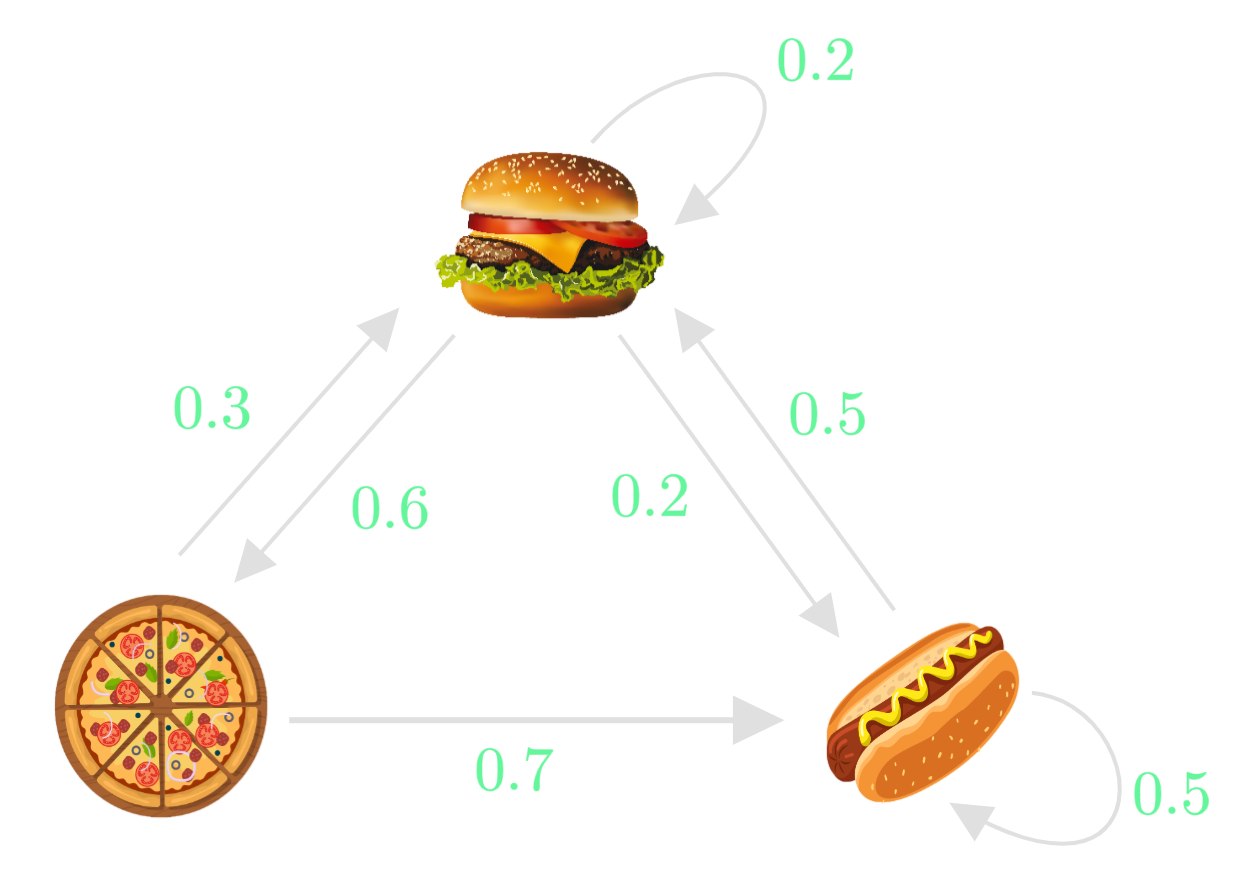

Let's notice that, for instance, from the burger state we can get to the pizza state with probability 0.6, the hot-dog state with probability 0.2 or we can stay in the same state with probability 0.2. The sum 0.6 + 0.2 + 0.2 = 1, because one of these events should definitely happen.

In [ ]:
state = {
    0 : "Burger",
    1 : "Pizza",
    2 : "Hotdog"
}
state

In [ ]:
A = np.array([[0.2, 0.6, 0.2], [0.3, 0.0, 0.7], [0.5, 0.0, 0.5]])
A

## Random Walk on Markov Chain

In mathematics, a **random walk**, sometimes known as a drunkard's walk, is a random process that describes a path that consists of a succession of random steps on some mathematical space.

An elementary example of a random walk is the random walk on the integer number line $\mathbb{Z}$ which starts at 0, and at each step moves +1 or -1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion below), the search path of a foraging animal, or the price of a fluctuating stock and the financial status of a gambler. Random walks have applications to engineering and many scientific fields including ecology, psychology, computer science, physics, chemistry, biology, economics, and sociology.

![](https://upload.wikimedia.org/wikipedia/commons/9/97/2d_random_walk_ag_adatom_ag111.gif)

In [ ]:
n = 15
start_state = 0
curr_state = start_state
print(state[curr_state], "--->", end = " ")

while n - 1:
    curr_state = np.random.choice([0, 1, 2], p = A[curr_state])
    print(state[curr_state], "--->", end = " ")
    n-=1
print("stop")

## Approach 1 : Monte Carlo

Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. One of the basic examples of getting started with the Monte Carlo algorithm is the estimation of the $\pi$ number.

Basic idea is to simulate random $(x, y)$ points in a 2D plane with domain as a square of side $2r$ units centered on (0, 0). Imagine a circle inside the same domain with the same radius $r$ and inscribed into the square. We then calculate the ratio of number points that lied inside the circle and total number of generated points.

![](https://media.geeksforgeeks.org/wp-content/uploads/MonteCarlo.png)

We know that the area of such a square is $4 r^2$ while that of circle is $\pi r^2$. The ratio of these two areas is $\frac{\pi r^2}{4 r^2} = \frac{\pi}{4}$.

Now for a very large number of generated points, $\pi = 4 * \frac{\text{no. of points generated inside the circle}}{\text{no. of points generated inside the square}}$.

In [ ]:
import random

INTERVAL = 1000

circle_points = 0
square_points = 0

for i in range(INTERVAL**2):

    # randomly generate x and y values from a uniform distribution
    # range of x and y values is from -1 to 1
    rand_x = random.uniform(-1, 1)
    rand_y = random.uniform(-1, 1)

    # distance between (x, y) from the origin
    origin_dist = rand_x**2 + rand_y**2

    # checking if (x, y) lies inside the circle
    if origin_dist <= 1:
        circle_points += 1

    square_points += 1

    # estimating the value of pi
    pi = 4 * circle_points / square_points

print("Final Estimation of Pi = ", pi)

Real $\pi = 3,141592653$.

Let's now get back to our "burger" task (further, $\pi$ means not the specific real number, but an array of probabilities):

In [ ]:
steps = 10**6
start_state = 0
curr_state = start_state
pi = np.array([0, 0, 0])
pi[start_state] = 1

loop = tqdm(total = steps, position = 0)
i = 0
while i < steps:
    curr_state = np.random.choice([0, 1, 2], p = A[curr_state])
    pi[curr_state] += 1
    i +=1
    loop.update()

print("π = ", pi/steps)

## Approach 2 : Repeated Matrix Multiplication

The probabilities after $k$ steps are determined using matrix multiplication  as follows: $P^k = (p_{i j}^{(k)})$, where $P$ is the initial transition matrix.

In [ ]:
steps = 10**3
A_n = A

loop = tqdm(total = steps, position = 0)
i = 0
while i < steps:
    A_n = np.matmul(A_n, A)
    i += 1
    loop.update()

print("A^n = \n", A_n, "\n")
print("π = ", A_n[0])

## Approach 3 : Finding Left Eigen Vectors

The left eigenvector is represented in the form of a row vector which satisfies the following condition: $XA = \lambda X$, where $A$ is a matrix of order $n$, $\lambda$ is one of its eigenvalues, $X = (x_1, \ldots, x_n)$. Note that $(XA)^T = A^T X^T = \lambda X^T$, which means that the left eigenvectors of A are the right eigenvectors of $A^T$.

A **stationary distribution** $\pi$ is a (row) vector, whose entries are non-negative and sum to 1, is unchanged by the operation of transition matrix $P$ on it and so is defined by $\pi P = \pi$. By comparing this definition with that of an eigenvector we see that the two concepts are related and that $\pi = \frac{e}{\sum_i e_i}$ is a normalized $(\sum_i \pi_i = 1)$ multiple of a left eigenvector $\bf{e}$ of the transition matrix $P$ with an eigenvalue of 1.

In [ ]:
import scipy.linalg
values, left = scipy.linalg.eig(A, right = False, left = True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)

In [ ]:
pi = left[:, 0] # column is the eigenvector
pi_normalized = [(x / np.sum(pi)).real for x in pi]
pi_normalized

What is the probability $P(\text{Pizza} \rightarrow \text{Hotdog} \rightarrow \text{Hotdog} \rightarrow \text{Burger})$?

To determine that we need to calculate (probability of each event depends only on the state attained in the previous event) $$P(X_0 = \text{Pizza}, X_1 = \text{Hotdog}, X_2 = \text{Hotdog}, X_3 = \text{Burger}) = P(X_0 = \text{Pizza}) P(X_1 = \text{Hotdog} | X_0 = \text{Pizza}) \\ P(X_2 = \text{Hotdog} | X_1 = \text{Hotdog}) P(X_3 = \text{Burger} | X_2 = \text{Hotdog}).$$

In [ ]:
def find_prob(seq, A, pi):
    start_state = seq[0]
    prob = pi[start_state]
    prev_state, curr_state = start_state, start_state
    for i in range(1, len(seq)):
        curr_state = seq[i]
        prob *= A[prev_state][curr_state]
        prev_state = curr_state
    return prob

print(find_prob([1, 2, 2, 0], A, pi_normalized))

If you have information about the states that a Markov Chain was in, you can use this information to estimate the transition matrix and the stationary distribution. Here's an example of how to do it in Python:

In [ ]:
# define the states and the number of states
states = ["A", "B", "C"]
n_states = len(states)

# define the observed sequence of states
observed_states = ["A", "B", "C", "A", "A", "B", "B", "C", "C", "C"]

# initialize the transition matrix and the count matrix
transition_matrix = np.zeros((n_states, n_states))
count_matrix = np.zeros((n_states, n_states))

# populate the count matrix
for i in range(len(observed_states) - 1):
    current_state = states.index(observed_states[i])
    next_state = states.index(observed_states[i + 1])
    count_matrix[current_state, next_state] += 1

# normalize the count matrix to obtain the transition matrix
for i in range(n_states):
    row_sum = np.sum(count_matrix[i, :])
    if row_sum > 0:
        transition_matrix[i, :] = count_matrix[i, :] / row_sum

# calculate the stationary distribution
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
index = np.argmax(eigenvalues)
stationary_distribution = np.real(eigenvectors[:, index])
stationary_distribution /= stationary_distribution.sum()

print("Transition matrix:\n{}".format(transition_matrix))
print("Stationary distribution: {}".format(stationary_distribution))

# The convergence of a Markov chain to a stationary distribution

Here's an example of simulating a Markov chain and computing its stationary distribution using Python.

In [ ]:
import numpy as np

# define the transition matrix
P = np.array([[0.8, 0.2, 0.0],
              [0.4, 0.4, 0.2],
              [0.1, 0.4, 0.5]])

# set the initial state distribution
pi_0 = np.array([1, 0, 0])

# simulate the Markov chain
n_iterations = 10000
current_state = np.random.choice([0, 1, 2], p = pi_0)  # randomly choose the initial state
state_counts = np.zeros(3)
for i in tqdm(range(n_iterations)):
    # update the state according to the transition probabilities
    new_state = np.random.choice([0, 1, 2], p = P[current_state])
    state_counts[new_state] += 1
    current_state = new_state

# compute the empirical distribution
empirical = state_counts / n_iterations
print("Empirical distribution: {}".format(empirical))

# find the stationary distribution
eigvals, eigvecs = np.linalg.eig(P.T)
stat_dist = eigvecs[:, np.isclose(eigvals, 1)]
stat_dist /= stat_dist.sum()
print("Stationary distribution: {}".format(stat_dist.T))

In this example, we define a transition matrix $P$ with three states, and simulate the Markov chain for 10 000 steps starting from the initial state $[1, 0, 0]$. We then compute the eigenvalues and eigenvectors of the transpose of $P$, and find the eigenvector corresponding to the eigenvalue of 1, which represents the stationary distribution. Finally, we compare the simulated distribution after 10 000 steps to the stationary distribution.

Note that the convergence of a Markov chain to its stationary distribution is not guaranteed, and the number of steps required for convergence depends on the properties of the chain. However, in many cases, long simulation runs are used to approximate the stationary distribution, since the Markov chain will often converge to the stationary distribution in the limit of infinite steps.

We remember that if $X(t)$ is a continuous-time Markov chain with transition matrix $P(t)$ and state space $S = \{ 0, 1, 2, \ldots \}$, then a probability distribution $\pi = (\pi_0, \pi_1, \pi_2, \ldots)$ on $S$, where $\pi_i \in [0, 1]$ and $\sum_{i \in S} \pi_i = 1$, is said to be a stationary distribution for $X(t)$ if $\pi = \pi P(t)$, for any $t \geqslant 0$.

# Task: text generation with Markov chains

We can use the discussed concept to words of a given text.

Each unique word represents a single state. A sentence is just a sequence of states that have been sampled from a state space.

What we need to do is just:



*   Create a state space;
*   Compute probabilities for the transition matrix;
*   Sample from the state space with the transition matrix.

The first points will be done by the TAs, while the last two points you need to finish!

In [32]:
import nltk
from nltk import word_tokenize
import numpy as np
import random
from typing import List, Dict, Tuple

In [33]:
from typing import Union
from pathlib import Path
def get_tokens(file_name: Union[Path, str]) -> List[str]:
    with open(file_name, 'r') as f:
        return word_tokenize(f.read())

In [34]:
tokens = get_tokens('positive')
len(tokens)

68689

<font color='red'>TODO:</font> write a function which calculates the transition matrix of probabilities. You can simply fill the todo parts or write your own function from scratch.

In [35]:
def calculate_transition_matrix(tokens: List[str]) -> np.ndarray:

    unique_tokens = list(set(tokens))
    total_froms = {}

    transition_matrix = np.zeros((len(unique_tokens), len(unique_tokens)))

    #start_todo: go through all the unique tokens you have and calculate their probabilities
    token_to_index = {token: i for i, token in enumerate(unique_tokens)}
    # Count transitions
    for i in range(len(tokens) - 1):
        current_token = tokens[i]
        next_token = tokens[i + 1]
        transition_matrix[token_to_index[current_token]][token_to_index[next_token]] += 1

        if current_token in total_froms:
            total_froms[current_token] += 1
        else:
            total_froms[current_token] = 1

    # Convert counts to probabilities

    for i, token in enumerate(unique_tokens):
        total = total_froms[token] if token in total_froms else 0
        if total > 0:
            transition_matrix[i] /= total
    return transition_matrix

In [42]:
def generate_text(current_token: str, 
				  tokens: List[str], 
				  length: int, 
				  P_matrix: np.ndarray, 
				  P_init: np.ndarray=None) -> str:
	text = []
	if current_token not in tokens:
		text.append(current_token)

	if P_init is not None:
		current_token = np.random.choice(tokens, p=P_init)
	else:
		current_token = np.random.choice(tokens)

	text.append(current_token)
	for _ in range(length - 1):
		index_current_token = tokens.index(current_token)
		transition_probs = P_matrix[index_current_token]
		current_token = np.random.choice(tokens, 
								p=transition_probs # use the transition probabilities to select the next token
								)
		text.append(current_token)

	return " ".join(text)

In [43]:
mtrx = calculate_transition_matrix(tokens)
assert mtrx.shape == (9367, 9367)

In [44]:
input_token = 'Students'
generate_text(input_token, list(set(tokens)), 100, mtrx)

"Students reunited with you soon as well with the most : ) Here 's great to pay more info , the campaign : ) ur dream . Thank you ! # TGIF unless you 're open pls : ) Gals also , it ! : ) some sunlight : - ) hi laura . : ) Interview with you and a song . Have fun low ranked games , I THINK THIS IS FROM THEIR WEEKLY TASK : ) always welcome . I play my email me get there untapped : ) relevant : ) I love u back : -"